# (22.08.2020) My-Version Only: Lambda Functions / Application Functions removed

In [1]:
import sys
import warnings
import os 
import traceback
if not sys.warnoptions:
    warnings.filterwarnings("once")  

In [2]:
#packages for the PECDS side of things
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
import scipy as sp
from scipy import stats, integrate, optimize
import math
from see import see
from itertools import groupby,islice
from tabulate import tabulate 
import copy
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = 50

In [3]:
#packages for VAR / VECM
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron, ZivotAndrews
from arch.unitroot.cointegration import engle_granger, phillips_ouliaris
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.iolib.summary2 import summary_col   #proably won't work as for panel reg
#https://stackoverflow.com/questions/54881902/generate-statistical-tables-in-python-and-export-to-excel

#from pystout import pystout
#!{sys.executable} -m pip install stargazer
#from stargazer.stargazer import Stargazer   #table/regression output package 

C:\Users\JasonSpano\anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [4]:
from statsmodels.tools.sm_exceptions import ValueWarning
from arch.utility.exceptions import (
    InfeasibleTestException,
    InvalidLengthWarning,
    invalid_length_doc)
warnings.filterwarnings("once", category = ValueWarning)
#warnings.simplefilter(action='ignore', category=FutureWarning)   

In [6]:
#02.10.2020

#pickle: + FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios
#total_alldata_df_final

#total_alldata_df_final.to_pickle("./total_alldata_df_final.pkl")
#total_alldata_df_final = pd.read_pickle("./total_alldata_df_final.pkl")


#############   - - - - - - - - - - - - -    ########
#05.10.2020

#pickle: + FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios - DATE SORTED BY GVKEY
#sorted_alldata_df_final
#sorted_alldata_df_final.to_pickle("./sorted_alldata_df_final.pkl")



#sorted_alldata_df_final = pd.read_pickle("./sorted_alldata_df_final.pkl")
sorted_alldata_df_final = pd.read_pickle(r"C:\Users\JasonSpano\OneDrive\Uva Msc 19-20 Subjects\Research Assistant Docs\CDS_project_-_first_set_of_tasks\Part 2_jan20./sorted_alldata_df_final.pkl")

In [ ]:
#02.10.2020
#now trying to loop/groupby sort for each group of total_alldata_df_final as the dates are not chronological at times
#see cell below + link to promising example

#06.10.2020
#interpolation has failed in the groupby format, although perhaps not necessary 

#next steps: proceed with the stationary testing for equities (decide on .pct_change() vs in-levels for closing prices)
#decide whether to add some form of liquidity measure from daily top/lows + volume (combined with firm ratios data) 
#to explain the results better

#then perform cointegration test
#perform VECM loops
#Re-run the HAS/GG measures and report?

#depending on the robustness, run a MS-VECM with either: just PECDS/CDS (probable) or + VIX or + eq returns
#re-run the HAS/GG measures and report

#conclusion + run extra regressions (see eco guide for finance or guidolin) to see traits of firms in each regime

#graphs / Impulse function response / VAR representation? 
#convert new tables to latex / insert into thesis doc
#present
#add code to github (add intermediate steps of data cleaning/preparation etc.) with PDF summary

#finish

In [ ]:
#should I export and delete sections E.G. the RFR/VIX section to presentation doc to free space etc. ?

In [ ]:
#22.09
#complete the full DF merger for equities/share prices with main DF (which has vix)
#then run the MS-VECM

#eventually affix the ratios to test conclusions
#applying to daily time series might not make sense in the end but can always reaggregate later?

In [42]:
#ALL OLD PICKLES + explanations 

#01.09.2020 frame of all data(daily) + sectors (remapped) attached
#fulldata_daily_df = pd.read_pickle("./fulldata_daily_df.pkl")

#08.09.20 + fulldata_daily_df + VIX/TED 
#fulldata_daily_vix_df = pd.read_pickle("./fulldata_daily_vix_df.pkl")



#for me: load pickles: #20.08.20
#sectors_gvkey_df_grouped_short = pd.read_pickle("./sectors_gvkey_df_grouped_short.pkl") #has fixed sector names

#24 GVKEYS with joint CDS + Bond spread both stationary
#joint_cdsbond_stat_df = pd.read_pickle("./joint_cdsbond_stat_df.pkl") 

#239 GVKEYS with joint CDS + Bond spread both NON-stationary
#joint_nonstat_df = pd.read_pickle("./joint_nonstat_df.pkl")

#22.08.20
#df_coint_rels = pd.read_pickle("./df_coint_rels.pkl") #91 GVKEYS with significant coint_rels (no data - table format)
#df_coint_rels_fulldata = pd.read_pickle("./df_coint_rels_fulldata.pkl") #91 GVKEYS with significant coint_rels (full data)

#df_no_coint_rel = pd.read_pickle("./df_no_coint_rel.pkl") #148 GVKEYS with (NO) significant coint_rels
#df_no_coint_fulldata = pd.read_pickle("./df_no_coint_fulldata.pkl") #139 GVKEYS with no coint_rels (full data less nan keys)

#df_coint_rank = pd.read_pickle("./df_coint_rank.pkl") #base_frame with all OBS for coint_test (johansen)
#df_coint_rank_table = pd.read_pickle("./df_coint_rank_table.pkl") #presentable frame (ALL OBS) coint_test (missing bic)

#df_basis_coupons_month = pd.read_pickle("./df_basis_coupons_month.pkl")  #full DF (less obs <120 filter) - DAILY
#df_basis_coupons_resamp_wk = pd.read_pickle("./df_basis_coupons_resamp_wk.pkl")  #weekly-resample of above (wed-wed)(ful D)
#df_basis_coupons_resamp_ms = pd.read_pickle("./df_basis_coupons_resamp_ms.pkl")  #monthly resample

#vecm_result_table_sector = pd.read_pickle("./vecm_result_table_sector.pkl")  #VECM (91 rows) Results + Sector Info
#granger_coint_check_df = pd.read_pickle("./granger_coint_check_df.pkl")  #90 rows (coint_confirmed) GCT + sector
#granger_causality_nonstat_weekly_sector = pd.read_pickle("./granger_causality_nonstat_weekly_sector.pkl") #(358 stat_diffed_wk)

#df_basis_counter_df = pd.read_pickle("./df_basis_counter_df.pkl")     #the summary statistics of pos/neg basis gvkey

#basis_lambda_stats_df = pd.read_pickle("./basis_lambda_stats_df.pkl") #GVKEY/BASIS(Mean/Median)/solvedlam(m/m)/name/sector
#better than the one below!
#gvkey_sector_cds_df = pd.read_pickle("./gvkey_sector_cds_df.pkl")     #GVKEY/BASIS(Mean/Median)/ Company Name/ Sector

#df_basis_coupons_month = pd.read_pickle("./df_basis_coupons_month.pkl")  #full DF (less obs <120 filter) - DAILY
#sectors_gvkey_df_grouped_short = pd.read_pickle("./sectors_gvkey_df_grouped_short.pkl") #has fixed sector names

In [ ]:
#to do: 

#2608
cross-check and compare for consistencies / discrepancies (see guidolin PG 15 for good explanations) GC test

create a (graph?) median sector values for GG / HAS over (time?) + merge on the time data after expanding on full data,
then recondense by year? (full data as left merge)

#<a id='VECM_model'></a>

#print (see) on statsmodel table 
#try exporting DF of cointegrating relationships breakdown? 
    #re-run var on stat-only DF (mix up results handling ++ try the summary_cols_2 thingy)

In [ ]:
#FLAG FOR DELETION PICKLES


### 20.08.20 + 


* [as of 26.08.20: VECM + PD MEASURES HERE!](#VECM_PDM)
* to refined/new VECM / PD measures [HERE](#refined_vecm_results_output)

* to the [bond_cds_spread_individual_ADF_stat_tests](#BOND_CDS_SPREAD_STATIONARY_ADF_TESTS)
* to [structural break unit root tesT: Zivot_Andrews](#zivot_andrews)
* to the [VAR model, GRANGER CAUSALITY TESTING LOOP + RESULTS DF](#VAR_LOOP_GRANGER_CAUSALITY_TEST)




* to [new concat gvkey with confirmed cointegrating relationships](#new_concat_gvkey)
* to the multiple(3) GVKEY frame [here](#multiple_GVKEY_experiment)
* [johansen cointegration testing loop](#johansen_cointegration_testing_loop)
* to [hasbrouck_ggmeasure section](#hasbrouck_ggmeasure)
* [to the stationarity/cointegration VECM section](#cointegration_test)





### Regarding how to store regression outputs from VAR, provided that module/package lacks the usual statsmodels methods for handling regression outputs
* storing/displaying regression outputs, the [VAR model setup found here](#VAR_MODEL_SETUP)
    * As the VAR package doesn't have the usual statsmodels methods for pulling / organising data, I had to manually create a way to store these regression outputs [here](#manual_var_regression_extraction)

    * running idea is to perhaps export to .dta and pull from stata using outreg? However, seems like there could be a better method potentially? 
* Strangely enough, the VECM module/package has this functionality, so it's solely for the VAR model. 







## Risk Free Interest Rates
* I believe this section is fairly established and thus I have removed it to reduce clutter


In [ ]:
#3-Month London Interbank Offered Rate (LIBOR)
USD3MTD156N

#Overnight London Interbank Offered Rate (LIBOR), based on U.S. Dollar
USDONTD156N

#LIBOR/OIS == difference between 3m LIBOR & 3M OIS: all time high in Oct 2008 of 364 Basis Points; below 100BP in Mid-Jan 09

#Effective Federal Funds Rate 
EFFR

#3-Month Treasury Constant Maturity Minus Federal Funds Rate 
T3MFF

In [6]:
#https://fred.stlouisfed.org/series/TEDRATE
from fredapi import Fred
fred = Fred(api_key='56e2cc23702c09f0c02226f2780c4de4')
from datetime import date, timedelta

In [7]:
start = date(2006, 7, 3); end = date(2017, 6, 30)
cboe_vix = fred.get_series('VIXCLS', '2006-07-03','2017-06-30')

#TEDRATE
ted_rate = fred.get_series('TEDRATE', '2006-07-03','2017-06-30')

#TB3SMFFM
#tbill_3m_fedfunds = fred.get_series('TB3SMFFM', '2006-07-03','2017-06-30')

int_spreads_concat = pd.concat([cboe_vix, ted_rate],axis=1)

interest_spreads_df = pd.DataFrame(int_spreads_concat.values, 
                                   index=cboe_vix.index,
                                  columns=['cboe_vix','ted_rate'])

#interest_spreads_df.columns=['cboe_vix','ted_rate']       
interest_spreads_df.tail()

C:\Users\JasonSpano\anaconda3\lib\site-packages\fredapi\fred.py:135: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  for child in root.getchildren():


,cboe_vix,ted_rate
2017-06-26,9.90,0.31
2017-06-27,11.06,0.31
2017-06-28,10.03,0.30
2017-06-29,11.44,0.28
2017-06-30,11.18,0.29


In [9]:
interest_spreads_df[['cboe_vix','ted_rate']] = interest_spreads_df[['cboe_vix','ted_rate']].interpolate(method='linear',limit_direction='forward')

In [10]:
interest_spreads_df.isna().sum()

cboe_vix    0
ted_rate    0
dtype: int64

In [11]:
interest_spreads_df = interest_spreads_df.reset_index()

In [15]:
interest_spreads_df = interest_spreads_df.rename(columns={'index':'trade_date'})

In [16]:
interest_spreads_df

,trade_date,cboe_vix,ted_rate
0,2006-07-03,13.05,0.520
1,2006-07-04,13.60,0.565
2,2006-07-05,14.15,0.610
3,2006-07-06,13.65,0.640
4,2006-07-07,13.97,0.620
...,...,...,...
2865,2017-06-26,9.90,0.310
2866,2017-06-27,11.06,0.310
2867,2017-06-28,10.03,0.300
2868,2017-06-29,11.44,0.280


In [19]:
interest_spreads_df.dtypes

trade_date    datetime64[ns]
cboe_vix             float64
ted_rate             float64
dtype: object

In [17]:
fulldata_daily_vix_df = fulldata_daily_df.merge(interest_spreads_df, how='left', on='trade_date')

In [18]:
fulldata_daily_vix_df

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.80,1.32
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.80,1.32
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.80,1.32
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care,20.80,1.32
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods,20.80,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460267,WU.GI,2009-05-29,106.816,490968.0,True,6.500,2.0,F,20140226.0,NaN,1.0,4.747531,175263.0,0.86,1.35,1.94,2.45,2.85,62.40,WUFS.S5,7.786632,0.085496,2009,29.780661,32.619339,2009-05-01,Consumer Cyclical,28.92,0.52
460268,WYN.GE,2009-05-29,96.250,496064.0,True,9.875,2.0,F,20140501.0,NaN,1.0,4.922757,174729.0,0.86,1.35,1.94,2.45,2.85,774.52,WYNI.S5,22.626140,0.009678,2009,2.168303,772.351697,2009-05-01,Consumer Cyclical,28.92,0.52
460269,X.GD,2009-05-29,87.716,398350.0,True,5.650,2.0,F,20130601.0,NaN,1.0,4.008296,23978.0,0.86,1.35,1.94,2.45,2.85,576.63,X....S5,-29.931449,0.094287,2009,34.999985,541.630015,2009-05-01,Materials,28.92,0.52
460270,XRX.HJ,2009-05-29,100.375,166728.0,True,7.625,2.0,F,20130615.0,NaN,1.0,4.046627,11636.0,0.86,1.35,1.94,2.45,2.85,274.56,XRX5$AX,14.013822,0.043916,2009,11.775700,262.784300,2009-05-01,Technology,28.92,0.52


In [64]:
#pickle: main coupon_basis DF resampled by month 

#fulldata_daily_vix_df.to_pickle("./fulldata_daily_vix_df.pkl")
#fulldata_daily_vix_df = pd.read_pickle("./fulldata_daily_vix_df.pkl")

In [ ]:
# DIVIDEND MASTER-FILE

In [ ]:
sorted_alldata_df_final = pd.read_pickle(r"C:\Users\JasonSpano\OneDrive\Uva Msc 19-20 Subjects\Research Assistant Docs\CDS_project_-_first_set_of_tasks\Part 2_jan20./sorted_alldata_df_final.pkl")

In [8]:

dividend_masterfile = (r"C:\Users\JasonSpano\OneDrive\Uva Msc 19-20 Subjects\Research Assistant Docs\CDS_project_-_first_set_of_tasks\Part 2_jan20./gvkey_dividends_masterfile.csv")
dividend_masterfile_df = pd.read_csv(dividend_masterfile)

C:\Users\JasonSpano\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#trfd = total return factor
#spcsrc = s&p quality factor 

In [10]:
dividend_masterfile_df.head()

,gvkey,iid,datadate,tic,conm,div,divd,divdpaydateind,divsp,dvrated,paydateind,anncdate,divdpaydate,divsppaydate,paydate,recorddate,dvi,trfd,ggroup,gind,gsector,gsubind,sic,spcindcd,spcseccd,spcsrc
0,105365,1,20020102,AMT,AMERICAN TOWER CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6010,601010,60,60101080,6798,463.0,974.0,A-
1,105365,1,20020103,AMT,AMERICAN TOWER CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6010,601010,60,60101080,6798,463.0,974.0,A-
2,105365,1,20020104,AMT,AMERICAN TOWER CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6010,601010,60,60101080,6798,463.0,974.0,A-
3,105365,1,20020107,AMT,AMERICAN TOWER CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6010,601010,60,60101080,6798,463.0,974.0,A-
4,105365,1,20020108,AMT,AMERICAN TOWER CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6010,601010,60,60101080,6798,463.0,974.0,A-


In [ ]:
#convert the float64 column to datetime
dividends_dtime = pd.to_datetime(dividend_masterfile_df['datadate'], format='%Y%m%d', errors='coerce')

In [ ]:
#re-affix the new datetime datatype as the date in the original DF
dividend_masterfile_df['datadate'] = dividends_dtime

In [ ]:
dividend_file_df = dividend_masterfile_df[['gvkey','datadate','div','divd','divsp','dvrated','trfd','spcsrc']]

In [ ]:
dividend_file_df = dividend_file_df.rename(columns={"datadate": "trade_date","spcsrc":"s&p_rating"})

In [ ]:
#check equity segement for code example 

# CONCATENATE: VIX/TED/FIRM-RATIOS to fulldata_daily_df

In [6]:
firm_level_ratios = 'firm_level_ratios_gvkey.csv'
firm_level_ratio_df = pd.read_csv(firm_level_ratios)

In [ ]:
#bm = book/market
#pe_inc = P/E (Diluted, Incl. EI)
#ps = price/sales
#p/cf = Price/Cash flow	
#npm = net profit margin
#roe = return on equity 
#Gprof = Gross profit / Total Assets
#Capital_ratio = Capitalization ratio
#fcf_ocf = Free Cash Flow/Operating Cash Flow
#de_ratio = Total Debt/Equity
#curr_ratio = current ratio 
#rd_sale = Research and Development/Sales
#ptb = price to book
#divyield = dividend yield 

In [7]:
firm_level_ratio_df.isna().sum()

gvkey                0
adate                7
qdate                0
public_date          0
bm                1546
pe_inc             730
ps                  28
pcf                 40
npm                 28
roe               1528
GProf                7
capital_ratio       52
fcf_ocf           1651
de_ratio            54
curr_ratio        5178
rd_sale              7
ptb               1546
divyield         10781
dtype: int64

In [8]:
#convert the float64 column to datetime
firm_level_ratios_dtime = pd.to_datetime(firm_level_ratio_df['public_date'], format='%Y%m%d', errors='coerce')

In [9]:
#re-affix the new datetime datatype as the date in the original DF
firm_level_ratio_df['public_date'] = firm_level_ratios_dtime

In [10]:
firm_level_ratio_df_mini = firm_level_ratio_df[['gvkey','public_date','ps','pcf','GProf','capital_ratio','de_ratio','rd_sale']]

In [11]:
firm_level_ratio_df_mini = firm_level_ratio_df_mini.rename(columns={"public_date": "trade_date"})

In [12]:
firm_level_ratio_df_mini

,gvkey,trade_date,ps,pcf,GProf,capital_ratio,de_ratio,rd_sale
0,1045,2006-07-31,0.220,3.477,0.135,1.083,-29.906,0.0
1,1045,2006-08-31,0.200,2.800,0.144,1.082,-30.998,0.0
2,1045,2006-09-30,0.224,3.138,0.144,1.082,-30.998,0.0
3,1045,2006-10-31,0.277,3.868,0.144,1.082,-30.998,0.0
4,1045,2006-11-30,0.307,3.982,0.149,1.078,-32.891,0.0
...,...,...,...,...,...,...,...,...
44112,183366,2017-02-28,0.460,4.169,0.123,0.270,0.984,0.0
44113,183366,2017-03-31,0.484,4.383,0.123,0.270,0.984,0.0
44114,183366,2017-04-30,0.440,3.988,0.123,0.270,0.984,0.0
44115,183366,2017-05-31,0.454,3.451,0.124,0.272,0.985,0.0


In [ ]:
#converting monthly to daily: long process

In [43]:
firm_level_ratio_df_mini['gvkey'] = firm_level_ratio_df_mini['gvkey'].astype(np.int)

In [56]:
firm_level_ratio_df_mini = firm_level_ratio_df_mini.reset_index()

In [59]:
firm_level_ratio_df_mini = firm_level_ratio_df_mini.drop(['index'], axis=1)

In [ ]:
#resample monthly to daily: 

#pickle below!

In [20]:
firm_level_ratio_df_mini['trade_date_month'] = firm_level_ratio_df_mini['trade_date']

In [21]:
firm_level_ratio_df_mini['trade_date_month'] = pd.to_datetime(firm_level_ratio_df_mini['trade_date_month'], format='%Y-%m')


In [22]:
df_firm_ratios_mini = firm_level_ratio_df_mini.pivot(index='trade_date_month', columns='gvkey',
                                                     values=['ps','pcf','GProf','capital_ratio','de_ratio','rd_sale'])

In [23]:
df_firm_ratios_mini

ps                                                   \
gvkey            1045   1078   1161   1209   1300   1356   1380   1408     
trade_date_month                                                           
2006-07-31        0.220  3.301  1.582  1.757  1.114  0.981  0.595  1.523   
2006-08-31        0.200  3.364  2.055  1.721  1.082  0.890  0.481  1.437   
2006-09-30        0.224  3.355  2.043  1.724  1.143  0.873  0.435  1.487   
2006-10-31        0.277  3.282  1.749  1.809  1.173  0.900  0.445  1.523   
2006-11-30        0.307  3.211  2.071  1.721  1.156  0.930  0.505  1.529   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
2017-02-28        0.582  3.736  3.186  4.065  2.411    NaN  3.419    NaN   
2017-03-31        0.522  3.680  3.208  3.915  2.417    NaN  3.204    NaN   
2017-04-30        0.523  3.616  2.933  4.068  2.544    NaN  3.246    NaN   
2017-05-31        0.588  3.553  2.290  4.061  2.582    NaN  2.891    NaN   
2017-06-30        0.605  3.782  2.559  4.033  2.587    NaN  2.764    NaN   

                                                                          \
gvkey            1440   1447   1468   1602   1704   1773   1794   1913     
trade_date_month                                                           
2006-07-31        1.171  2.427  0.645  6.368  3.243  0.297  0.553  1.177   
2006-08-31        1.171  2.407  0.702  6.012  3.477  0.277  0.569  1.244   
2006-09-30        1.168  2.569  0.662  6.297  2.936  0.272  0.575  1.208   
2006-10-31        1.330  2.624  0.731  6.685  2.893  0.296  0.532  1.268   
2006-11-30        1.310  2.603  0.728  6.047  2.998  0.298  0.599  1.340   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
2017-02-28        2.010  2.133    NaN  5.655  3.613  0.269  2.932  1.186   
2017-03-31        2.015  2.105    NaN  5.253  3.546  0.275  3.009  1.176   
2017-04-30        2.036  2.094    NaN  5.224  3.684  0.264  3.001  1.214   
2017-05-31        2.170  1.861    NaN  4.979  4.162  0.279  1.356  1.209   
2017-06-30        2.100  2.037    NaN  5.489  3.430  0.289  1.343  1.268   

                                                                          \
gvkey            1919   1920   1976   1988   2019   2085   2136   2150     
trade_date_month                                                           
2006-07-31        0.198  1.569  3.458  0.692  3.313  1.065  1.350  0.935   
2006-08-31        0.201  1.536  2.912  0.691  3.148  1.106  1.326  0.911   
2006-09-30        0.202  1.640  2.791  0.693  3.289  1.145  1.400  0.884   
2006-10-31        0.244  1.616  2.755  0.713  3.206  1.223  1.405  0.980   
2006-11-30        0.249  1.699  2.750  0.705  3.135  1.109  1.222  1.020   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
2017-02-28        0.361  0.337  2.605  1.419  3.120    NaN  1.606    NaN   
2017-03-31        0.359  0.338  2.586  1.435  3.121    NaN  1.578    NaN   
2017-04-30        0.303  0.373  2.567  1.486  3.122    NaN  1.487    NaN   
2017-05-31        0.273  0.260  2.488  1.469  3.094    NaN  1.539    NaN   
2017-06-30        0.289  0.291  2.459  1.516  3.350    NaN  1.474    NaN   

                         ... rd_sale                                     \
gvkey            2154    ...  137024 137232 140760 140977 142460 143073   
trade_date_month         ...                                              
2006-07-31        0.908  ...     0.0    0.0  0.099    0.0    0.0    0.0   
2006-08-31        0.941  ...     0.0    0.0  0.099    0.0    0.0    0.0   
2006-09-30        0.958  ...     0.0    0.0  0.099    0.0    0.0    0.0   
2006-10-31        0.980  ...     0.0    0.0  0.099    0.0    0.0    0.0   
2006-11-30        0.985  ...     0.0    0.0  0.099    0.0    0.0    0.0   
...                 ...  ...     ...    ...    ...    ...    ...    ...   
2017-02-28        1.144  ...     0.0    0.0  0.109    NaN    NaN    NaN   
2017-03-31        1.122  ...     0.0    0.0  0.109    NaN    NaN    NaN   
2

In [24]:
start_date = df_firm_ratios_mini.index.min() - pd.DateOffset(day=1)
end_date = df_firm_ratios_mini.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
pivot_df_firm_ratios_mini = df_firm_ratios_mini.reindex(dates, method='ffill')

In [25]:
pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.stack('gvkey')
#pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.sort_index()


In [26]:
pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.sort_index()

In [27]:
pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.reset_index()

In [28]:
pivot_df_firm_ratios_mini

,date,gvkey,ps,pcf,GProf,capital_ratio,de_ratio,rd_sale
0,2006-07-31,1045,0.220,3.477,0.135,1.083,-29.906,0.000
1,2006-07-31,1078,3.301,12.519,0.470,0.223,0.988,0.083
2,2006-07-31,1161,1.582,5.237,0.488,0.274,1.104,0.194
3,2006-07-31,1209,1.757,11.192,0.238,0.316,1.207,0.018
4,2006-07-31,1300,1.114,13.475,0.231,0.251,1.869,0.038
...,...,...,...,...,...,...,...,...
1333832,2017-06-30,175263,1.654,9.806,0.255,0.684,7.685,0.000
1333833,2017-06-30,176760,0.471,5.243,0.183,0.314,1.115,0.000
1333834,2017-06-30,179657,1.466,13.311,0.318,0.492,1.988,0.008
1333835,2017-06-30,179700,2.591,19.496,0.431,0.633,3.289,0.003


In [42]:
#pickle: 
#pivot_df_firm_ratios_mini

#pivot_df_firm_ratios_mini.to_pickle("./pivot_df_firm_ratios_mini.pkl")
pivot_df_firm_ratios_mini = pd.read_pickle("./pivot_df_firm_ratios_mini.pkl")

In [5]:
#merge the share prices on!

#to do: 

#change the names of the variables in the DF - done
#can solve the duplicates beforehand? - done or N/A
#drop some columns from the share DF (currency etc.?) - done


#use DF from 08.09? Vix - add the firm-level share factors after?  - done
#below is sample - need to add in full-DF?  - done

#add file sizes for publication? 

In [6]:
#import data files

daily_us_equity_prices = 'gvkey_daily_usa_equity_prices.csv'
daily_us_equity_prices_df = pd.read_csv(daily_us_equity_prices)

#mention size: E.G. 2GB

C:\Users\JasonSpano\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#DVRATED -- Indicated Annual Dividend Rate - Daily
#curcdd = CURCDD -- ISO Currency Code - Daily
#cshoc = CSHOC -- Shares Outstanding
#cshtrd = CSHTRD -- Trading Volume - Daily
#eps = EPS -- Current EPS
#prccd = PRCCD -- Price - Close - Daily
#prchd = PRCHD -- Price - High - Daily
#prcld = PRCLD -- Price - Low - Daily
#prcod = PRCOD -- Price - Open - Daily
#exchg = Stock Exchange Code	 #19 = other-OTC US, 12 = Amaerican, 14 = NASDAQ, 11 = NYSE
#secstat = Security Status Market	 I = inactive, A= active
#costat = COSTAT -- Active/Inactive Status Marker

# = GSUBIND -- GIC Sub-Industries
#Global Industry Classification Standard (GICS). The Sub-industry is represented by all 8 digits of the total GICS code.

#idbflag = IDBFLAG -- International, Domestic, Both Indicator (B = North-America & Int, D = domestic (NA), I = int)
#spicindcd = SPCINDCD -- S&P Industry Sector Code

In [17]:
us_equity_short_df = daily_us_equity_prices_df[['gvkey','datadate','tic','conm','cshtrd','prccd','prchd','prcld','prcod','eps']]

In [19]:
us_equity_short_df.head()

,gvkey,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,eps
0,1045,20060703,AAMRQ,AMERICAN AIRLINES GROUP INC,2633900.0,25.60,25.65,25.15,25.42,-4.7
1,1045,20060705,AAMRQ,AMERICAN AIRLINES GROUP INC,5388000.0,26.06,26.20,25.50,25.60,-4.7
2,1045,20060706,AAMRQ,AMERICAN AIRLINES GROUP INC,3701800.0,26.37,26.63,26.01,26.31,-4.7
3,1045,20060707,AAMRQ,AMERICAN AIRLINES GROUP INC,4643100.0,26.78,26.86,25.95,26.37,-4.7
4,1045,20060710,AAMRQ,AMERICAN AIRLINES GROUP INC,6387200.0,27.66,27.74,26.90,27.03,-4.7


In [20]:
#rename variables
us_equity_short_df = us_equity_short_df.rename(columns={'datadate':'trade_date',
                                                       'tic':'ticker',
                                                       'conm':'company_name',
                                                       'cshtrd':'trading_vol_daily',
                                                       'prccd':'price_close',
                                                       'prchd':'price_high',
                                                       'prcld':'price_low',
                                                       'prcod':'price_open'})

In [23]:
#change format of date column
shares_dtime = pd.to_datetime(us_equity_short_df['trade_date'], format='%Y%m%d', errors='coerce')
us_equity_short_df['trade_date'] = shares_dtime

In [26]:
us_equity_short_df.duplicated(subset=['gvkey','trade_date']).any()

True

In [27]:
len(us_equity_short_df)

1694458

In [28]:
us_equity_short_df_nodup = us_equity_short_df.duplicated(subset=['gvkey','trade_date'], keep='first')

In [29]:
len(us_equity_short_df_nodup)

1694458

In [39]:
#merge equity data with main DF of bonds/cds + VIX data
us_eq_vix_fulldf = fulldata_daily_vix_df.merge(us_equity_short_df, how='left', on=['gvkey','trade_date'])

#drop any duplicates if they arise
us_eq_vix_fulldf_nodup = us_eq_vix_fulldf.drop_duplicates(subset=['gvkey','trade_date'], keep='first')

In [12]:
fulldata_daily_vix_df.head(3)
#460272  rows

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.8,1.32
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.8,1.32
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.8,1.32


In [44]:
us_eq_vix_fulldf_nodup.head()
#also: 460272  rows

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.8,1.32,AA.3,ALCOA INC,8409500.0,38.20,38.50,37.60,37.92,2.54
2,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.8,1.32,AMGN,AMGEN INC,14095050.0,58.13,58.57,56.99,57.80,3.52
3,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.8,1.32,AVY,AVERY DENNISON CORP,1169700.0,57.95,59.39,56.91,58.90,3.64
4,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care,20.8,1.32,AZNCF,ASTRAZENECA PLC,648.0,49.00,49.00,49.00,49.00,NaN
6,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods,20.8,1.32,BA,BOEING CO,9715439.0,94.26,96.08,93.02,95.69,5.26


# merge [bonds/cds/equities/trading/vix] with the firm-level data/ratios

In [ ]:
#bm = book/market
#pe_inc = P/E (Diluted, Incl. EI)
#ps = price/sales
#p/cf = Price/Cash flow	
#npm = net profit margin
#roe = return on equity 
#Gprof = Gross profit / Total Assets
#Capital_ratio = Capitalization ratio
#fcf_ocf = Free Cash Flow/Operating Cash Flow
#de_ratio = Total Debt/Equity
#curr_ratio = current ratio 
#rd_sale = Research and Development/Sales
#ptb = price to book
#divyield = dividend yield 

In [50]:
#pickle: 
#pivot_df_firm_ratios_mini

#pivot_df_firm_ratios_mini.to_pickle("./pivot_df_firm_ratios_mini.pkl")
pivot_df_firm_ratios_mini = pd.read_pickle("./pivot_df_firm_ratios_mini.pkl")

In [58]:
pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.rename(columns={'date':'trade_date',
                                                                     'ps':'price_sales',
                                                                     'pcf':'price_cashflow',
                                                                     'GProf':'gross_profit_ta',
                                                                     'de_ratio':'debt_eq_ratio',
                                                                     'rd_sale':'rnd_sales'})

In [59]:
pivot_df_firm_ratios_mini.head(3)

,trade_date,gvkey,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
0,2006-07-31,1045,0.220,3.477,0.135,1.083,-29.906,0.000
1,2006-07-31,1078,3.301,12.519,0.470,0.223,0.988,0.083
2,2006-07-31,1161,1.582,5.237,0.488,0.274,1.104,0.194


In [60]:
#merger

total_alldata_df = us_eq_vix_fulldf_nodup.merge(pivot_df_firm_ratios_mini, how='left', on=['gvkey','trade_date'])
print(len(total_alldata_df))

#drop duplicates
#total_alldata_df = total_alldata_df.drop_duplicates(subset=['gvkey','trade_date'], keep='first')
#print(len(total_alldata_df))

460272


In [67]:
total_alldata_df.head()

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.8,1.32,AA.3,ALCOA INC,8409500.0,38.20,38.50,37.60,37.92,2.54,1.100,8.740,0.187,0.271,1.341,0.007
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.8,1.32,AMGN,AMGEN INC,14095050.0,58.13,58.57,56.99,57.80,3.52,4.138,12.062,0.407,0.310,0.810,0.250
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.8,1.32,AVY,AVERY DENNISON CORP,1169700.0,57.95,59.39,56.91,58.90,3.64,1.057,11.935,0.362,0.228,1.732,0.016
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care,20.8,1.32,AZNCF,ASTRAZENECA PLC,648.0,49.00,49.00,49.00,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods,20.8,1.32,BA,BOEING CO,9715439.0,94.26,96.08,93.02,95.69,5.26,1.272,11.175,0.262,0.547,7.030,0.058


In [63]:
#make copy if different format of GVKEY is somehow needed later to match earlier regression formats
total_alldata_df_final = total_alldata_df.copy()

#remove the floating point from the GVKEY
total_alldata_df_final['gvkey'] = total_alldata_df_final['gvkey'].astype(np.int)

In [66]:
total_alldata_df_final.dtypes

bond_sym_id                   object
trade_date            datetime64[ns]
price                        float64
issue_id                     float64
bond_in_mergent                 bool
coupon                       float64
interest_frequency           float64
coupon_type                   object
maturity_date                float64
secured                      float64
seniority                    float64
years_to_maturity            float64
gvkey                          int32
riskfree_rate_1yr            float64
riskfree_rate_2yr            float64
riskfree_rate_3yr            float64
riskfree_rate_4yr            float64
riskfree_rate_5yr            float64
market_cds_spread            float64
series_id                     object
initial_price                float64
solved_lambda                float64
year_index                     int64
pecds                        float64
cds_bond_basis               float64
year_month            datetime64[ns]
sector                        object
c

In [68]:
total_alldata_df_final.head()

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.8,1.32,AA.3,ALCOA INC,8409500.0,38.20,38.50,37.60,37.92,2.54,1.100,8.740,0.187,0.271,1.341,0.007
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.8,1.32,AMGN,AMGEN INC,14095050.0,58.13,58.57,56.99,57.80,3.52,4.138,12.062,0.407,0.310,0.810,0.250
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.8,1.32,AVY,AVERY DENNISON CORP,1169700.0,57.95,59.39,56.91,58.90,3.64,1.057,11.935,0.362,0.228,1.732,0.016
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care,20.8,1.32,AZNCF,ASTRAZENECA PLC,648.0,49.00,49.00,49.00,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods,20.8,1.32,BA,BOEING CO,9715439.0,94.26,96.08,93.02,95.69,5.26,1.272,11.175,0.262,0.547,7.030,0.058


# FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios [PICKLE]

In [69]:
#pickle: + FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios
#total_alldata_df_final

#total_alldata_df_final.to_pickle("./total_alldata_df_final.pkl")
total_alldata_df_final = pd.read_pickle("./total_alldata_df_final.pkl")

In [71]:
total_alldata_df_final.isna().sum()

bond_sym_id                0
trade_date                 0
price                      0
issue_id                   0
bond_in_mergent            0
coupon                     0
interest_frequency         0
coupon_type                0
maturity_date              0
secured               202437
seniority                  0
years_to_maturity          0
gvkey                      0
riskfree_rate_1yr          0
riskfree_rate_2yr          0
riskfree_rate_3yr          0
riskfree_rate_4yr          0
riskfree_rate_5yr          0
market_cds_spread          0
series_id                  0
initial_price              0
solved_lambda              0
year_index                 0
pecds                      0
cds_bond_basis             0
year_month                 0
sector                  2025
cboe_vix                   0
ted_rate                   0
ticker                 18636
company_name           18636
trading_vol_daily      18645
price_close            18644
price_high             18644
price_low     

In [ ]:
#need to interpolate these values? 

# Inspect NaN Values before interpolation 

In [72]:
inds_df = pd.isnull(total_alldata_df_final).any(1).nonzero()[0]

AttributeError: 'Series' object has no attribute 'nonzero'

In [ ]:
#good examples on finding locations of nans etc.

#https://stackoverflow.com/questions/14016247/find-integer-index-of-rows-with-nan-in-pandas-dataframe

#E.g. for index.values.to_list()
#df_index.index(i) for i in index etc....


In [74]:
index = total_alldata_df_final['price_sales'].index[total_alldata_df_final['price_sales'].apply(np.isnan)]

In [75]:
index

Int64Index([     3,     14,     26,     51,     62,     74,     99,    110,
               122,    147,
            ...
            460182, 460187, 460192, 460194, 460195, 460222, 460224, 460257,
            460262, 460266],
           dtype='int64', length=47135)

In [76]:
total_alldata_df_final

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials,20.80,1.32,AA.3,ALCOA INC,8409500.0,38.20,38.50,37.60,37.92,2.54,1.100,8.740,0.187,0.271,1.341,0.007
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care,20.80,1.32,AMGN,AMGEN INC,14095050.0,58.13,58.57,56.99,57.80,3.52,4.138,12.062,0.407,0.310,0.810,0.250
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods,20.80,1.32,AVY,AVERY DENNISON CORP,1169700.0,57.95,59.39,56.91,58.90,3.64,1.057,11.935,0.362,0.228,1.732,0.016
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care,20.80,1.32,AZNCF,ASTRAZENECA PLC,648.0,49.00,49.00,49.00,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods,20.80,1.32,BA,BOEING CO,9715439.0,94.26,96.08,93.02,95.69,5.26,1.272,11.175,0.262,0.547,7.030,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460267,WU.GI,2009-05-29,106.816,490968.0,True,6.500,2.0,F,20140226.0,NaN,1.0,4.747531,175263,0.86,1.35,1.94,2.45,2.85,62.40,WUFS.S5,7.786632,0.085496,2009,29.780661,32.619339,2009-05-01,Consumer Cyclical,28.92,0.52,WU,WESTERN UNION CO,7480112.0,17.63,17.63,16.78,17.00,1.30,2.224,9.367,0.429,1.003,-689.680,0.000
460268,WYN.GE,2009-05-29,96.250,496064.0,True,9.875,2.0,F,20140501.0,NaN,1.0,4.922757,174729,0.86,1.35,1.94,2.45,2.85,774.52,WYNI.S5,22.626140,0.009678,2009,2.168303,772.351697,2009-05-01,Consumer Cyclical,28.92,0.52,WYND,WYNDHAM DESTINATIONS INC,3696539.0,11.79,11.79,11.24,11.35,-6.04,0.486,19.082,0.235,0.587,3.088,0.000
460269,X.GD,2009-05-29,87.716,398350.0,True,5.650,2.0,F,20130601.0,NaN,1.0,4.008296,23978,0.86,1.35,1.94,2.45,2.85,576.63,X....S5,-29.931449,0.094287,2009,34.999985,541.630015,2009-05-01,Materials,28.92,0.52,X,UNITED STATES STEEL CORP,16210600.0,34.08,34.08,33.11,33.22,12.26,0.156,2.238,0.259,0.385,2.253,0.000
460270,XRX.HJ,2009-05-29,100.375,166728.0,True,7.625,2.0,F,20130615.0,NaN,1.0,4.046627,11636,0.86,1.35,1.94,2.45,2.85,274.56,XRX5$AX,14.013822,0.043916,2009,11.775700,262.784300,2009-05-01,Technology,28.92,0.52,XRX,XEROX HOLDINGS CORP,6267214.0,6.80,6.88,6.65,6.79,0.58,0.300,5.627,0.348,0.543,2.579,0.043


In [77]:
gvkey_28272 = total_alldata_df_final.loc[total_alldata_df_final.gvkey==28272]

In [80]:
print(gvkey_28272[['trade_date','eps']].to_string())

       trade_date   eps
3      2007-10-24   NaN
51     2007-10-25   NaN
99     2007-10-26   NaN
147    2007-10-29  2.81
195    2007-10-30  2.81
243    2007-10-31  2.81
291    2007-11-01   NaN
339    2007-11-02  2.81
388    2007-11-05   NaN
438    2007-11-06  2.81
488    2007-11-07  2.81
538    2007-11-08   NaN
588    2007-11-09  2.81
638    2007-11-12   NaN
688    2007-11-13   NaN
738    2007-11-14   NaN
788    2007-11-15  2.81
838    2007-11-16  2.81
890    2007-11-19   NaN
942    2007-11-20  2.81
994    2007-11-21  2.81
1046   2007-11-22   NaN
1098   2007-11-23  2.81
1150   2007-11-26  2.81
1202   2007-11-27  2.81
1254   2007-11-28   NaN
1307   2007-11-29  2.81
1360   2007-11-30   NaN
1412   2007-12-03  2.81
1466   2007-12-04  2.81
1520   2007-12-05  2.81
1574   2007-12-06  2.81
1628   2007-12-07   NaN
1682   2007-12-10  2.81
1736   2007-12-11  2.81
1790   2007-12-12  2.81
1844   2007-12-13  2.81
1901   2007-12-14   NaN
2005   2007-12-17  2.81
2110   2007-12-18  2.81
2215   2007-12-1

In [ ]:
#interpolation example 

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [81]:
gvkey_28272 = gvkey_28272.interpolate(method='linear',limit_direction='forward',axis=0)

In [82]:
#OLD (pre-sorted by date)
print(gvkey_28272[['trade_date','eps']].to_string())

       trade_date       eps
3      2007-10-24       NaN
51     2007-10-25       NaN
99     2007-10-26       NaN
147    2007-10-29  2.810000
195    2007-10-30  2.810000
243    2007-10-31  2.810000
291    2007-11-01  2.810000
339    2007-11-02  2.810000
388    2007-11-05  2.810000
438    2007-11-06  2.810000
488    2007-11-07  2.810000
538    2007-11-08  2.810000
588    2007-11-09  2.810000
638    2007-11-12  2.810000
688    2007-11-13  2.810000
738    2007-11-14  2.810000
788    2007-11-15  2.810000
838    2007-11-16  2.810000
890    2007-11-19  2.810000
942    2007-11-20  2.810000
994    2007-11-21  2.810000
1046   2007-11-22  2.810000
1098   2007-11-23  2.810000
1150   2007-11-26  2.810000
1202   2007-11-27  2.810000
1254   2007-11-28  2.810000
1307   2007-11-29  2.810000
1360   2007-11-30  2.810000
1412   2007-12-03  2.810000
1466   2007-12-04  2.810000
1520   2007-12-05  2.810000
1574   2007-12-06  2.810000
1628   2007-12-07  2.810000
1682   2007-12-10  2.810000
1736   2007-12-11  2

In [23]:
#NEW (whole DF date sorted)
print(gvkey_28272[['trade_date','eps']].to_string())

       trade_date   eps
369273 2007-09-06  2.81
369274 2007-09-07   NaN
369275 2007-09-10  2.81
369276 2007-09-11  2.81
369277 2007-09-12   NaN
369278 2007-09-13  2.81
369279 2007-09-14   NaN
369280 2007-09-17   NaN
369281 2007-09-18  2.81
369282 2007-09-19  2.81
369283 2007-09-20  2.81
369284 2007-09-21   NaN
369285 2007-09-24  2.81
369286 2007-09-25  2.81
369287 2007-09-26   NaN
369288 2007-09-27  2.81
369289 2007-09-28  2.81
369290 2007-10-01  2.81
369291 2007-10-02   NaN
369292 2007-10-03  2.81
369293 2007-10-04  2.81
369294 2007-10-05  2.81
369295 2007-10-08  2.81
369296 2007-10-09  2.81
369297 2007-10-10   NaN
369298 2007-10-11  2.81
369299 2007-10-12  2.81
369300 2007-10-15  2.81
369301 2007-10-16   NaN
369302 2007-10-17  2.81
369303 2007-10-18  2.81
369304 2007-10-19  2.81
369305 2007-10-22   NaN
369306 2007-10-23  2.81
369307 2007-10-24   NaN
369308 2007-10-25   NaN
369309 2007-10-26   NaN
369310 2007-10-29  2.81
369311 2007-10-30  2.81
369312 2007-10-31  2.81
369313 2007-11-0

In [ ]:
#try to re-sort by date

pivot_df_firm_ratios_mini = df_firm_ratios_mini.reindex(dates, method='ffill')
pivot_df_firm_ratios_mini = pivot_df_firm_ratios_mini.sort_index()

In [89]:
gvkey_28272_resorted = gvkey_28272.copy()

In [93]:
gvkey_28272_resorted = gvkey_28272_resorted.reset_index()

In [95]:
gvkey_28272_resorted = gvkey_28272_resorted.set_index('trade_date')

In [97]:
gvkey_28272_resorted = gvkey_28272_resorted.sort_index()

In [98]:
gvkey_28272_resorted

,index,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
trade_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-09-06,451434,AZN.GF,99.791,414217.0,True,5.4,2.0,F,20120915.0,NaN,1.0,5.026797,28272,5.050000,4.810000,4.80,4.840000,4.890000,29.80,AZN..S5,4.337913,0.049630,2007,18.845359,10.954641,2007-09-01,Health Care,23.990,1.54,AZN,ASTRAZENECA PLC,638600.0,48.88000,49.28000,48.51000,48.77000,2.81,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-07,451478,AZN.GF,100.441,414217.0,True,5.4,2.0,F,20120915.0,NaN,1.0,5.024059,28272,4.900000,4.650000,4.63,4.670000,4.730000,30.20,AZN..S5,4.350638,0.050351,2007,19.126020,11.073980,2007-09-01,Health Care,26.230,1.76,AZNCF,ASTRAZENECA PLC,250.0,48.00000,48.00000,48.00000,48.00000,2.81,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-10,451522,AZN.GF,100.608,414217.0,True,5.4,2.0,F,20120915.0,NaN,1.0,5.015846,28272,4.870000,4.590000,4.58,4.610000,4.670000,30.80,AZN..S5,4.354944,0.050633,2007,19.235973,11.564027,2007-09-01,Health Care,27.380,1.84,AZN,ASTRAZENECA PLC,491300.0,47.65000,48.19000,47.47000,48.12000,2.81,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-11,451566,AZN.GF,100.652,414217.0,True,5.4,2.0,F,20120915.0,NaN,1.0,5.013108,28272,4.930000,4.670000,4.63,4.660000,4.710000,29.80,AZN..S5,4.350742,0.050478,2007,19.175488,10.624512,2007-09-01,Health Care,25.270,1.70,AZN,ASTRAZENECA PLC,815500.0,48.62000,48.69000,47.95000,47.99000,2.81,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-12,451610,AZN.GF,100.215,414217.0,True,5.4,2.0,F,20120915.0,NaN,1.0,5.010370,28272,5.000000,4.720000,4.70,4.720000,4.780000,31.40,AZN..S5,4.346052,0.050141,2007,19.044074,12.355926,2007-09-01,Health Care,24.960,1.77,AZNCF,ASTRAZENECA PLC,100.0,48.90000,48.90000,48.90000,48.90000,2.81,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-26,99687,AZN.GC,111.571,188414.0,True,5.4,2.0,F,20140601.0,NaN,1.0,4.016510,28272,0.920000,1.270000,1.68,2.070000,2.400000,51.06,AZN..S5,-18.809850,0.103056,2010,40.205084,10.854916,2010-05-01,Health Care,35.020,0.37,AZN,ASTRAZENECA PLC,3761382.0,40.91000,41.24000,40.71000,40.73000,5.19,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-27,99866,AZN.GC,111.571,188414.0,True,5.4,2.0,F,20140601.0,NaN,1.0,4.013772,28272,0.900000,1.310000,1.74,2.150000,2.510000,49.88,AZN..S5,-18.782770,0.102465,2010,39.962552,9.917448,2010-05-01,Health Care,29.680,0.37,AZN,ASTRAZENECA PLC,1899190.0,41.85000,41.86000,41.17000,41.24000,5.19,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-28,100045,AZN.GC,111.382,188414.0,True,5.4,2.0,F,20140601.0,NaN,1.0,4.011034,28272,0.840000,1.240000,1.66,2.080000,2.450000,48.26,AZN..S5,-18.799783,0.102693,2010,40.055952,8.204048,2010-05-01,Health Care,32.070,0.38,AZNCF,ASTRAZENECA PLC,602.0,41.80000,41.80000,41.80000,41.80000,5.19,NaN,NaN,NaN,NaN,NaN,NaN


# LOOP / GROUPBY - reindex DF & sort to fix date chronology

In [ ]:
#search == groupby sort index python

#https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups

In [ ]:
#from:

#total_alldata_df_final = pd.read_pickle("./total_alldata_df_final.pkl")

In [8]:
unsorted_alldata_df = total_alldata_df_final.copy()

In [ ]:
#gvkey_28272_resorted = gvkey_28272_resorted.reset_index()
#gvkey_28272_resorted = gvkey_28272_resorted.set_index('trade_date')
#gvkey_28272_resorted = gvkey_28272_resorted.sort_index()

In [10]:
unsorted_alldata_df = unsorted_alldata_df.set_index(['gvkey','trade_date']).sort_index()

In [10]:
unsorted_alldata_df.groupby('gvkey').size()

gvkey
1045       546
1078       620
1161      1885
1209      1471
1300      2374
          ... 
175263     265
176404    2092
176760    1760
179657     523
179700    1498
Length: 391, dtype: int64

In [16]:
#print(unsorted_alldata_df.iloc[:, unsorted_alldata_df.columns.get_level_values(0)=='gvkey'])

In [24]:
#unsorted_alldata_df.index

In [19]:
#create copy to test reset index
unsorted_alldata_df_slice = unsorted_alldata_df.copy()

unsorted_alldata_df_slice = unsorted_alldata_df_slice.reset_index()

In [28]:
#rename 
sorted_alldata_df_final = unsorted_alldata_df_slice.copy()

In [30]:
#05.10.2020

#pickle: + FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios - DATE SORTED BY GVKEY
#sorted_alldata_df_final
#sorted_alldata_df_final.to_pickle("./sorted_alldata_df_final.pkl")

sorted_alldata_df_final = pd.read_pickle("./sorted_alldata_df_final.pkl")

# interpolation

* https://stackoverflow.com/questions/37057187/pandas-interpolate-within-a-groupby

* https://www.w3resource.com/pandas/dataframe/dataframe-interpolate.php

In [40]:
sorted_alldata_df_final.isna().sum()

gvkey                      0
trade_date                 0
bond_sym_id                0
price                      0
issue_id                   0
bond_in_mergent            0
coupon                     0
interest_frequency         0
coupon_type                0
maturity_date              0
secured               202437
seniority                  0
years_to_maturity          0
riskfree_rate_1yr          0
riskfree_rate_2yr          0
riskfree_rate_3yr          0
riskfree_rate_4yr          0
riskfree_rate_5yr          0
market_cds_spread          0
series_id                  0
initial_price              0
solved_lambda              0
year_index                 0
pecds                      0
cds_bond_basis             0
year_month                 0
sector                  2025
cboe_vix                   0
ted_rate                   0
ticker                 18636
company_name           18636
trading_vol_daily      18645
price_close            18644
price_high             18644
price_low     

In [ ]:
gvkey_28272 = gvkey_28272.interpolate(method='linear',limit_direction='forward', limit=20, axis=0)

In [45]:
#interpolate the price  to sales ratio per GVKEY group 
sorted_alldata_df_final = sorted_alldata_df_final.groupby(['gvkey','price_sales']).apply(lambda g: g.interpolate(method='linear',
                                                                                       limit_direction='forward', 
                                                                                       axis=0))

In [ ]:
#hasn't seemed to work

In [46]:
sorted_alldata_df_final.isna().sum()

gvkey                  47135
trade_date             47135
bond_sym_id            47135
price                  47135
issue_id               47135
bond_in_mergent        47135
coupon                 47135
interest_frequency     47135
coupon_type            47135
maturity_date          47135
secured               225955
seniority              47135
years_to_maturity      47135
riskfree_rate_1yr      47135
riskfree_rate_2yr      47135
riskfree_rate_3yr      47135
riskfree_rate_4yr      47135
riskfree_rate_5yr      47135
market_cds_spread      47135
series_id              47135
initial_price          47135
solved_lambda          47135
year_index             47135
pecds                  47135
cds_bond_basis         47135
year_month             47135
sector                 47625
cboe_vix               47135
ted_rate               47135
ticker                 61635
company_name           61635
trading_vol_daily      48096
price_close            48096
price_high             48096
price_low     

In [6]:
gvkey_1408 = sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==1408]

In [ ]:
#JOHANSENS TEST
#1408 / 1300 / 1209

In [52]:
gvkey_1209.head()

,gvkey,trade_date,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
3051,1209,2011-07-28,APD.HB,99.655,558793.0,True,2.0,2.0,F,20160802.0,0.0,1.0,5.015846,0.45,0.63,0.94,1.35,1.76,61.12,APD5$AX,7.525489,0.149552,2011,161.314086,-100.194086,2011-07-01,Materials,23.74,0.18,APD,AIR PRODUCTS & CHEMICALS INC,946343.0,89.06,90.68,88.98,89.94,5.45,2.178,12.608,0.25,0.39,1.371,0.013
3052,1209,2011-07-29,APD.HB,100.340,558793.0,True,2.0,2.0,F,20160802.0,0.0,1.0,5.013108,0.44,0.60,0.88,1.26,1.67,61.17,APD5$AX,7.542349,0.149951,2011,161.776804,-100.606804,2011-07-01,Materials,25.25,0.16,APD,AIR PRODUCTS & CHEMICALS INC,1754119.0,88.73,89.75,87.75,87.86,5.45,2.178,12.608,0.25,0.39,1.371,0.013
3053,1209,2011-08-01,APD.HB,100.560,558793.0,True,2.0,2.0,F,20160802.0,0.0,1.0,5.004894,0.43,0.57,0.82,1.17,1.55,61.14,APD5$AX,7.565746,0.150518,2011,162.435798,-101.295798,2011-08-01,Materials,23.66,0.16,APD,AIR PRODUCTS & CHEMICALS INC,1353852.0,88.53,90.11,87.53,89.97,5.45,2.034,11.772,0.25,0.39,1.371,0.013
3054,1209,2011-08-02,APD.HB,100.764,558793.0,True,2.0,2.0,F,20160802.0,0.0,1.0,5.002156,0.46,0.59,0.83,1.17,1.54,63.18,APD5$AX,7.568224,0.150586,2011,162.515228,-99.335228,2011-08-01,Materials,24.79,0.20,APD,AIR PRODUCTS & CHEMICALS INC,2185673.0,85.23,88.00,85.21,87.68,5.45,2.034,11.772,0.25,0.39,1.371,0.013
3055,1209,2011-08-03,APD.HB,100.725,558793.0,True,2.0,2.0,F,20160802.0,0.0,1.0,4.999418,0.46,0.59,0.82,1.15,1.51,63.15,APD5$AX,-3.534777,0.196421,2011,231.425352,-168.275352,2011-08-01,Materials,23.38,0.25,APD,AIR PRODUCTS & CHEMICALS INC,1904027.0,86.38,86.48,84.32,85.25,5.45,2.034,11.772,0.25,0.39,1.371,0.013


In [59]:
gvkey_number = 1408
gvkey_frame = gvkey_1408

print("JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
data = pd.DataFrame(data=(cds, pecds)).T
#data = np.column_stack((cds, pecds))

model = vecm.select_order(data, maxlags=5)
optimal_lag_length = model.bic
    
vecm_cointeg_rank = vecm.select_coint_rank(data, det_order =1, k_ar_diff = optimal_lag_length, 
                                                  method='trace', signif=0.05)
        
print(vecm_cointeg_rank.summary())
print("Number of Cointegrating relationships:", vecm_cointeg_rank.rank)

JOHANSENS COINT TEST with individual GVKEY NUMBER: 1408
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          20.25          18.40
  1   2          5.089          3.841
-------------------------------------
Number of Cointegrating relationships: 2


In [ ]:
#VECM comparison

In [66]:
#Original VECM base: CDS/PECDS

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vecm_data_base = pd.DataFrame(data=(cds, pecds)).T

vecm_model_base = vecm.select_order(vecm_data_base, maxlags=5)
optimal_lag_length_base = vecm_model_base.bic
    
vecm_cointeg_rank_base = vecm.select_coint_rank(vecm_data_base, det_order =1, k_ar_diff = optimal_lag_length_base, 
                                                  method='trace', signif=0.05)

if vecm_cointeg_rank_base.rank >= 1:
    coint_rels_base = 1
else:
    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_base = vecm.VECM(vecm_data_base, k_ar_diff=vecm_model_base.bic, coint_rank=coint_rels_base, deterministic='cili')
vecm_base_res = vecm_base.fit()
print(vecm_base_res.summary())


VECM MODEL OF GVKEY: 1408
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.2702      0.026     10.288      0.000       0.219       0.322
L1.pecds                 0.0383      0.023      1.668      0.095      -0.007       0.083
L2.market_cds_spread    -0.0125      0.027     -0.458      0.647      -0.066       0.041
L2.pecds                 0.0079      0.023      0.342      0.733      -0.037       0.053
L3.market_cds_spread     0.0033      0.026      0.125      0.900      -0.048       0.055
L3.pecds                 0.0234      0.023      1.018      0.309      -0.022       0.068
  Det. terms outside the coint. relation & lagged endog. parameters for equation pecds  
                           coef    std err          z      P>|z|      [0.025

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [67]:
vecm_base_res.test_granger_causality(caused=0).summary()

Test statistic,Critical value,p-value,df
1.392,2.375,0.234,"(4, 2936)"


In [68]:
vecm_base_res.test_granger_causality(caused=1).summary()

Test statistic,Critical value,p-value,df
2.015,2.375,0.090,"(4, 2936)"


In [ ]:
#VECM with BONDS/CDS/VIX

gvkey_1408 = sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==1408]

In [69]:
gvkey_number = 1408
gvkey_frame = gvkey_1408

print("JOHANSENS COINT TEST on base + VIX, with individual GVKEY NUMBER: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vix = gvkey_frame['cboe_vix']
vecm_data_vix = pd.DataFrame(data=(cds, pecds, vix)).T

vecm_model_vix = vecm.select_order(vecm_data_vix, maxlags=5)
optimal_lag_length_vix = vecm_model_vix.bic

vecm_cointeg_rank_vix = vecm.select_coint_rank(vecm_data_vix, det_order =1, k_ar_diff = optimal_lag_length_vix, 
                                                  method='trace', signif=0.05)
        
print(vecm_cointeg_rank_vix.summary())
print("Number of Cointegrating relationships:", vecm_cointeg_rank_vix.rank)

JOHANSENS COINT TEST on base + VIX, with individual GVKEY NUMBER: 1408
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          48.50          35.01
  1   3          21.15          18.40
  2   3          5.677          3.841
-------------------------------------
Number of Cointegrating relationships: 3


In [70]:
#VECM of base + VIX: CDS/PECDS
#with hardcoded coint_rels = 1

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + VIX OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vix = gvkey_frame['cboe_vix']
vecm_data_vix = pd.DataFrame(data=(cds, pecds, vix)).T

vecm_model_vix = vecm.select_order(vecm_data_vix, maxlags=5)
optimal_lag_length_vix = vecm_model_vix.bic
    
vecm_cointeg_rank_vix = vecm.select_coint_rank(vecm_data_vix, det_order =1, k_ar_diff = optimal_lag_length_vix, 
                                                  method='trace', signif=0.05)

if vecm_cointeg_rank_vix.rank >= 1:
    coint_rels_vix = 1
else:
    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_vix = vecm.VECM(vecm_data_vix, k_ar_diff=vecm_model_vix.bic, coint_rank=coint_rels_vix, deterministic='cili')
vecm_vix_res = vecm_vix.fit()
print(vecm_vix_res.summary())

VECM MODEL + VIX OF GVKEY: 1408
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.2652      0.028      9.620      0.000       0.211       0.319
L1.pecds                 0.0336      0.023      1.447      0.148      -0.012       0.079
L1.cboe_vix             -0.0020      0.053     -0.037      0.971      -0.107       0.103
L2.market_cds_spread    -0.0291      0.028     -1.027      0.304      -0.085       0.026
L2.pecds                 0.0124      0.023      0.535      0.593      -0.033       0.058
L2.cboe_vix              0.0781      0.054      1.455      0.146      -0.027       0.183
L3.market_cds_spread     0.0134      0.027      0.493      0.622      -0.040       0.067
L3.pecds                 0.0163      0.023      0.701      0.483      

In [72]:
vecm_vix_res.test_granger_causality(caused=0).summary()

Test statistic,Critical value,p-value,df
2.736,1.941,0.005,"(8, 4389)"


In [74]:
vecm_vix_res.test_granger_causality(caused=1).summary()

Test statistic,Critical value,p-value,df
1.598,1.941,0.120,"(8, 4389)"


In [75]:
vecm_vix_res.test_granger_causality(caused=2).summary()

Test statistic,Critical value,p-value,df
1.459,1.941,0.167,"(8, 4389)"


In [77]:
#VECM of base + VIX: CDS/PECDS
#with automated coint rels calculation

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + VIX OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vix = gvkey_frame['cboe_vix']
vecm_data_vix = pd.DataFrame(data=(cds, pecds, vix)).T

vecm_model_vix = vecm.select_order(vecm_data_vix, maxlags=5)
optimal_lag_length_vix = vecm_model_vix.bic
    
vecm_cointeg_rank_vix = vecm.select_coint_rank(vecm_data_vix, det_order =1, k_ar_diff = optimal_lag_length_vix, 
                                                  method='trace', signif=0.05)

#if vecm_cointeg_rank_vix.rank >= 1:
#    coint_rels_vix = 1
#else:
#    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_vix_2 = vecm.VECM(vecm_data_vix, k_ar_diff=vecm_model_vix.bic, coint_rank=vecm_cointeg_rank_vix.rank, deterministic='cili')
vecm_vix_res_2 = vecm_vix_2.fit()
print(vecm_vix_res_2.summary())

VECM MODEL + VIX OF GVKEY: 1408
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.2668      0.028      9.699      0.000       0.213       0.321
L1.pecds                 0.0346      0.023      1.493      0.135      -0.011       0.080
L1.cboe_vix              0.0048      0.053      0.089      0.929      -0.100       0.109
L2.market_cds_spread    -0.0261      0.028     -0.923      0.356      -0.082       0.029
L2.pecds                 0.0134      0.023      0.579      0.562      -0.032       0.059
L2.cboe_vix              0.0826      0.054      1.544      0.123      -0.022       0.188
L3.market_cds_spread     0.0172      0.027      0.631      0.528      -0.036       0.071
L3.pecds                 0.0175      0.023      0.756      0.449      

In [78]:
vecm_vix_res_2.test_granger_causality(caused=0).summary()

Test statistic,Critical value,p-value,df
2.736,1.941,0.005,"(8, 4389)"


In [79]:
vecm_vix_res_2.test_granger_causality(caused=1).summary()

Test statistic,Critical value,p-value,df
1.598,1.941,0.120,"(8, 4389)"


In [81]:
vecm_vix_res_2.test_granger_causality(caused=2).summary()

Test statistic,Critical value,p-value,df
1.459,1.941,0.167,"(8, 4389)"


In [84]:
vecm_vix_res_2.test_granger_causality(causing='cboe_vix', caused='market_cds_spread').summary()

Test statistic,Critical value,p-value,df
4.317,2.374,0.002,"(4, 4389)"


In [85]:
vecm_vix_res_2.test_granger_causality(causing='cboe_vix', caused='pecds').summary()

Test statistic,Critical value,p-value,df
0.9348,2.374,0.443,"(4, 4389)"


In [ ]:
#try adding raw bond spread? 

In [86]:
#help(vecm_vix_res_2.test_granger_causality(caused=0))

In [13]:
#VECM with BONDS/CDS/EQUITIES

gvkey_1408 = sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==1408]
gvkey_frame = gvkey_1408

In [9]:
#put this into the .T minor DF otherwise cannot dropna() one cell in a row of data
#gvkey_frame['p_close_diff'] = gvkey_frame['price_close'].diff().dropna()

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#ADD .diff() to equity closing prices



In [26]:
gvkey_frame.head()

,gvkey,trade_date,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
10014,1408,2007-12-14,FO.GH,97.3670,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,5.965899,4.43,4.17,4.22,4.34,4.47,79.10,FO.5$AX,-21.506730,0.072439,2007,32.816821,46.283179,2007-12-01,Consumer Staples,23.27,2.16,BEAM.2,BEAM INC,695820.0,74.81,76.15,74.81,75.43,5.37,1.452,13.364,0.254,0.498,1.863,0.009
10015,1408,2007-12-17,FO.GH,97.0292,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,5.957686,4.42,4.14,4.21,4.32,4.44,82.41,FO.5$AX,-21.515144,0.072597,2007,32.892240,49.517760,2007-12-01,Consumer Staples,24.52,1.93,BEAM.2,BEAM INC,961261.0,73.75,74.78,73.61,74.34,5.37,1.452,13.364,0.254,0.498,1.863,0.009
10016,1408,2007-12-18,FO.GH,93.0000,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,5.954948,4.32,4.04,4.10,4.21,4.34,82.41,FO.5$AX,-21.559635,0.073039,2007,33.103473,49.306527,2007-12-01,Consumer Staples,22.64,1.95,BEAM.2,BEAM INC,845336.0,73.96,74.25,73.07,74.14,5.37,1.452,13.364,0.254,0.498,1.863,0.009
10017,1408,2007-12-19,FO.GH,93.0000,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,5.952210,4.33,4.05,4.11,4.23,4.35,82.88,FO.5$AX,-21.553789,0.073002,2007,33.085642,49.794358,2007-12-01,Consumer Staples,21.68,2.06,BEAM.2,BEAM INC,541050.0,73.36,74.33,73.24,74.33,5.37,1.452,13.364,0.254,0.498,1.863,0.009
10018,1408,2007-12-20,FO.GH,93.0000,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,5.949472,4.21,3.89,3.94,4.06,4.17,85.25,FO.5$AX,-21.624776,0.073848,2007,33.489328,51.760672,2007-12-01,Consumer Staples,20.58,2.03,BEAM.2,BEAM INC,922316.0,73.60,73.76,73.00,73.75,5.37,1.452,13.364,0.254,0.498,1.863,0.009


In [22]:
#JOHANSENS COINTEGRATION TEST
#haven't check for unit root in equities or to use levels vs diff

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
eq = gvkey_frame['price_close'].pct_change().dropna()

#the [1:] is to cut the first data point so the series lengths match
vecm_data_eq = pd.DataFrame(data=(cds[1:], pecds[1:], eq)).T

vecm_model_eq = vecm.select_order(vecm_data_eq, maxlags=5)
optimal_lag_length_eq = vecm_model_eq.bic
    
vecm_cointeg_rank_eq = vecm.select_coint_rank(vecm_data_eq, det_order =1, k_ar_diff = optimal_lag_length_eq, 
                                                  method='trace', signif=0.05)

print(vecm_cointeg_rank_eq.summary())
print("Number of Cointegrating relationships (CDS/PECDS/EQUITIES):", vecm_cointeg_rank_eq.rank)

VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: 1408
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          324.0          35.01
  1   3          20.15          18.40
  2   3          5.116          3.841
-------------------------------------
Number of Cointegrating relationships (CDS/PECDS/EQUITIES): 3


In [25]:
#VECM of base + EQUITIES CLOSING PRICE.DIFF(): CDS/PECDS
#with automated coint rels calculation

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
eq = gvkey_frame['price_close'].pct_change().dropna()

#the [1:] is to cut the first data point so the series lengths match
vecm_data_eq = pd.DataFrame(data=(cds[1:], pecds[1:], eq)).T

vecm_model_eq = vecm.select_order(vecm_data_eq, maxlags=5)
optimal_lag_length_eq = vecm_model_eq.bic
    
vecm_cointeg_rank_eq = vecm.select_coint_rank(vecm_data_eq, det_order =1, k_ar_diff = optimal_lag_length_eq, 
                                                  method='trace', signif=0.05)

#if vecm_cointeg_rank_vix.rank >= 1:
#    coint_rels_vix = 1
#else:
#    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_eq_2 = vecm.VECM(vecm_data_eq, k_ar_diff=vecm_model_eq.bic, coint_rank=vecm_cointeg_rank_eq.rank, deterministic='cili')
vecm_eq_res_2 = vecm_eq_2.fit()
print(vecm_eq_res_2.summary())

VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: 1408
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.2640      0.027      9.669      0.000       0.210       0.317
L1.pecds                 0.0355      0.023      1.550      0.121      -0.009       0.080
L1.price_close           7.6815      9.043      0.849      0.396     -10.042      25.405
L2.market_cds_spread    -0.0330      0.028     -1.175      0.240      -0.088       0.022
L2.pecds                 0.0109      0.023      0.476      0.634      -0.034       0.056
L2.price_close          -7.5070      7.365     -1.019      0.308     -21.943       6.929
L3.market_cds_spread     0.0155      0.027      0.568      0.570      -0.038       0.069
L3.pecds                 0.0219      0.023      0

In [28]:
vecm_eq_res_2.test_granger_causality(causing='price_close', caused='market_cds_spread').summary()

Test statistic,Critical value,p-value,df
3.189,2.374,0.013,"(4, 4386)"


In [29]:
vecm_eq_res_2.test_granger_causality(causing='price_close', caused='pecds').summary()

Test statistic,Critical value,p-value,df
0.7013,2.374,0.591,"(4, 4386)"


In [30]:
vecm_eq_res_2.test_granger_causality(caused=0).summary()

Test statistic,Critical value,p-value,df
2.308,1.941,0.018,"(8, 4386)"


In [31]:
vecm_eq_res_2.test_granger_causality(caused=1).summary()

Test statistic,Critical value,p-value,df
1.262,1.941,0.258,"(8, 4386)"


In [32]:
vecm_eq_res_2.test_granger_causality(caused=2).summary()

Test statistic,Critical value,p-value,df
1.108,1.941,0.354,"(8, 4386)"


In [33]:
#change CDS/PECDS/EQUITIES to CDS/bond spread/equities

#JOHANSENS COINTEGRATION TEST
#haven't check for unit root in equities or to use levels vs diff

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['price'] * (gvkey_frame['coupon'] / 100)
eq = gvkey_frame['price_close'].pct_change().dropna()

#the [1:] is to cut the first data point so the series lengths match
vecm_data_eq = pd.DataFrame(data=(cds[1:], pecds[1:], eq)).T

vecm_model_eq = vecm.select_order(vecm_data_eq, maxlags=5)
optimal_lag_length_eq = vecm_model_eq.bic
    
vecm_cointeg_rank_eq = vecm.select_coint_rank(vecm_data_eq, det_order =1, k_ar_diff = optimal_lag_length_eq, 
                                                  method='trace', signif=0.05)

print(vecm_cointeg_rank_eq.summary())
print("Number of Cointegrating relationships (CDS/PECDS/EQUITIES):", vecm_cointeg_rank_eq.rank)

VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: 1408
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          638.4          35.01
  1   3          20.03          18.40
  2   3          4.334          3.841
-------------------------------------
Number of Cointegrating relationships (CDS/PECDS/EQUITIES): 3


C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [34]:
#VECM of base + EQUITIES CLOSING PRICE.DIFF(): CDS/PECDS
#with automated coint rels calculation

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['price'] * (gvkey_frame['coupon'] / 100)
eq = gvkey_frame['price_close'].pct_change().dropna()

#the [1:] is to cut the first data point so the series lengths match
vecm_data_eq = pd.DataFrame(data=(cds[1:], pecds[1:], eq)).T

vecm_model_eq = vecm.select_order(vecm_data_eq, maxlags=5)
optimal_lag_length_eq = vecm_model_eq.bic
    
vecm_cointeg_rank_eq = vecm.select_coint_rank(vecm_data_eq, det_order =1, k_ar_diff = optimal_lag_length_eq, 
                                                  method='trace', signif=0.05)

#if vecm_cointeg_rank_vix.rank >= 1:
#    coint_rels_vix = 1
#else:
#    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_eq_2 = vecm.VECM(vecm_data_eq, k_ar_diff=vecm_model_eq.bic, coint_rank=vecm_cointeg_rank_eq.rank, deterministic='cili')
vecm_eq_res_2 = vecm_eq_2.fit()
print(vecm_eq_res_2.summary())

VECM MODEL + EQUITIES CLOSING PRICES, OF GVKEY: 1408
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.2488      0.026      9.431      0.000       0.197       0.301
L1.Unnamed 0            -0.7085      0.768     -0.923      0.356      -2.214       0.797
L1.price_close          13.4346      5.117      2.625      0.009       3.405      23.464
Det. terms outside the coint. relation & lagged endog. parameters for equation Unnamed 0
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
L1.market_cds_spread     0.0014      0.001      1.576      0.115      -0.000       0.003
L1.Unnamed 0            -0.1457      0.026     -5

In [36]:
vecm_eq_res_2.test_granger_causality(causing='price_close', caused=1).summary()

Test statistic,Critical value,p-value,df
2.604,2.998,0.074,"(2, 4410)"


In [37]:
vecm_eq_res_2.test_granger_causality(causing='price_close', caused=0).summary()

Test statistic,Critical value,p-value,df
4.686,2.998,0.009,"(2, 4410)"


In [38]:
vecm_eq_res_2.test_granger_causality(causing='price_close', caused=2).summary()

Test statistic,Critical value,p-value,df
0.7419,2.998,0.476,"(2, 4410)"


In [ ]:
cds_2 = np.array(gvkey_14477_nonstat_df['market_cds_spread'])
pecds_2 = np.array(gvkey_14477_nonstat_df['pecds'])
#vecm_data_2 = np.column_stack((cds_2, pecds_2))
vecm_data_2 = pd.DataFrame(data=(cds_2, pecds_2)).T
vecm_data_2.columns = ['cds','pecds']

vecm_model_order_2 = vecm.select_order(data=vecm_data_2[['cds','pecds']], maxlags=10)

vecm_rank_2 = vecm.select_coint_rank(vecm_data_2, det_order =1, k_ar_diff = vecm_model_order_2.bic, 
                                   method ='trace', signif=0.05)

vecm_regmodel_2 = vecm.VECM(vecm_data, k_ar_diff=vecm_model_order_2.bic, coint_rank=vecm_rank_2.rank, deterministic='cili')

vecm_res_2 = vecm_regmodel_2.fit()
print(vecm_res_2.summary())

vecm_res_2.test_granger_causality(caused=0).summary()
vecm_res_1.test_granger_causality(caused=1).summary()

#white test (residuals autocorrelations)
white_test = vecm_res_2.test_whiteness(nlags=10, adjusted=True)
white_test.summary()

# TIME RE-SAMPLE - FROM: (df_basis_coupons_month)

#### Current #OBS per each resample size

In [33]:
print("main_df:", len(df_basis_coupons_month))
print("monthly_df:", len(df_basis_coupons_resamp_ms))
print("weekly_df:", len(df_basis_coupons_resamp_wk))

main_df: 460272
monthly_df: 28297
weekly_df: 122442


## resample daily observations by month
* Keep first observation per subgroup 

In [ ]:
#resample original DF
df_basis_coupons_resamp_ms = df_basis_coupons_month.groupby('gvkey').resample('MS', on='trade_date').first()

trade_date_og = df_basis_coupons_resamp_ms['trade_date'] #FFD? 
df_basis_coupons_resamp_ms = df_basis_coupons_resamp_ms.drop(['trade_date'], axis=1)
df_basis_coupons_resamp_ms = df_basis_coupons_resamp_ms.drop(['gvkey'], axis=1)

#drop the new index set from the resample('ms') so you can call groupby operations on the GVKEY and/or tiem 
df_basis_coupons_resamp_ms = df_basis_coupons_resamp_ms.reset_index()

In [24]:
df_basis_coupons_resamp_ms.groupby('gvkey').size()

gvkey
1045.0       57
1078.0       31
1161.0      111
1209.0       72
1300.0      112
           ... 
175263.0     13
176404.0    100
176760.0    115
179657.0     25
179700.0     73
Length: 391, dtype: int64

In [6]:
#pickle: main coupon_basis DF resampled by month 

#df_basis_coupons_resamp_ms.to_pickle("./df_basis_coupons_resamp_ms.pkl")
df_basis_coupons_resamp_ms = pd.read_pickle("./df_basis_coupons_resamp_ms.pkl")

# WEEKLY RESAMPLE: 
* from: df_basis_coupons_month
* to: df_basis_coupons_resamp_wk

In [28]:
#resample original DF: daily to weekly
df_basis_coupons_resamp_wk = df_basis_coupons_month.groupby('gvkey').resample('W-WED', on='trade_date').first()

trade_date_og_2 = df_basis_coupons_resamp_wk['trade_date'] #FFD
df_basis_coupons_resamp_wk = df_basis_coupons_resamp_wk.drop(['trade_date'], axis=1)
df_basis_coupons_resamp_wk = df_basis_coupons_resamp_wk.drop(['gvkey'], axis=1)
df_basis_coupons_resamp_wk = df_basis_coupons_resamp_wk.reset_index()

In [30]:
df_basis_coupons_resamp_wk.groupby('gvkey').size()

gvkey
1045.0      245
1078.0      134
1161.0      482
1209.0      310
1300.0      481
           ... 
175263.0     54
176404.0    432
176760.0    501
179657.0    106
179700.0    316
Length: 391, dtype: int64

In [34]:
#pickle: 
#weekly resamped main basis coupons DF

#df_basis_coupons_resamp_wk.to_pickle("./df_basis_coupons_resamp_wk.pkl")
#df_basis_coupons_resamp_wk = pd.read_pickle("./df_basis_coupons_resamp_wk.pkl")

<a id='basic_descriptive_measures'></a>

## Basic descriptive measures
* Count number of coupon and zero-coupon bonds in the sample
* Count the breakdown of the trades per year across the time horizon of the sample
* Count the number of trades/observations per each GVKEY 


* Mainly to get an overview / general feel for the underlying characteristics of the data


In [57]:
df_basis_coupons_month = pd.read_pickle("./df_basis_coupons_month.pkl")  #full DF (less obs <120 filter) - DAILY

In [58]:
df_agg_sector_year = df_basis_coupons_month.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [59]:
df_agg_sector_year.head(5)

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods


In [ ]:
df_agg_sector_year[df_agg_sector_year['']]

In [30]:
plt.style.use('ggplot')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_agg_sector_year.groupby(['year_index','sector']).median()['cds_bond_basis'].unstack().plot(ax=ax);
plt.ylim(-50, 350)
plt.xlim(2007, 2017)
ax.set_xlabel('Year')
ax.set_ylabel('Median CDS-Bond Basis By Sector')

In [ ]:
#https://github.com/scentellegher/code_snippets/blob/master/pandas_groupby_unstack/Plot_groupby_multiple_columns_unstack.ipynb

In [61]:
df_agg_year_yax_sector_xax_median_basis = np.round(df_agg_sector_year.groupby(['year_index','sector']).median()['cds_bond_basis'].unstack(),2)

In [62]:
df_agg_year_yax_sector_xax_median_basis

sector,Capital Goods,Communication Services,Consumer Cyclical,Consumer Staples,Energy,Financials,Health Care,Materials,Technology,Transporation,Utilities
year_index,,,,,,,,,,,
2006,24.12,NaN,19.09,27.22,-12.87,9.07,NaN,18.91,7.92,5.63,66.93
2007,12.99,59.78,161.75,40.52,38.44,17.57,-14.76,18.40,1.86,10.43,19.16
2008,34.18,113.78,243.54,27.12,97.03,153.96,35.23,86.67,46.29,41.19,95.97
2009,27.83,83.51,214.68,33.39,89.59,271.97,64.66,152.45,63.31,76.76,96.36
2010,41.42,82.59,187.72,31.42,71.75,119.96,111.24,111.32,57.24,103.21,73.24
2011,46.77,162.26,218.57,41.14,122.78,143.04,84.57,99.07,37.41,110.64,71.24
2012,62.39,161.94,160.57,35.56,121.72,144.72,39.03,95.14,116.75,112.68,108.94
2013,21.92,159.63,88.22,24.22,81.28,79.34,-12.46,73.18,74.42,65.89,55.32
2014,20.37,60.57,105.77,23.43,58.97,64.77,5.44,70.35,27.77,7.43,41.30


## TABLE: Descriptive Statistics by Year

In [6]:
#create series grouped-by year for each subset
full_df_years = df_basis_coupons_month.groupby('year_index').size()

In [313]:
#create year index + the number of #OBS by year to be concatenated with the descriptive statistcs 
full_df_years_df = pd.DataFrame(full_df_years)
full_df_years_df = full_df_years_df.reset_index()
full_df_years_df.columns = ['year','obs_count']

#full_df_years_df['percent'] = np.round(((full_df_years_df['obs_count'] / 460272) * 100),2)

In [317]:
#run: mean, median, stddev on CDS-Bond Bais
basis_stats_yearind = np.round(df_basis_coupons_month.groupby('year_index').agg({'cds_bond_basis':['mean','median','std']}),2)
basis_stats_yearind = basis_stats_yearind.reset_index()

In [319]:
#concat frames and drop the multi-index
basis_stats_obspercent_yearind = pd.concat([full_df_years_df, basis_stats_yearind], axis=1)
basis_stats_obspercent_yearind = basis_stats_obspercent_yearind.drop([('year_index', '')], axis=1)

In [321]:
basis_stats_obspercent_yearind

,year,obs_count,percent,"(cds_bond_basis, mean)","(cds_bond_basis, median)","(cds_bond_basis, std)"
0,2006,1325,0.29,37.07,15.17,67.21
1,2007,10506,2.28,52.59,21.71,250.05
2,2008,36597,7.95,228.13,88.58,560.10
3,2009,47489,10.32,279.86,112.62,586.32
4,2010,48463,10.53,176.06,96.53,248.21
5,2011,46124,10.02,177.82,101.63,356.25
6,2012,49286,10.71,195.34,104.08,485.91
7,2013,50245,10.92,159.05,62.73,648.89
8,2014,48265,10.49,133.44,47.39,595.59
9,2015,48677,10.58,177.00,39.90,848.32


In [ ]:
#try: groupby.sem() (standard errors)
#.describe() for summary stats

#https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/

### Adding Weeks + or (-) to descriptive statistics table

In [48]:
df_basis_counts = df_basis_coupons_month
gvkey_sizes = df_basis_counts.groupby('gvkey').size()

In [41]:
gvkey_list = []
pos_list = []
neg_list = []

for i, val in enumerate(df_basis_coupons_month.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    basis = data.cds_bond_basis
    gvkey_list.append(gvkey)
    pos_counter = 0; neg_counter = 0
    
    for i in basis:
        if i >=0:
            pos_counter += 1
            continue
        else:
            neg_counter += 1
            continue

    pos_list.append(pos_counter)
    neg_list.append(neg_counter)
    
df_basis_counter_df = pd.DataFrame(data=(gvkey_list, pos_list, neg_list)).T
df_basis_counter_df.columns=['GVKEY','POS_COUNTS','NEG_COUNTS']

    

In [49]:
df_basis_counter_df['group_size'] = gvkey_sizes

In [52]:
gvkey_sizes_df = pd.DataFrame(gvkey_sizes)
gvkey_sizes_df = gvkey_sizes_df.reset_index()
gvkey_sizes_df.columns=['GVKEY','gvkey_sizes']

In [ ]:
#merge the two frames
df_basis_counter_df = df_basis_counter_df.merge(gvkey_sizes_df, how='left',on='GVKEY')

In [125]:
#construct final frame
df_basis_counter_df['positive_weeks'] = np.round(df_basis_counter_df['POS_COUNTS'] / 7, 2)
df_basis_counter_df['negative_weeks'] = np.round(df_basis_counter_df['NEG_COUNTS'] / 7, 2)
df_basis_counter_df['gvkey_weeks'] = np.round(df_basis_counter_df['gvkey_sizes'] / 7, 2)
#df_basis_counter_df['GVKEY'] = (str(i)[-2:] == '.0' and str(i)[:-2] or str(i) for i in df_basis_counter_df['GVKEY'])

#add GVKEY and convert from float to clean (int)
df_basis_counter_df['GVKEY'] = gvkey_sizes_df['GVKEY']
df_basis_counter_df['GVKEY_'] = df_basis_counter_df['GVKEY'].astype(np.int)
df_basis_counter_df['POS_COUNTS_2'] = df_basis_counter_df['POS_COUNTS'].astype(np.int)
df_basis_counter_df['NEG_COUNTS_2'] = df_basis_counter_df['NEG_COUNTS'].astype(np.int)

#re-transform the original series
df_basis_counter_df['GVKEY'] = df_basis_counter_df['GVKEY_']
df_basis_counter_df['POS_COUNTS'] = df_basis_counter_df['POS_COUNTS_2']
df_basis_counter_df['NEG_COUNTS'] = df_basis_counter_df['NEG_COUNTS_2']

df_basis_counter_df['percent_positive'] = np.round(df_basis_counter_df['positive_weeks'] / df_basis_counter_df['gvkey_weeks'] * 100, 2)

In [127]:
df_basis_counter_df = df_basis_counter_df.drop(['GVKEY_','POS_COUNTS_2','NEG_COUNTS_2'],axis=1)

In [128]:
df_basis_counter_df

,GVKEY,POS_COUNTS,NEG_COUNTS,gvkey_sizes,positive_weeks,negative_weeks,gvkey_weeks,percent_positive
0,1045,546,0,546,78.00,0.00,78.00,100.00
1,1078,307,313,620,43.86,44.71,88.57,49.52
2,1161,1885,0,1885,269.29,0.00,269.29,100.00
3,1209,261,1210,1471,37.29,172.86,210.14,17.75
4,1300,552,1822,2374,78.86,260.29,339.14,23.25
...,...,...,...,...,...,...,...,...
386,175263,265,0,265,37.86,0.00,37.86,100.00
387,176404,2072,20,2092,296.00,2.86,298.86,99.04
388,176760,1760,0,1760,251.43,0.00,251.43,100.00
389,179657,523,0,523,74.71,0.00,74.71,100.00


In [106]:
#pickle: 
#df_basis_counter_df.to_pickle("./df_basis_counter_df.pkl")
#df_basis_counter_df = pd.read_pickle("./df_basis_counter_df.pkl")

# Aggregate basis counters / stats into sectors

In [110]:
df_basis_counter_df = df_basis_counter_df.rename(columns={'GVKEY':'gvkey'})

In [300]:
#pickle: 
#df_basis_counter_df_sector.to_pickle("./df_basis_counter_df_sector.pkl")
df_basis_counter_df_sector = pd.read_pickle("./df_basis_counter_df_sector.pkl")

In [112]:
#merge with the DF containing GVKEY + sector keys 
df_basis_counter_df_sector = df_basis_counter_df.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [302]:
basis_counts_weeks = df_basis_counter_df_sector.groupby('sector').agg({'gvkey_sizes':['size'], 'POS_COUNTS': ['median'], 'NEG_COUNTS': ['median'], 
                                                 'positive_weeks':['mean'], 'negative_weeks':['mean'], 
                                                  'percent_positive':['mean']})

In [303]:
basis_counts_weeks

,gvkey_sizes,POS_COUNTS,NEG_COUNTS,positive_weeks,negative_weeks,percent_positive
,size,median,median,mean,mean,mean
sector,,,,,,
capital_goods,35,602.0,241.0,111.306286,52.428286,70.826286
communication_services,10,1275.0,0.0,203.801000,14.271000,95.635000
consumer_cyclical,70,700.5,0.0,130.095571,24.900143,86.079571
consumer_staples,46,1052.0,401.0,134.943261,71.319565,64.736522
energy,35,916.0,0.0,146.163143,27.783429,83.725143
financials,50,845.5,0.0,134.388400,9.828600,90.873400
health,1,422.0,68.0,60.290000,9.710000,86.130000
health_care,27,523.0,240.0,108.534074,56.471111,70.542593


In [304]:
basis_counts_weeks.take([0],axis=1).sum()

gvkey_sizes  size    389
dtype: int64

# Create a smaller, simplified version for presentation in paper

In [305]:
short_sector_basis_wk_counter = basis_counts_weeks.take([0, 5], axis=1)
short_sector_basis_wk_counter['percent_positive'] = np.round(short_sector_basis_wk_counter['percent_positive'], 2)

In [309]:
short_sector_basis_wk_counter

,gvkey_sizes,percent_positive
,size,mean
sector,,
capital_goods,35,70.83
communication_services,10,95.64
consumer_cyclical,70,86.08
consumer_staples,46,64.74
energy,35,83.73
financials,50,90.87
health,1,86.13
health_care,27,70.54


# Create the full-data frame with sector data attached for later regressions 

In [6]:
df_basis_coupons_month = pd.read_pickle("./df_basis_coupons_month.pkl")  #full DF (less obs <120 filter) - DAILY
sectors_gvkey_df_grouped_short = pd.read_pickle("./sectors_gvkey_df_grouped_short.pkl") #has fixed sector names

In [7]:
fulldata_daily_df = df_basis_coupons_month.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [8]:
fulldata_daily_df 

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector
0,AA.HN,2007-10-24,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,2007-10-01,Materials
1,AMGN.GN,2007-10-24,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,Health Care
2,AVY.IB,2007-10-24,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,2007-10-01,Capital Goods
3,AZN.GF,2007-10-24,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,2007-10-01,Health Care
4,BA.ZJ,2007-10-24,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,2007-10-01,Capital Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460267,WU.GI,2009-05-29,106.816,490968.0,True,6.500,2.0,F,20140226.0,NaN,1.0,4.747531,175263.0,0.86,1.35,1.94,2.45,2.85,62.40,WUFS.S5,7.786632,0.085496,2009,29.780661,32.619339,2009-05-01,Consumer Cyclical
460268,WYN.GE,2009-05-29,96.250,496064.0,True,9.875,2.0,F,20140501.0,NaN,1.0,4.922757,174729.0,0.86,1.35,1.94,2.45,2.85,774.52,WYNI.S5,22.626140,0.009678,2009,2.168303,772.351697,2009-05-01,Consumer Cyclical
460269,X.GD,2009-05-29,87.716,398350.0,True,5.650,2.0,F,20130601.0,NaN,1.0,4.008296,23978.0,0.86,1.35,1.94,2.45,2.85,576.63,X....S5,-29.931449,0.094287,2009,34.999985,541.630015,2009-05-01,Materials
460270,XRX.HJ,2009-05-29,100.375,166728.0,True,7.625,2.0,F,20130615.0,NaN,1.0,4.046627,11636.0,0.86,1.35,1.94,2.45,2.85,274.56,XRX5$AX,14.013822,0.043916,2009,11.775700,262.784300,2009-05-01,Technology


In [9]:
#pickle: 
#fulldata_daily_df.to_pickle("./fulldata_daily_df.pkl")
#fulldata_daily_df = pd.read_pickle("./fulldata_daily_df.pkl")

In [190]:
basis_lambda_stats_df

gvkey                                  \
                             conm                          sector   
0     AMERICAN AIRLINES GROUP INC    1045           Transporation   
1             ABBOTT LABORATORIES    1078             Health Care   
2          ADVANCED MICRO DEVICES    1161              Technology   
3    AIR PRODUCTS & CHEMICALS INC    1209               Materials   
4     HONEYWELL INTERNATIONAL INC    1300           Capital Goods   
..                            ...     ...                     ...   
386                   EMBARQ CORP  174130  Communication Services   
387       WINDSTREAM HOLDINGS INC  174490  Communication Services   
388      WYNDHAM DESTINATIONS INC  174729       Consumer Cyclical   
389              WESTERN UNION CO  175263       Consumer Cyclical   
390         TIME WARNER CABLE INC  176404  Communication Services   

    cds_bond_basis          solved_lambda  
              mean   median          mean  
0          3398.94  2141.61         0.089  
1             7.43    -0.58         0.101  
2           735.25   620.43         0.044  
3          -104.73   -44.20         0.155  
4           -17.62   -22.65         0.114  
..             ...      ...           ...  
386          37.82    27.05         0.079  
387          99.29    91.20         0.086  
388         262.19   213.10         0.040  
389          81.84    76.37         0.088  
390         131.23   140.80         0.127  

[391 rows x 6 columns]

In [40]:
#pickle: gvkey_sector_cds_df
#GVKEY/BASIS(Mean/Median)/ Company Name/ Sector

#basis_lambda_stats_df.to_pickle("./basis_lambda_stats_df.pkl")
basis_lambda_stats_df = pd.read_pickle("./basis_lambda_stats_df.pkl") #GVKEY/BASIS(Mean/Median)/solvedlam(m/m)/name/sector

In [217]:
#pickle: gvkey_sector_cds_df
#GVKEY/BASIS(Mean/Median)/ Company Name/ Sector

#gvkey_sector_cds_df.to_pickle("./gvkey_sector_cds_df.pkl")
#gvkey_sector_cds_df = pd.read_pickle("./gvkey_sector_cds_df.pkl") #GVKEY/BASIS(Mean/Median)/ Company Name/ Sector

#FLAG FOR DELETION

### make a sector comparison of mean/median/ sector sizes

In [13]:
basis_meanmed_sector = np.round(fulldata_daily_df.groupby(['sector']).agg({'sector':['count'],'cds_bond_basis':['mean','median'], 
                                                              'market_cds_spread':['mean','median','std'],
                                                              'pecds':['mean','median','std'],
                                                                      'coupon':['mean','median','std']}),2)

In [202]:
basis_meanmed_sector['cds_bond_basis',   'mean'] = np.round(basis_meanmed_sector['cds_bond_basis',   'mean'], 2)
basis_meanmed_sector['cds_bond_basis',   'median'] = np.round(basis_meanmed_sector['cds_bond_basis',   'median'], 2)
basis_meanmed_sector['solved_lambda',   'mean'] = np.round(basis_meanmed_sector['solved_lambda',   'mean'], 3)
basis_meanmed_sector['solved_lambda',   'median'] = np.round(basis_meanmed_sector['solved_lambda',   'median'], 3)

In [220]:
basis_meanmed_sector

sector cds_bond_basis         market_cds_spread  \
                        count           mean  median              mean   
sector                                                                   
capital_goods           40115          71.39   26.43            129.04   
communication_services  15265         191.06  119.60            226.31   
consumer_cyclical       75948         290.79  149.43            333.87   
consumer_staples        66417          81.83   21.15            138.57   
energy                  42617         150.78   90.49            198.77   
financials              50476         243.19  114.41            284.20   
health_care             31676          62.27   34.18            138.67   
materials               52417         151.41   74.24            203.32   
technology              33902         117.51   42.86            178.75   
transporation           18482         311.38   47.44            357.24   
utilities               31422         262.07   59.52            308.77   

                                         pecds                 
                        median      std   mean median     std  
sector                                                         
capital_goods            69.46   166.77  57.65  39.89   72.77  
communication_services  168.64   217.47  35.25  28.94   32.87  
consumer_cyclical       178.45   730.14  43.08  27.47   57.77  
consumer_staples         65.51   186.12  56.75  41.97   57.49  
energy                  127.81   293.52  47.99  31.09   60.86  
financials              153.21   486.24  41.01  33.63   35.68  
health_care              85.15   151.25  76.40  38.46  158.14  
materials               109.96   481.85  51.90  33.44   64.72  
technology               85.14   225.06  61.24  37.57   73.56  
transporation            80.26  1317.79  45.86  34.75   38.52  
utilities                92.95   890.91  46.70  30.20   52.47

In [ ]:
#basis_meanmed_sector.to_pickle("./basis_meanmed_sector.pkl")
#basis_meanmed_sector = pd.read_pickle("./basis_meanmed_sector.pkl") 

## Apply the VAR model to a streamlined/simplified DF of just one GVKEY
* The maxlags parameter can be left blank
* Manually specified
* Or pass in the select_order function to optimize this process automatically

### Possible to automate the selection of the lags based off some model selection criteria: 
* although this poses an issue with how I have needed to store the regression outputs, given the VAR model has no easy export functionality
* For example, the manual DF To catch the VAR results cannot readily accommodate one GVKEY with 3 lags and then the next has 12 lags -- need to investigate how to solve this or just set a maxlags ceiling for simplicity 

### VAR CODE TESTER FOR SINGLE GVKEY

In [23]:
df_gvkey_150937 = df_basis_coupons_month.loc[df_basis_coupons_month.gvkey==150937.0]

In [ ]:
df_gvkey_150937 = df_basis_coupons_month.loc[df_basis_coupons_month.gvkey==150937.0]

#specify individual series
cds_150937 = df_gvkey_150937['market_cds_spread']
pecds_150937 = df_gvkey_150937['pecds']      

#alternatively, some methods require that a DF be used to maintain column labels/references
gvkey_150937_solved = pd.DataFrame(data=(cds_150937, pecds_150937)).T

#VAR_MODEL: GVKEY==2136
var_model_gvkey_150937 = smt.VAR(gvkey_150937_solved)
res_model_gvkey_150937 = var_model_gvkey_150937.fit(maxlags=var_model_gvkey_150937.select_order(maxlags=5).bic)
print("max_lags:", var_model_gvkey_150937.select_order().bic)
print(res_model_gvkey_150937.summary())


<a id='BOND_CDS_SPREAD_STATIONARY_ADF_TESTS'></a>

## CHECK IF BOND(SPREAD) + CDS SERIES ARE STATIONARY
* 24 jointly stat series
* high 200 jointly non-stat series (failed at 5% significance)

#### ADF TEST REFRESHER:
* More negative the statistic, more likely to reject the null (stationary series)
    * E.G. -4 is less than CV at (1%) of -3.449
* Rejecting the null hypothesis means the process has no unit root, and that the series is stationary (no-time dependent structure) 
* one source: https://machinelearningmastery.com/time-series-data-stationary-python/

# DFGLS
* Alternative to ADF

In [34]:
from arch.utility.exceptions import (
    InfeasibleTestException,
    InvalidLengthWarning,
    invalid_length_doc)

# REGULAR ADF 

In [7]:
#OLD! 
#df_basis_coupons_month = pd.read_pickle("./df_basis_coupons_month.pkl")  #full DF (less obs <120 filter) - DAILY

In [35]:
#05.10.2020

#pickle: + FULL DATA: BONDS/CDS + VIX + EQUITY / daily trading DATA + firm-level ratios - DATE SORTED BY GVKEY
#sorted_alldata_df_final
#sorted_alldata_df_final.to_pickle("./sorted_alldata_df_final.pkl")

sorted_alldata_df_final = pd.read_pickle("./sorted_alldata_df_final.pkl")

In [36]:
gvkey_list = []
optimal_lag_list = []
stationarity_ts_cds = []
stationarity_ts_bond = []
stationarity_pvalue_cds = []
stationarity_pvalue_bond = []
stationarity_test_res_cds = []
stationarity_test_res_bond = []
stat_test_joint = []
stat_boolean = []

one_percent_cv = -3.443086684769254   #sum(list(values_adf)[0:1])
five_percent_cv = -2.867157550015396
ten_percent_cv = -2.5697619453458325

#create loop to test for stationarity in each GVKEY's basis 
for i, val in enumerate(sorted_alldata_df_final.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    gvkey_list.append(gvkey)
    
    #model
    cds = data.market_cds_spread
    pecds = data.pecds
    #basis = data.cds_bond_basis
    data = np.column_stack((cds, pecds))   #necessary data format for running VAR regression
    model = smt.VAR(data)  

    try:
        bic_selected_lag = model.select_order(maxlags=5).bic      #changed max_lags = 5
        optimal_lag_list.append(bic_selected_lag)
        
        #ADF test - plugging in the bic selected lag length 
        test_ADF_cds = ADF(cds, lags=bic_selected_lag)   
        test_ADF_bond = ADF(pecds, lags=bic_selected_lag)   
        
        #append result + pvalue 
        stationarity_ts_cds.append(np.round(test_ADF_cds.stat,4))    
        stationarity_ts_bond.append(np.round(test_ADF_bond.stat,4))           
        stationarity_pvalue_cds.append(test_ADF_cds.pvalue)      
        stationarity_pvalue_bond.append(test_ADF_bond.pvalue)
        
        if test_ADF_cds.stat < one_percent_cv:
            stationarity_test_res_cds.append("***")
        elif test_ADF_cds.stat < five_percent_cv:
            stationarity_test_res_cds.append("**")
        elif test_ADF_cds.stat < ten_percent_cv:
            stationarity_test_res_cds.append("*")
        else: 
            stationarity_test_res_cds.append(" ")  #fail reject H0

        if test_ADF_bond.stat < one_percent_cv:
            stationarity_test_res_bond.append("***")
        elif test_ADF_bond.stat < five_percent_cv:
            stationarity_test_res_bond.append("**")
        elif test_ADF_bond.stat < ten_percent_cv:
            stationarity_test_res_bond.append("*")
        else: 
            stationarity_test_res_bond.append(" ")
        
        if (test_ADF_bond.stat > five_percent_cv and test_ADF_cds.stat > five_percent_cv):  #95% CL
            #this is > as we want to "not reject" as reject the null = stat
            stat_test_joint.append("Both Series Have Unit Root")
            stat_boolean.append(int(1))
        else: 
            stat_test_joint.append("Cannot Reject H0")
            stat_boolean.append(int(2))
        
        
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a))
        optimal_lag_list.append("error")
        continue
        
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e))
        continue        

cds_sig = ["{}{}".format(stationarity_ts_cds, stationarity_test_res_cds) for stationarity_ts_cds, stationarity_test_res_cds in zip(stationarity_ts_cds, stationarity_test_res_cds)]
bond_sig = ["{}{}".format(stationarity_ts_bond, stationarity_test_res_bond) for stationarity_ts_bond, stationarity_test_res_bond in zip(stationarity_ts_bond, stationarity_test_res_bond)]        
        
df_stat_cdsbond_results = pd.DataFrame(data=(gvkey_list, cds_sig, bond_sig, stat_test_joint, stat_boolean)).T

df_stat_cdsbond_results.columns = ['gvkey', 'CDS', 'Bond', 'Joint_Test_Outcome', 'boolean']

#['gvkey','bic_length','ADF_cds_stat',
#                                   'ADF_cds_pval','stationarity_cds', 
#                                   'ADF_bond_stat','ADF_bond_pval',
#                                   'stationarity_bond','stationarity_joint']

print(five_percent_cv)

ValueError: Row: 105, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 109, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 123, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 158, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
LinAlgError: Row: 179, Reason : 1-th leading minor of the array is not positive definite 
ValueError: Row: 205, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 212, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
LinAlgError: Row: 244, Reason : 1-th leading minor of the array is not positive definite 
ValueError: Row: 291, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 297, Reason : x contains a constant. Adding a constant with trend='c' is no

In [38]:
#drop NaN columns (15 FAILS)
df_stat_cdsbond_results = df_stat_cdsbond_results.loc[:374]

In [39]:
df_stat_cdsbond_results

,gvkey,CDS,Bond,Joint_Test_Outcome,boolean
0,1045,-1.0934,-4.4743***,Cannot Reject H0,2
1,1078,-1.357,-1.2011,Both Series Have Unit Root,1
2,1161,-2.0657,-2.2804,Both Series Have Unit Root,1
3,1209,-1.7596,-1.5329,Both Series Have Unit Root,1
4,1300,-2.5216,-2.5023,Both Series Have Unit Root,1
...,...,...,...,...,...
370,143356,-2.7073*,-1.2364,Both Series Have Unit Root,1
371,144559,-3.1151**,-4.7835***,Cannot Reject H0,2
372,144648,-2.8574*,-2.3013,Both Series Have Unit Root,1
373,145046,-1.8314,-1.301,Both Series Have Unit Root,1


In [258]:
#merge with sectors
whole_adf_results_df_sector = df_stat_cdsbond_results.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [259]:
whole_adf_results_df_sector

,gvkey,CDS,Bond,Joint_Test_Outcome,boolean,sector
0,1045,-1.0934,-4.4743***,Cannot Reject H0,2,Transporation
1,1078,-1.5949,-1.723,Both Series Have Unit Root,1,Health Care
2,1161,-2.472,-2.505,Both Series Have Unit Root,1,Technology
3,1209,-1.7596,-1.5329,Both Series Have Unit Root,1,Materials
4,1300,-2.663*,-2.3031,Both Series Have Unit Root,1,Capital Goods
...,...,...,...,...,...,...
370,143356,-1.8194,-1.5071,Both Series Have Unit Root,1,Financials
371,144559,-3.0431**,-4.8622***,Cannot Reject H0,2,Health Care
372,144648,-3.14**,-2.7577*,Cannot Reject H0,2,NaN
373,145046,-1.9603,-2.2034,Both Series Have Unit Root,1,Health Care


In [263]:
whole_adf_results_df_sector['boolean'] = whole_adf_results_df_sector['boolean'].astype(int)

In [ ]:
#aggreate by sector / outcome

In [270]:
unitrootdf = whole_adf_results_df_sector.loc[whole_adf_results_df_sector.boolean==int(1)]

In [273]:
no_unitroot_df = whole_adf_results_df_sector.loc[whole_adf_results_df_sector.boolean==int(2)]

In [295]:
unitrootdf = unitrootdf.drop(['boolean'], axis=1)

In [40]:
#print(unitrootdf.to_latex())

In [277]:
unitroot_adf_results = unitrootdf.groupby('sector').agg({'Joint_Test_Outcome':['size']})
no_unitroot_adf_results = no_unitroot_df.groupby('sector').agg({'Joint_Test_Outcome':['size']})

In [280]:
no_unitroot_adf_results.columns

MultiIndex([('Joint_Test_Outcome', 'size')],
           )

In [290]:
unitroot_adf_results= unitroot_adf_results.rename(columns={('Joint_Test_Outcome', 'size'):('Unit Root', 'size')})
no_unitroot_adf_results= no_unitroot_adf_results.rename(columns={('Joint_Test_Outcome', 'size'):('Stationary', 'size')})                                                

In [291]:
sector_adf_results = pd.concat([unitroot_adf_results, no_unitroot_adf_results], axis=1)

In [286]:
sector_adf_results.columns

MultiIndex([('Joint_Test_Outcome', 'size'),
            ('Joint_Test_Outcome', 'size')],
           )

In [287]:
sector_adf_results= sector_adf_results.rename(columns={('Joint_Test_Outcome', 'size'):('Unit Root', 'size')})

In [292]:
sector_adf_results

Joint_Test_Outcome     
                                     size size
sector                                        
Capital Goods                          20   14
Communication Services                  2    5
Consumer Cyclical                      48   20
Consumer Staples                       29   16
Energy                                 27    7
Financials                             27   20
Health Care                            16   11
Materials                              25   18
Technology                             16   10
Transporation                           8    6
Utilities                              20    8

In [41]:
#print(sector_adf_results.to_latex())

### STATIONARY (BOND & CDS) DF
* 24 GVKEYS

In [10]:
#stationary only variables for 1% / 5% significance for both series
statationary_cdsbonds_df = df_stat_cdsbond_results.loc[((df_stat_cdsbond_results.stationarity_test_res_bond=='***') | (df_stat_cdsbond_results.stationarity_test_res_bond=='**')) & ((df_stat_cdsbond_results.stationarity_test_res_cds=='***') | (df_stat_cdsbond_results.stationarity_test_res_cds=='**'))]


In [11]:
print(len(statationary_cdsbonds_df))
statationary_cdsbonds_df.head()

24


,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
45,2817,2,-3.48024,0.00850941,***,-3.54595,0.00688246,***,one_series_is_stat
48,2968,2,-4.02506,0.00128483,***,-3.03932,0.031382,**,one_series_is_stat
55,3243,1,-3.25133,0.017199,**,-3.26452,0.016541,**,one_series_is_stat
56,3246,1,-2.95699,0.0391104,**,-3.41391,0.0104936,**,one_series_is_stat
72,4029,2,-3.4701,0.00878894,***,-3.06524,0.0292346,**,one_series_is_stat


In [76]:
#merge (TWO STATIONARY SERIES DATA) onto the main DF (create the full data_df) for in-levels VAR model
joint_cdsbond_stat_df = df_basis_coupons_month.merge(statationary_cdsbonds_df, on=['gvkey'])

In [36]:
joint_cdsbond_stat_df.head()

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,BAC.HAV,2007-10-24,101.950000,414461.0,True,5.375,2.0,F,20120911.0,NaN,1.0,4.884426,7647,4.59,4.41,4.46,4.55,4.64,39.5,BAC..S5,-13.976791,0.105124,2007,44.448168,-4.948168,2007-10-01,2,-4.3956,0.000302197,***,-5.09826,1.41322e-05,***,one_series_is_stat
1,BAC.HAV,2007-10-25,101.637000,414461.0,True,5.375,2.0,F,20120911.0,NaN,1.0,4.881688,7647,4.57,4.40,4.46,4.56,4.65,40.8,BAC..S5,-13.974165,0.105061,2007,44.419530,-3.619530,2007-10-01,2,-4.3956,0.000302197,***,-5.09826,1.41322e-05,***,one_series_is_stat
2,BAC.HAV,2007-10-26,101.421999,414461.0,True,5.375,2.0,F,20120911.0,NaN,1.0,4.878950,7647,4.57,4.42,4.49,4.59,4.69,39.7,BAC..S5,-13.963928,0.104855,2007,44.325645,-4.625645,2007-10-01,2,-4.3956,0.000302197,***,-5.09826,1.41322e-05,***,one_series_is_stat
3,BAC.HAV,2007-10-29,101.451000,414461.0,True,5.375,2.0,F,20120911.0,NaN,1.0,4.870737,7647,4.59,4.44,4.51,4.61,4.71,38.4,BAC..S5,-13.958904,0.104767,2007,44.285561,-5.885561,2007-10-01,2,-4.3956,0.000302197,***,-5.09826,1.41322e-05,***,one_series_is_stat
4,BAC.HAV,2007-10-30,101.378000,414461.0,True,5.375,2.0,F,20120911.0,NaN,1.0,4.867999,7647,4.59,4.46,4.53,4.62,4.72,39.0,BAC..S5,-13.956475,0.104736,2007,44.271795,-5.271795,2007-10-01,2,-4.3956,0.000302197,***,-5.09826,1.41322e-05,***,one_series_is_stat


In [33]:
#joint_cdsbond_stat_df.to_pickle("./joint_cdsbond_stat_df.pkl")

#24 GVKEYS with joint CDS + Bond spread both stationary
#joint_cdsbond_stat_df = pd.read_pickle("./joint_cdsbond_stat_df.pkl") 


### BOTH SERIES NON-STATIONARY
* Check if ADF non-stat means unit-root?

In [12]:
#joint-fails DF 
nonstat_joint_cdsbonds_df = df_stat_cdsbond_results.loc[(df_stat_cdsbond_results.stat_test_joint=='joint_fail_reject_H0')]


In [13]:
print(len(nonstat_joint_cdsbonds_df))
nonstat_joint_cdsbonds_df.head()
#was 239

240


,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
1,1078,1,-1.5949,0.486156,fail reject H0,-1.72295,0.419328,fail reject H0,joint_fail_reject_H0
2,1161,1,-2.47204,0.122427,fail reject H0,-2.50498,0.114268,fail reject H0,joint_fail_reject_H0
3,1209,1,-1.75955,0.400718,fail reject H0,-1.53288,0.51719,fail reject H0,joint_fail_reject_H0
4,1300,1,-2.66297,0.0806681,*,-2.30306,0.170983,fail reject H0,joint_fail_reject_H0
7,1408,2,-2.33732,0.160213,fail reject H0,-1.49423,0.536362,fail reject H0,joint_fail_reject_H0


In [82]:
#print(nonstat_joint_cdsbonds_df['bic_length'].to_string())

In [34]:
#merge (TWO STATIONARY SERIES DATA) onto the main DF (create the full data_df) for in-levels VAR model
joint_nonstat_df = df_basis_coupons_month.merge(nonstat_joint_cdsbonds_df, on=['gvkey'])

In [42]:
joint_nonstat_df.head()

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,AMGN.GN,2007-10-24,91.000000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602,4.59,4.41,4.46,4.55,4.64,27.5,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
1,AMGN.GN,2007-10-25,92.375000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.273209,1602,4.57,4.40,4.46,4.56,4.65,26.5,AMGN.S5,-43.290195,0.181762,2007,1063.083364,-1036.583364,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
2,AMGN.GN,2007-10-26,92.625200,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.270471,1602,4.57,4.42,4.49,4.59,4.69,26.0,AMGN.S5,-43.268863,0.181599,2007,1062.041066,-1036.041066,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
3,AMGN.GN,2007-10-29,92.436999,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.262257,1602,4.59,4.44,4.51,4.61,4.71,25.3,AMGN.S5,-43.253834,0.181526,2007,1061.575710,-1036.275710,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
4,AMGN.GN,2007-10-30,92.375000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.259519,1602,4.59,4.46,4.53,4.62,4.72,25.6,AMGN.S5,-43.242406,0.181498,2007,1061.395572,-1035.795572,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0


In [43]:
#joint_nonstat_df.to_pickle("./joint_nonstat_df.pkl")

#239 GVKEYS with joint CDS + Bond spread both NON-stationary
#joint_nonstat_df = pd.read_pickle("./joint_nonstat_df.pkl")

### CDS SERIES ONLY IS STATIONARY

In [27]:
#cds_series_only_stat
cds_only_stat_df = df_stat_cdsbond_results.loc[((df_stat_cdsbond_results.stationarity_test_res_cds=='*') | (df_stat_cdsbond_results.stationarity_test_res_cds=='fail reject H0')) & (df_stat_cdsbond_results.stat_test_joint=='one_series_is_stat')]


In [44]:
print(len(cds_only_stat_df))
cds_only_stat_df.head()

42


,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,1045,1,-1.09336,0.717711,fail reject H0,-4.47434,0.000218737,***,one_series_is_stat
5,1356,2,-2.53964,0.106125,fail reject H0,-3.90145,0.00202421,***,one_series_is_stat
9,1447,5,-1.83391,0.363761,fail reject H0,-3.18453,0.0208979,**,one_series_is_stat
16,1913,1,-1.4897,0.5386,fail reject H0,-2.8708,0.04885,**,one_series_is_stat
17,1919,2,-2.23212,0.194794,fail reject H0,-3.16756,0.0219412,**,one_series_is_stat


### BOND SERIES ONLY IS STATIONARY

In [29]:
#bond_series_only_stat
bond_only_stat_df = df_stat_cdsbond_results.loc[((df_stat_cdsbond_results.stationarity_test_res_bond=='*') | (df_stat_cdsbond_results.stationarity_test_res_bond=='fail reject H0')) & (df_stat_cdsbond_results.stat_test_joint=='one_series_is_stat')]

In [45]:
print(len(bond_only_stat_df))
bond_only_stat_df.head()

70


,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
6,1380,1,-5.03091,1.92706e-05,***,-1.7685,0.396208,fail reject H0,one_series_is_stat
14,1773,3,-3.12361,0.0248545,**,-1.59756,0.484818,fail reject H0,one_series_is_stat
23,2055,1,-5.16536,1.03427e-05,***,-2.01658,0.27935,fail reject H0,one_series_is_stat
25,2136,2,-4.72802,7.45228e-05,***,-2.4671,0.123686,fail reject H0,one_series_is_stat
27,2154,1,-4.75325,6.67638e-05,***,-1.38615,0.588896,fail reject H0,one_series_is_stat


### RELABEL COLUMNS OF RAW STATIONARY RESULTS DF
* Likely, not needed

In [ ]:
#re-organise names of columns for DF
df_stat_cdsbond_results.columns = ['gvkey','bic_length','ADF_cds_stat','ADF_cds_pval','ADF_cds_outcome', 'ADF_bond_stat',
                                  'ADF_bond_pval','ADF_bond_outcome','ADF_joint_outcome']

In [ ]:
df_stat_cdsbond_results

In [ ]:
#merge onto the main DF (create the full data_df) for VAR model
df_nonstat_filtered = df_basis_coupons_month.merge(df_nonstat, on=['gvkey'])

<a id='zivot_andrews'></a>

# ZivotAndrews
* Test for unit root in a univariate process in the presence of serial correlation + single structural break 
* https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.ZivotAndrews.html#arch.unitroot.ZivotAndrews


# unit root test

In [15]:
#df_basis_coupons_month

In [7]:
gvkey176404 = df_basis_coupons_month.loc[df_basis_coupons_month.gvkey==176404.0]

In [14]:
gvkey176404_za = ZivotAndrews(gvkey176404['market_cds_spread'], trend='ct',trim=0.15, method='BIC')
gvkey176404_za.summary()

Test Statistic,-3.922
P-value,0.557
Lags,3


In [16]:
see(gvkey176404_za)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .nobs               .null_hypothesis
    .pvalue             .stat               .summary()          .trend              .valid_trends       .y

In [ ]:
#could try re-running the test if one series stat by .diff() the other and re-feed? 

<a id='VAR_LOOP_GRANGER_CAUSALITY_TEST'></a>

# Functioning loop for the VAR model granger-causality test

* Might consider cutting bond_critval as identical to cds crit_Val

In [ ]:
#PLUG IN FAILED COINT DFS

In [5]:
#needs to be fixed to be applied to all non-stationary series or..
#run separately to compare cointegrated GVKEYS with their VAR GCT results? Confirmation? 

#check: does GCT use residuals? aka counters spurious reg

# VAR / GC (IN-LEVELS)

In [299]:
joint_cdsbond_stat_df = pd.read_pickle("./joint_cdsbond_stat_df.pkl") 

In [311]:
#joint_cdsbond_stat_df

In [313]:
#lists
var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []
type_tracker = []

#make a small loop?
for i, val in enumerate(joint_cdsbond_stat_df.groupby('gvkey')):
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)     
    type_tracker.append("GCT_levels")

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    #cds = cds.diff().dropna()
    pecds = data.pecds
    #pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T


    #VAR_MODEL: GVKEYS (stat)
    
    try:
        model = smt.VAR(data)
        
        res = model.fit(maxlags=model.select_order(maxlags=5).bic)
        #print(res.names)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        #print("ValueError: {} ".format(ve)
        pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        #print("RuneTimeError: {}".format(i, re))
        pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_stat_df = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl, type_tracker)).T

granger_causality_stat_df.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion', 'type_tracker']

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [302]:
granger_causality_stat_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion
0,2817,4.0737,0.1304,fail to reject,0.0888,0.9566,fail to reject
1,2968,1.8261,0.4013,fail to reject,16.2378**,0.0003,reject
2,3243,0.0121,0.9123,fail to reject,15.0201**,0.0001,reject
3,3246,3.9636**,0.0465,reject,0.0545,0.8154,fail to reject
4,4029,0.4748,0.7887,fail to reject,0.2623,0.8771,fail to reject
5,5597,1.2809,0.2577,fail to reject,0.774,0.379,fail to reject
6,6266,1.7709,0.4125,fail to reject,7.541**,0.023,reject
7,6307,0.0066,0.9354,fail to reject,0.0107,0.9177,fail to reject
8,6375,4.0323**,0.0446,reject,0.5336,0.4651,fail to reject
9,7585,0.0149,0.9029,fail to reject,0.5783,0.447,fail to reject


In [ ]:
#concat with the non-stat one!



In [ ]:
#ADD a dUMMY INDICATOR
#MERGE WITH DIFFERENCES? 

#ADD SECTOR

In [ ]:
granger_nonstat_noce_df = granger_causality_nonstat__noce_df.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [ ]:
#mention!
#all sizes above small sample size of 30 - (Vastly more) hence justified use

#https://www.statisticshowto.com/wald-test/#:~:text=The%20Wald%20test%20(also%20called,model%20in%20any%20meaningful%20way.

In [42]:
#print(granger_causality_stat_df.to_latex())
#dotn think I need 

In [32]:
#stat_tester_1 = ["{}{}".format(i, five_pnt_cv) for i in granger_causality_stat_df['cds_testval'] if np.where(granger_causality_stat_df['cds_conclusion']=='reject', True)]    

In [44]:
print(res_causality_bond.h0)
print(res_causality_bond.conclusion)
print(res_causality_bond.conclusion_str)
print(res_causality_bond.df)
print(res_causality_bond.method)
print(res_causality_bond.pvalue)
print(res_causality_bond.signif_str)
print(res_causality_bond.test)
print(res_causality_bond.test_statistic)
print(res_causality_bond.crit_value)

H_0: market_cds_spread does not Granger-cause pecds
fail to reject
Conclusion: fail to reject H_0
1
Wald
1.0
 at 5% significance level
granger
-0.0008219616394814272
3.841458820694124


# VAR / GRANGER-CAUSALITY (IN-DIFFERENCES)

* DOTZ 2007! FORMULA FOR VAR REGRESSION!

In [307]:
df_no_coint_fulldata = pd.read_pickle("./df_no_coint_fulldata.pkl") #139 GVKEYS with no coint_rels (full data less nan keys)

In [309]:
#df_no_coint_fulldata
#use this DF 

In [ ]:

#!

In [41]:
#df_no_coint_fulldata

In [310]:
#kpop
#lists
var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []
type_tracker = []

#make a small loop?
for i, val in enumerate(df_no_coint_fulldata.groupby('gvkey')):  #unit root but no cointegration!
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)   
    type_tracker.append("GCT_indifferences")

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    cds = cds.diff().dropna()
    pecds = data.pecds
    pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T

    #VAR_MODEL: GVKEYS (stat)
    try:
        model = smt.VAR(data)
        
        max_lags_bic = model.select_order(maxlags=5).bic
        if max_lags_bic <= 0:
            max_lags_bic = 1
            
        res = model.fit(maxlags=max_lags_bic)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        print("ValueError: {} ".format(i, ve))
        pass
        #pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        print("np.linalg.LinAlgError: {} ".format(i, lae), "gvkey: {}".format(gvkey))
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
    #    pass
        #pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_nonstat__noce_df = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl, type_tracker)).T

granger_causality_nonstat__noce_df.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion', 'type_tracker']
              
print(res_causality_bond.crit_value)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


np.linalg.LinAlgError: 22  gvkey: 8551.0
np.linalg.LinAlgError: 40  gvkey: 10187.0
np.linalg.LinAlgError: 47  gvkey: 10443.0
np.linalg.LinAlgError: 67  gvkey: 12459.0
np.linalg.LinAlgError: 99  gvkey: 25495.0
np.linalg.LinAlgError: 117  gvkey: 30219.0
np.linalg.LinAlgError: 127  gvkey: 64768.0
3.841458820694124


In [312]:
granger_causality_nonstat__noce_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,type_tracker
0,7435,3.1998,0.0736,fail to reject,0.4801,0.4884,fail to reject,GCT_indifferences
1,7620,0.7895,0.3742,fail to reject,0.0044,0.9471,fail to reject,GCT_indifferences
2,7750,0.5454,0.4602,fail to reject,0.5057,0.477,fail to reject,GCT_indifferences
3,7866,0.519,0.4713,fail to reject,0.029,0.8648,fail to reject,GCT_indifferences
4,7875,0.4792,0.4888,fail to reject,0.0147,0.9037,fail to reject,GCT_indifferences
...,...,...,...,...,...,...,...,...
134,113490,None,None,None,None,None,None,GCT_indifferences
135,120301,None,None,None,None,None,None,GCT_indifferences
136,120877,None,None,None,None,None,None,GCT_indifferences
137,126296,None,None,None,None,None,None,GCT_indifferences


In [38]:
print(granger_causality_nonstat__noce_df.to_string())

      gvkey cds_testval cds_pval  cds_conclusion bond_testval bond_pval bond_conclusion
0      7435    3.1998     0.0736  fail to reject     0.4801      0.4884  fail to reject
1      7620    0.7895     0.3742  fail to reject     0.0044      0.9471  fail to reject
2      7750    0.5454     0.4602  fail to reject     0.5057       0.477  fail to reject
3      7866     0.519     0.4713  fail to reject      0.029      0.8648  fail to reject
4      7875    0.4792     0.4888  fail to reject     0.0147      0.9037  fail to reject
5      7881    0.0068     0.9345  fail to reject     0.1361      0.7121  fail to reject
6      7912    0.0822     0.7744  fail to reject        0.0      0.9958  fail to reject
7      7985    0.0018     0.9991  fail to reject     0.0755      0.9629  fail to reject
8      8007    0.0253     0.8735  fail to reject     0.0046      0.9461  fail to reject
9      8030    0.3612     0.5478  fail to reject     5.4329**    0.0198          reject
10     8068    0.0961     0.7566

In [52]:
granger_nonstat_noce_df = granger_causality_nonstat__noce_df.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [53]:
granger_nonstat_noce_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
0,7435,3.1998,0.0736,fail to reject,0.4801,0.4884,fail to reject,capital_goods
1,7620,0.7895,0.3742,fail to reject,0.0044,0.9471,fail to reject,energy
2,7750,0.5454,0.4602,fail to reject,0.5057,0.477,fail to reject,health_care
3,7866,0.519,0.4713,fail to reject,0.029,0.8648,fail to reject,consumer_cyclical
4,7875,0.4792,0.4888,fail to reject,0.0147,0.9037,fail to reject,consumer_staples
...,...,...,...,...,...,...,...,...
134,113490,NaN,NaN,NaN,NaN,NaN,NaN,consumer_cyclical
135,120301,NaN,NaN,NaN,NaN,NaN,NaN,consumer_staples
136,120877,NaN,NaN,NaN,NaN,NaN,NaN,consumer_staples
137,126296,NaN,NaN,NaN,NaN,NaN,NaN,transporation


In [56]:
granger_nonstat_noce_df = granger_nonstat_noce_df.loc[:131]
#drop the last few NaN

In [15]:
res.test_whiteness(nlags=5, signif=0.05).summary()

Test statistic,Critical value,p-value,df
8.957,31.41,0.983,20


In [60]:
see(res_model_1300)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: ys_lagged is a deprecated alias for endog_lagged, will be removed in version 0.11.0
  obj = getattr(results, attr)


    <                    <=                   ==                   !=                   >                    >=
    dir()                hash()               help()               repr()               str()                .acf()
    .acorr()             .aic                 .bic                 .bse                 .coefs               .coefs_exog
    .cov_params()        .cov_ybar()          .dates               .detomega            .df_model            .df_resid
    .endog               .endog_lagged        .exog                .exog_names          .fevd()
    .fittedvalues        .forecast()          .forecast_cov()      .forecast_interval()                      .fpe
    .get_eq_index()      .hqic                .info_criteria       .intercept           .intercept_longrun()
    .irf()               .irf_errband_mc()    .irf_resim()         .is_stable()         .k_ar                .k_exog
    .k_exog_user         .k_trend             .llf                 .long_run_effects()          

In [67]:
res_model_1300.names

['market_cds_spread', 'pecds']

In [68]:
res_causality = res_model_1300.test_causality(causing=['market_cds_spread'], 
                                  caused=['pecds'],
                                             kind='wald', signif=0.05)

In [70]:
see(res_causality)

    <                  <=                 ==                 !=                 >                  >=
    dir()              hash()             help()             repr()             str()              .caused
    .causing           .conclusion        .conclusion_str    .crit_value        .df                .h0
    .method            .pvalue            .signif            .signif_str        .summary()         .test
    .test_statistic    .title

In [80]:
res_causality.test_statistic
res_causality.crit_value
res_causality.pvalue
res_causality.conclusion

2.3202441499367477

In [84]:
res_causality.conclusion_str

'Conclusion: fail to reject H_0'

In [71]:
res_causality.summary()

Test statistic,Critical value,p-value,df
2.320,3.841,0.128,1


In [72]:
res_causality_pecds = res_model_1300.test_causality(causing=['pecds'], 
                                  caused=['market_cds_spread'],
                                             kind='wald', signif=0.05)

In [73]:
res_causality_pecds.summary()

Test statistic,Critical value,p-value,df
0.07770,3.841,0.780,1


<a id='manual_var_regression_extraction'></a>


#### The issue with the VAR package is no methods for easily extracting regression summary outputs
* hence I need to create a makeshift DF method to collect all of the parameters

In [ ]:
#change VAR (to differences) from in-level
#just do it in the model? 

In [13]:
df_basis_coupons_month_differences = df_basis_coupons_month
df_basis_coupons_month_differences[['market_cds_spread','pecds']] = df_basis_coupons_month_differences[['market_cds_spread','pecds']].shift(1)

# IMPULSE RESPONSE CHECK?

In [ ]:
#1408 / 1300
gvkey1408 = joint_nonstat_df.loc[joint_nonstat_df.gvkey==1408]

In [ ]:
df = gvkey1408

cds = df['market_cds_spread']
cds = cds.diff().dropna()
pecds = df['pecds']
pecds = pecds.diff().dropna()
data = pd.DataFrame(data=(cds, pecds)).T

#model
model = smt.VAR(data)
res = model.fit(maxlags=model.select_order(maxlags=5).bic)
res.summary()

In [64]:
see(irf)

    <                    <=                   ==                   !=                   >                    >=
    dir()                hash()               help()               repr()               str()                .G
    .H                   .P                   .T                   .cov()               .cov_a               .cov_sig
    .cum_effect_cov()    .cum_effect_stderr()                      .cum_effects         .cum_errband_mc()
    .err_band_sz1()      .err_band_sz2()      .err_band_sz3()      .errband_mc()        .fevd_table()        .irfs
    .lags                .lr_effect_cov()     .lr_effect_stderr()                       .lr_effects          .model
    .neqs                .order               .orth_cum_effects    .orth_irfs           .orth_lr_effects     .periods
    .plot()              .plot_cum_effects()                       .stderr()            .svar

## create a granger causality table for those GVKEYS with cointegration (AS DOUBLE CHECK)

In [314]:
df_coint_rels_fulldata = pd.read_pickle("./df_coint_rels_fulldata.pkl") #91 GVKEYS with significant coint_rels (full data)

In [316]:
#above
#df_coint_rels_fulldata

In [ ]:
#COMPARE WITH VECM GCT??? 








#!

In [317]:
#lists
var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []
type_tracker = []

#make a small loop?
for i, val in enumerate(df_coint_rels_fulldata.groupby('gvkey')):  #unit root but no cointegration!
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)   
    type_tracker.append("cointegrated")

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    cds = cds.diff().dropna()
    pecds = data.pecds
    pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T

    #VAR_MODEL: GVKEYS (stat)
    try:
        model = smt.VAR(data)
        
        max_lags_bic = model.select_order(maxlags=5).bic
        if max_lags_bic <= 0:
            max_lags_bic = 1
            
        res = model.fit(maxlags=max_lags_bic)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        print("ValueError: {} ".format(i, ve))
        pass
        #pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        print("np.linalg.LinAlgError: {} ".format(i, lae), "gvkey: {}".format(gvkey))
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
    #    pass
        #pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_nonstat_coint_dcheck_df = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl, type_tracker)).T

granger_causality_nonstat_coint_dcheck_df.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion', 'type_tracker']
              
print(res_causality_bond.crit_value)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


np.linalg.LinAlgError: 67  gvkey: 5671.0
9.487729036781154


In [318]:
granger_causality_nonstat_coint_dcheck_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,type_tracker
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,cointegrated
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,cointegrated
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,cointegrated
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,cointegrated
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,cointegrated
...,...,...,...,...,...,...,...,...
86,7186,0.049,0.8249,fail to reject,0.1533,0.6954,fail to reject,cointegrated
87,7228,5.4767**,0.0193,reject,0.0421,0.8374,fail to reject,cointegrated
88,7241,0.0026,0.9593,fail to reject,0.0001,0.994,fail to reject,cointegrated
89,7343,9.0061,0.0609,fail to reject,14.0073**,0.0073,reject,cointegrated


In [319]:
#print(granger_causality_nonstat_coint_dcheck_df.to_string())

In [50]:
granger_coint_check_df = granger_causality_nonstat_coint_dcheck_df.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [51]:
granger_coint_check_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,health_care
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,technology
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,materials
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,capital_goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,consumer_staples
...,...,...,...,...,...,...,...,...
86,7186,0.049,0.8249,fail to reject,0.1533,0.6954,fail to reject,consumer_cyclical
87,7228,5.4767**,0.0193,reject,0.0421,0.8374,fail to reject,health_care
88,7241,0.0026,0.9593,fail to reject,0.0001,0.994,fail to reject,consumer_staples
89,7343,9.0061,0.0609,fail to reject,14.0073**,0.0073,reject,technology


In [59]:
granger_coint_check_df = granger_coint_check_df.loc[:89]
#remove one NaN Row

In [104]:
#granger_coint_check_df.to_pickle("./granger_coint_check_df.pkl")
#granger_coint_check_df = pd.read_pickle("./granger_coint_check_df.pkl")  #90 rows (coint_confirmed) GCT + sector

# AGGREGATE DAILY GCT CONCATENATION

In [324]:
frames = [granger_causality_nonstat_coint_dcheck_df, granger_causality_nonstat__noce_df, granger_causality_stat_df]
agg_gct_results = pd.concat(frames)

In [333]:
#agg_gct_results = agg_gct_results.reset_index()
#agg_gct_results

In [328]:
agg_gct_results_df = agg_gct_results.dropna()

In [330]:
agg_gct_results_df_sector = agg_gct_results_df.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [331]:
agg_gct_results_df_sector

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,type_tracker,sector
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,cointegrated,Health Care
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,cointegrated,Technology
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,cointegrated,Materials
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,cointegrated,Capital Goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,cointegrated,Consumer Staples
...,...,...,...,...,...,...,...,...,...
240,28322,0.22,0.639,fail to reject,3.3458,0.0674,fail to reject,GCT_levels,Financials
241,30990,0.6673,0.7163,fail to reject,0.1816,0.9132,fail to reject,GCT_levels,Financials
242,64166,7.6413**,0.0219,reject,0.3245,0.8502,fail to reject,GCT_levels,Health Care
243,64891,0.0032,0.9549,fail to reject,4.9084**,0.0267,reject,GCT_levels,Consumer Cyclical


In [336]:
agg_gct_results_df_sector[['cds_conclusion','bond_conclusion']] = agg_gct_results_df_sector[['cds_conclusion','bond_conclusion']].astype(str)

In [387]:
agg_gct_results_df_sector

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,type_tracker,sector
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,cointegrated,Health Care
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,cointegrated,Technology
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,cointegrated,Materials
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,cointegrated,Capital Goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,cointegrated,Consumer Staples
...,...,...,...,...,...,...,...,...,...
240,28322,0.22,0.639,fail to reject,3.3458,0.0674,fail to reject,GCT_levels,Financials
241,30990,0.6673,0.7163,fail to reject,0.1816,0.9132,fail to reject,GCT_levels,Financials
242,64166,7.6413**,0.0219,reject,0.3245,0.8502,fail to reject,GCT_levels,Health Care
243,64891,0.0032,0.9549,fail to reject,4.9084**,0.0267,reject,GCT_levels,Consumer Cyclical


In [367]:
cds_rejects = agg_gct_results_df_sector.loc[agg_gct_results_df_sector.cds_conclusion=='reject']
print("CDS",len(cds_rejects))
bond_rejects = agg_gct_results_df_sector.loc[agg_gct_results_df_sector.bond_conclusion=='reject']
print("BOOND", len(bond_rejects))

CDS 21
BOOND 24


In [390]:
non_rejects = agg_gct_results_df_sector.loc[(agg_gct_results_df_sector.bond_conclusion=='fail to reject') & (agg_gct_results_df_sector.cds_conclusion=='fail to reject')]
print(len(non_rejects))
#non_rejects

203


In [388]:
agg_gct_results_df_sector.groupby('sector').agg({'gvkey':['size']})

,gvkey
,size
sector,
Capital Goods,21
Communication Services,2
Consumer Cyclical,52
Consumer Staples,29
Energy,25
Financials,30
Health Care,18
Materials,25


In [389]:
total_sector_counts = agg_gct_results_df_sector.groupby('sector').agg({'gvkey':['size']})

In [270]:
#agg_gct_results_df_sector.to_pickle("./agg_gct_results_df_sector.pkl")
#agg_gct_results_df_sector = pd.read_pickle("./agg_gct_results_df_sector.pkl")  #245r of GCT results + sector + outcome

In [370]:
bond_rejects_grpby_count = bond_rejects.groupby(['type_tracker','sector'])['bond_conclusion'].apply(lambda x: x[x.str.contains('reject')].count())

In [371]:
cds_rejects_grpby_count = cds_rejects.groupby(['type_tracker','sector'])['cds_conclusion'].apply(lambda x: x[x.str.contains('reject')].count())

In [373]:
cdsbonds_rejects_agg_count = pd.concat([cds_rejects_grpby_count, bond_rejects_grpby_count], axis=1)

In [376]:
#cdsbonds_rejects_agg_count

In [346]:
#tracker_sep_reject_results_cds = agg_gct_results_df_sector.groupby(['type_tracker','sector'])['cds_conclusion'].apply(lambda x: x[x.str.contains('reject')].count())

In [344]:
#tracker_sep_reject_results_bond = agg_gct_results_df_sector.groupby(['type_tracker','sector'])['bond_conclusion'].apply(lambda x: x[x.str.contains('reject')].count())

In [347]:
#tracker_sep_reject_results = pd.concat([tracker_sep_reject_results_cds, tracker_sep_reject_results_bond],axis=1)

In [375]:
cdsbonds_rejects_agg_count

cds_conclusion  bond_conclusion
type_tracker      sector                                            
GCT_indifferences Capital Goods                 NaN              2.0
                  Consumer Cyclical             2.0              3.0
                  Consumer Staples              1.0              3.0
                  Energy                        1.0              NaN
                  Financials                    2.0              2.0
                  Health Care                   NaN              1.0
                  Materials                     NaN              2.0
                  Technology                    1.0              NaN
                  Utilities                     1.0              NaN
GCT_levels        Consumer Cyclical             1.0              2.0
                  Consumer Staples              1.0              NaN
                  Financials                    NaN              2.0
                  Health Care                   1.0              1.0
                  Materials                     1.0              NaN
cointegrated      Capital Goods                 3.0              1.0
                  Consumer Cyclical             NaN              2.0
                  Consumer Staples              2.0              2.0
                  Energy                        1.0              NaN
                  Financials                    1.0              NaN
                  Health Care                   1.0              NaN
                  Technology                    NaN              1.0
                  Utilities                     1.0              NaN

In [349]:
#tracker_sep_reject_results

In [377]:
tracker_sep_reject_results_df = pd.DataFrame(cdsbonds_rejects_agg_count)

In [378]:
gct_unstacked_results = tracker_sep_reject_results_df.unstack(level=0)

In [379]:
gct_unstacked_results

cds_conclusion                           bond_conclusion  \
type_tracker      GCT_indifferences GCT_levels cointegrated GCT_indifferences   
sector                                                                          
Capital Goods                   NaN        NaN          3.0               2.0   
Consumer Cyclical               2.0        1.0          NaN               3.0   
Consumer Staples                1.0        1.0          2.0               3.0   
Energy                          1.0        NaN          1.0               NaN   
Financials                      2.0        NaN          1.0               2.0   
Health Care                     NaN        1.0          1.0               1.0   
Materials                       NaN        1.0          NaN               2.0   
Technology                      1.0        NaN          NaN               NaN   
Utilities                       1.0        NaN          1.0               NaN   

                                           
type_tracker      GCT_levels cointegrated  
sector                                     
Capital Goods            NaN          1.0  
Consumer Cyclical        2.0          2.0  
Consumer Staples         NaN          2.0  
Energy                   NaN          NaN  
Financials               2.0          NaN  
Health Care              1.0          NaN  
Materials                NaN          NaN  
Technology               NaN          1.0  
Utilities                NaN          NaN

In [380]:
gct_unstacked_results['bond_total'] = gct_unstacked_results.iloc[:,3:].sum(1)
gct_unstacked_results['cds_total'] = gct_unstacked_results.iloc[:,:3].sum(1)

In [381]:
gct_unstacked_results

cds_conclusion                           bond_conclusion  \
type_tracker      GCT_indifferences GCT_levels cointegrated GCT_indifferences   
sector                                                                          
Capital Goods                   NaN        NaN          3.0               2.0   
Consumer Cyclical               2.0        1.0          NaN               3.0   
Consumer Staples                1.0        1.0          2.0               3.0   
Energy                          1.0        NaN          1.0               NaN   
Financials                      2.0        NaN          1.0               2.0   
Health Care                     NaN        1.0          1.0               1.0   
Materials                       NaN        1.0          NaN               2.0   
Technology                      1.0        NaN          NaN               NaN   
Utilities                       1.0        NaN          1.0               NaN   

                                          bond_total cds_total  
type_tracker      GCT_levels cointegrated                       
sector                                                          
Capital Goods            NaN          1.0        3.0       3.0  
Consumer Cyclical        2.0          2.0        7.0       3.0  
Consumer Staples         NaN          2.0        5.0       4.0  
Energy                   NaN          NaN        0.0       2.0  
Financials               2.0          NaN        4.0       3.0  
Health Care              1.0          NaN        2.0       2.0  
Materials                NaN          NaN        2.0       1.0  
Technology               NaN          1.0        1.0       1.0  
Utilities                NaN          NaN        0.0       2.0

In [361]:
gct_unstacked_results.columns

MultiIndex([( 'cds_conclusion', 'GCT_indifferences'),
            ( 'cds_conclusion',        'GCT_levels'),
            ( 'cds_conclusion',      'cointegrated'),
            ('bond_conclusion', 'GCT_indifferences'),
            ('bond_conclusion',        'GCT_levels'),
            ('bond_conclusion',      'cointegrated'),
            (     'bond_total',                  ''),
            (      'cds_total',                  '')],
           names=[None, 'type_tracker'])

In [382]:
gct_unstacked_results = gct_unstacked_results[[( 'cds_conclusion', 'GCT_indifferences'), ( 'cds_conclusion',        'GCT_levels'),
                                              ( 'cds_conclusion',      'cointegrated'), (      'cds_total',                  ''),
                                              ('bond_conclusion', 'GCT_indifferences'), ('bond_conclusion',        'GCT_levels'),
                                              ('bond_conclusion',      'cointegrated'), (     'bond_total',                  '')]]

In [383]:
gct_unstacked_results

cds_conclusion                         cds_total  \
type_tracker      GCT_indifferences GCT_levels cointegrated             
sector                                                                  
Capital Goods                   NaN        NaN          3.0       3.0   
Consumer Cyclical               2.0        1.0          NaN       3.0   
Consumer Staples                1.0        1.0          2.0       4.0   
Energy                          1.0        NaN          1.0       2.0   
Financials                      2.0        NaN          1.0       3.0   
Health Care                     NaN        1.0          1.0       2.0   
Materials                       NaN        1.0          NaN       1.0   
Technology                      1.0        NaN          NaN       1.0   
Utilities                       1.0        NaN          1.0       2.0   

                    bond_conclusion                         bond_total  
type_tracker      GCT_indifferences GCT_levels cointegrated             
sector                                                                  
Capital Goods                   2.0        NaN          1.0        3.0  
Consumer Cyclical               3.0        2.0          2.0        7.0  
Consumer Staples                3.0        NaN          2.0        5.0  
Energy                          NaN        NaN          NaN        0.0  
Financials                      2.0        2.0          NaN        4.0  
Health Care                     1.0        1.0          NaN        2.0  
Materials                       2.0        NaN          NaN        2.0  
Technology                      NaN        NaN          1.0        1.0  
Utilities                       NaN        NaN          NaN        0.0

In [394]:
total_sector_counts

,gvkey
,size
sector,
Capital Goods,21
Communication Services,2
Consumer Cyclical,52
Consumer Staples,29
Energy,25
Financials,30
Health Care,18
Materials,25


In [392]:
gct_unstacked_results['Total_Observatios'] = total_sector_counts

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [393]:
gct_unstacked_results
#note: Communication Services had only 2 observations & No significant GCT results

cds_conclusion                         cds_total  \
type_tracker      GCT_indifferences GCT_levels cointegrated             
sector                                                                  
Capital Goods                   NaN        NaN          3.0       3.0   
Consumer Cyclical               2.0        1.0          NaN       3.0   
Consumer Staples                1.0        1.0          2.0       4.0   
Energy                          1.0        NaN          1.0       2.0   
Financials                      2.0        NaN          1.0       3.0   
Health Care                     NaN        1.0          1.0       2.0   
Materials                       NaN        1.0          NaN       1.0   
Technology                      1.0        NaN          NaN       1.0   
Utilities                       1.0        NaN          1.0       2.0   

                    bond_conclusion                         bond_total  \
type_tracker      GCT_indifferences GCT_levels cointegrated              
sector                                                                   
Capital Goods                   2.0        NaN          1.0        3.0   
Consumer Cyclical               3.0        2.0          2.0        7.0   
Consumer Staples                3.0        NaN          2.0        5.0   
Energy                          NaN        NaN          NaN        0.0   
Financials                      2.0        2.0          NaN        4.0   
Health Care                     1.0        1.0          NaN        2.0   
Materials                       2.0        NaN          NaN        2.0   
Technology                      NaN        NaN          1.0        1.0   
Utilities                       NaN        NaN          NaN        0.0   

                  Total_Observatios  
type_tracker                         
sector                               
Capital Goods                    21  
Consumer Cyclical                52  
Consumer Staples                 29  
Energy                           25  
Financials                       30  
Health Care                      18  
Materials                        25  
Technology                       16  
Utilities                        19

In [5]:
#gct_unstacked_results.to_pickle("./gct_unstacked_results.pkl")
gct_unstacked_results = pd.read_pickle("./gct_unstacked_results.pkl")

In [43]:
#print(gct_unstacked_results.to_latex())

# GRANGER CAUSALITY (WEEKLY)

In [60]:
df_basis_coupons_resamp_wk = pd.read_pickle("./df_basis_coupons_resamp_wk.pkl")  #weekly-resample of above (wed-wed)(ful D)

In [ ]:
#unit root test

#https://machinelearningmastery.com/time-series-data-stationary-python/

In [83]:
gvkey_list = []
optimal_lag_list = []
stationarity_ts_cds = []
stationarity_ts_bond = []
stationarity_pvalue_cds = []
stationarity_pvalue_bond = []
stationarity_test_res_cds = []
stationarity_test_res_bond = []
stat_test_joint = []
#stat_boolean = []

one_percent_cv = -3.443086684769254   #sum(list(values_adf)[0:1])
five_percent_cv = -2.867157550015396
ten_percent_cv = -2.5697619453458325

#create loop to test for stationarity in each GVKEY's basis 
for i, val in enumerate(df_basis_coupons_resamp_wk.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    gvkey_list.append(gvkey)
    
    #model
    cds = data.market_cds_spread
    pecds = data.pecds
    #basis = data.cds_bond_basis
    cds = cds.diff().dropna()
    pecds = pecds.diff().dropna()
    data = np.column_stack((cds, pecds))
    model = smt.VAR(data)  

    try:
        bic_selected_lag = model.select_order(maxlags=5).bic      #changed max_lags = 5
        optimal_lag_list.append(bic_selected_lag)
        
        #ADF test - plugging in the bic selected lag length 
        test_ADF_cds = ADF(cds, lags=bic_selected_lag)   
        test_ADF_bond = ADF(pecds, lags=bic_selected_lag)   
        
        #append result + pvalue 
        stationarity_ts_cds.append(test_ADF_cds.stat)    
        stationarity_ts_bond.append(test_ADF_bond.stat)            
        stationarity_pvalue_cds.append(test_ADF_cds.pvalue)      
        stationarity_pvalue_bond.append(test_ADF_bond.pvalue)
        
        if test_ADF_cds.stat < one_percent_cv:
            stationarity_test_res_cds.append("***")
        elif test_ADF_cds.stat < five_percent_cv:
            stationarity_test_res_cds.append("**")
        elif test_ADF_cds.stat < ten_percent_cv:
            stationarity_test_res_cds.append("*")
        else: 
            stationarity_test_res_cds.append("fail reject H0")

        if test_ADF_bond.stat < one_percent_cv:
            stationarity_test_res_bond.append("***")
        elif test_ADF_bond.stat < five_percent_cv:
            stationarity_test_res_bond.append("**")
        elif test_ADF_bond.stat < ten_percent_cv:
            stationarity_test_res_bond.append("*")
        else: 
            stationarity_test_res_bond.append("fail reject H0")
        
        if (test_ADF_bond.stat < five_percent_cv and test_ADF_cds.stat < five_percent_cv):  #95% CL
            stat_test_joint.append("reject_H0_is_stat")
        else: 
            stat_test_joint.append("one_series_is_nonstat")
        
        
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a), "gvkey: {}".format(gvkey))
        
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e), "gvkey: {}".format(gvkey))
          
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
        
        
df_stat_cdsbond_results_weekly = pd.DataFrame(data=(gvkey_list, optimal_lag_list, stationarity_ts_cds, stationarity_pvalue_cds,
                                             stationarity_test_res_cds, stationarity_ts_bond, stationarity_pvalue_bond,
                                             stationarity_test_res_bond, stat_test_joint)).T

df_stat_cdsbond_results_weekly.columns = ['gvkey','bic_length','ADF_cds_stat',
                                   'ADF_cds_pval','stationarity_test_res_cds', 
                                   'ADF_bond_stat','ADF_bond_pval',
                                   'stationarity_test_res_bond','stat_test_joint']

print(five_percent_cv)

LinAlgError: Row: 105, Reason : 1-th leading minor of the array is not positive definite  gvkey: 5671.0
LinAlgError: Row: 109, Reason : 1-th leading minor of the array is not positive definite  gvkey: 5862.0
LinAlgError: Row: 123, Reason : 1-th leading minor of the array is not positive definite  gvkey: 6653.0
LinAlgError: Row: 158, Reason : 1-th leading minor of the array is not positive definite  gvkey: 7991.0
LinAlgError: Row: 179, Reason : 1-th leading minor of the array is not positive definite  gvkey: 8551.0
LinAlgError: Row: 205, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10187.0
LinAlgError: Row: 207, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10247.0
LinAlgError: Row: 212, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10443.0
LinAlgError: Row: 244, Reason : 1-th leading minor of the array is not positive definite  gvkey: 12459.0
LinAlgError: Row: 291, Reason : 1-th leading minor of the ar

In [128]:
#print(df_stat_cdsbond_results_weekly.to_string())

In [85]:
df_stat_cdsbond_results_weekly

,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,1045,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
1,1078,0,-9.83025,5.05981e-17,***,-11.0945,4.00472e-20,***,reject_H0_is_stat
2,1161,0,-18.2486,2.34578e-30,***,-19.2507,0,***,reject_H0_is_stat
3,1209,4,-7.74315,1.04884e-11,***,-7.58842,2.56959e-11,***,reject_H0_is_stat
4,1300,0,-23.9394,0,***,-21.8049,0,***,reject_H0_is_stat
...,...,...,...,...,...,...,...,...,...
386,175263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,176404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,176760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,179657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
len(df_stat_cdsbond_results_weekly.loc[df_stat_cdsbond_results_weekly.stat_test_joint=='reject_H0_is_stat'])

371

In [90]:
df_stat_cdsbond_results_weekly = df_stat_cdsbond_results_weekly.loc[:372]
#drop the NaN rows

In [91]:
df_basis_coupons_resamp_wk_difstatfilt = df_basis_coupons_month.merge(df_stat_cdsbond_results_weekly, on=['gvkey'])

In [93]:
#df_basis_coupons_resamp_wk_difstatfilt

In [95]:
#df_basis_coupons_resamp_wk_difstatfilt.to_pickle("./df_basis_coupons_resamp_wk_difstatfilt.pkl")
#df_basis_coupons_resamp_wk_difstatfilt = pd.read_pickle("./df_basis_coupons_resamp_wk_difstatfilt.pkl")

## GRANGER TEST (WEEKLY)

In [8]:
df_basis_coupons_resamp_wk_difstatfilt = pd.read_pickle("./df_basis_coupons_resamp_wk_difstatfilt.pkl")

In [9]:
#lists
var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []

#make a small loop?
for i, val in enumerate(df_basis_coupons_resamp_wk_difstatfilt.groupby('gvkey')):  #unit root but no cointegration!
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)                  

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    cds = cds.diff().dropna()
    pecds = data.pecds
    pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T

    #VAR_MODEL: GVKEYS (stat)
    try:
        model = smt.VAR(data)
        
        max_lags_bic = model.select_order(maxlags=5).bic
        if max_lags_bic <= 0:
            max_lags_bic = 1
            
        res = model.fit(maxlags=max_lags_bic)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        print("ValueError: {} ".format(i, ve))
        pass
        #pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        print("np.linalg.LinAlgError: {} ".format(i, lae), "gvkey: {}".format(gvkey))
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
    #    pass
        #pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_nonstat_weekly = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl)).T

granger_causality_nonstat_weekly.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion']
              
print(res_causality_bond.crit_value)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


np.linalg.LinAlgError: 105  gvkey: 5671.0
np.linalg.LinAlgError: 109  gvkey: 5862.0
np.linalg.LinAlgError: 123  gvkey: 6653.0
np.linalg.LinAlgError: 158  gvkey: 7991.0
np.linalg.LinAlgError: 179  gvkey: 8551.0
np.linalg.LinAlgError: 205  gvkey: 10187.0
np.linalg.LinAlgError: 212  gvkey: 10443.0
np.linalg.LinAlgError: 244  gvkey: 12459.0
np.linalg.LinAlgError: 291  gvkey: 25180.0
np.linalg.LinAlgError: 297  gvkey: 25495.0
np.linalg.LinAlgError: 320  gvkey: 30219.0
np.linalg.LinAlgError: 323  gvkey: 30671.0
np.linalg.LinAlgError: 340  gvkey: 64768.0
np.linalg.LinAlgError: 341  gvkey: 64891.0
np.linalg.LinAlgError: 362  gvkey: 137024.0
3.841458820694124


In [10]:
granger_causality_nonstat_weekly

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion
0,1045,0.0021,0.9636,fail to reject,0.0118,0.9136,fail to reject
1,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject
2,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject
3,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject
4,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject
...,...,...,...,...,...,...,...
368,142460,NaN,NaN,NaN,NaN,NaN,NaN
369,143073,NaN,NaN,NaN,NaN,NaN,NaN
370,143356,NaN,NaN,NaN,NaN,NaN,NaN
371,144559,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#cut off the Nan rows 
granger_causality_nonstat_weekly = granger_causality_nonstat_weekly.loc[:357]

In [ ]:
#merge with sector frame

In [13]:
granger_causality_nonstat_weekly_sector = granger_causality_nonstat_weekly.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [14]:
granger_causality_nonstat_weekly_sector

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
0,1045,0.0021,0.9636,fail to reject,0.0118,0.9136,fail to reject,Transporation
1,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,Health Care
2,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,Technology
3,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,Materials
4,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,Capital Goods
...,...,...,...,...,...,...,...,...
353,113490,0.0001,0.9912,fail to reject,1.4994,0.2208,fail to reject,Consumer Cyclical
354,114628,0.7709,0.38,fail to reject,0.4608,0.4973,fail to reject,Financials
355,116029,4.7659**,0.029,reject,0.4895,0.4842,fail to reject,Transporation
356,120301,0.0111,0.916,fail to reject,0.0076,0.9306,fail to reject,Consumer Staples


In [40]:
total_sector_counts_wk = granger_causality_nonstat_weekly_sector.groupby('sector').agg({'gvkey':['size']})

In [16]:
len(granger_causality_nonstat_weekly_sector.loc[(granger_causality_nonstat_weekly_sector.cds_conclusion=='reject') | (granger_causality_nonstat_weekly_sector.bond_conclusion=='reject')])

54

In [18]:
#granger_causality_nonstat_weekly_sector.loc[(granger_causality_nonstat_weekly_sector.cds_conclusion=='reject') | (granger_causality_nonstat_weekly_sector.bond_conclusion=='reject')]

In [19]:
#granger_causality_nonstat_weekly_sector.to_pickle("./granger_causality_nonstat_weekly_sector.pkl")
#granger_causality_nonstat_weekly_sector = pd.read_pickle("./granger_causality_nonstat_weekly_sector.pkl") #(358 stat_diffed_wk)

In [20]:
gct_weekly_sector_cds = granger_causality_nonstat_weekly_sector.loc[granger_causality_nonstat_weekly_sector.cds_conclusion=='reject']
gct_weekly_sector_bond = granger_causality_nonstat_weekly_sector.loc[granger_causality_nonstat_weekly_sector.bond_conclusion=='reject']
print("CDS:", len(gct_weekly_sector_cds), '\n', "BOND:", len(gct_weekly_sector_bond))

CDS: 29 
 BOND: 27


In [39]:
#gct_weekly_sector_cds

In [69]:
#don't think I need these anymore 

#cds_weekly_pval = pd.to_numeric(gct_weekly_sector_cds['cds_pval'])
#gct_weekly_sector_cds['cds_pval'] = cds_weekly_pval

#bond_weekly_pval = pd.to_numeric(gct_weekly_sector_bond['bond_pval'])
#gct_weekly_sector_bond['bond_pval'] = bond_weekly_pval

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
cds_gct_conclusions_weekly = gct_weekly_sector_cds.groupby(['sector']).agg({'cds_conclusion':['size']})
cds_gct_conclusions_weekly

,cds_conclusion
,size
sector,
Capital Goods,2
Communication Services,1
Consumer Cyclical,4
Consumer Staples,7
Energy,1
Financials,4
Health Care,3
Materials,4


In [23]:
bond_gct_conclusions_weekly = gct_weekly_sector_bond.groupby(['sector']).agg({'bond_conclusion':['size']})
bond_gct_conclusions_weekly

,bond_conclusion
,size
sector,
Capital Goods,4
Consumer Cyclical,4
Consumer Staples,4
Energy,3
Financials,5
Health Care,1
Materials,4
Technology,1


In [24]:
cdsbond_gct_conclusions_weekly_sector = pd.concat([cds_gct_conclusions_weekly, bond_gct_conclusions_weekly], axis=1)
cdsbond_gct_conclusions_weekly_sector

,cds_conclusion,bond_conclusion
,size,size
Capital Goods,2,4.0
Communication Services,1,NaN
Consumer Cyclical,4,4.0
Consumer Staples,7,4.0
Energy,1,3.0
Financials,4,5.0
Health Care,3,1.0
Materials,4,4.0
Technology,1,1.0


In [29]:
cdsbond_gct_conclusions_weekly_sector = cdsbond_gct_conclusions_weekly_sector.replace([np.nan],int(0))

In [31]:
cdsbond_gct_conclusions_weekly_sector[('bond_conclusion', 'size')] = cdsbond_gct_conclusions_weekly_sector[('bond_conclusion', 'size')].astype(int)

In [42]:
cdsbond_gct_conclusions_weekly_sector['total_obs'] = total_sector_counts_wk

In [43]:
cdsbond_gct_conclusions_weekly_sector

,cds_conclusion,bond_conclusion,total_obs
,size,size,
Capital Goods,2,4,34
Communication Services,1,0,7
Consumer Cyclical,4,4,67
Consumer Staples,7,4,45
Energy,1,3,32
Financials,4,5,44
Health Care,3,1,25
Materials,4,4,39
Technology,1,1,25


In [47]:
34 + 7 + 67 + 45 + 32 + 44 + 25 + 39 + 25 + 13 + 26

357

In [ ]:
full_df_years_df['percent'] = np.round(((full_df_years_df['obs_count'] / 460272) * 100),2)

In [48]:
cdsbond_gct_conclusions_weekly_sector['cds_portion'] = np.round(((cdsbond_gct_conclusions_weekly_sector['cds_conclusion'] / 357) * 100),2)

In [50]:
cdsbond_gct_conclusions_weekly_sector['bond_portion'] = np.round(((cdsbond_gct_conclusions_weekly_sector['bond_conclusion'] / 357) * 100),2)

In [52]:
cdsbond_gct_conclusions_weekly_sector = cdsbond_gct_conclusions_weekly_sector[[( 'cds_conclusion', 'size'),
                                                                              (    'cds_portion',     ''),
                                                                              ('bond_conclusion', 'size'),
                                                                              (   'bond_portion',     ''),
                                                                              (      'total_obs',     '')]]

In [53]:
cdsbond_gct_conclusions_weekly_sector

,cds_conclusion,cds_portion,bond_conclusion,bond_portion,total_obs
,size,,size,,
Capital Goods,2,0.56,4,1.12,34
Communication Services,1,0.28,0,0.00,7
Consumer Cyclical,4,1.12,4,1.12,67
Consumer Staples,7,1.96,4,1.12,45
Energy,1,0.28,3,0.84,32
Financials,4,1.12,5,1.40,44
Health Care,3,0.84,1,0.28,25
Materials,4,1.12,4,1.12,39
Technology,1,0.28,1,0.28,25


In [44]:
#print(cdsbond_gct_conclusions_weekly_sector.to_latex())

#MANUALLY CHANGE THE PORTION COLUMNS TO (%) by row!!!
#this is weekly obs, significant at 5% only!

# G-CAUSALITY (MONTHLY)

## NO NEED! 

In [15]:
#maybe
#df_basis_coupons_resamp_ms

In [ ]:
# STAT TEST

In [ ]:
gvkey_list = []
optimal_lag_list = []
stationarity_ts_cds = []
stationarity_ts_bond = []
stationarity_pvalue_cds = []
stationarity_pvalue_bond = []
stationarity_test_res_cds = []
stationarity_test_res_bond = []
stat_test_joint = []
#stat_boolean = []

one_percent_cv = -3.443086684769254   #sum(list(values_adf)[0:1])
five_percent_cv = -2.867157550015396
ten_percent_cv = -2.5697619453458325

#create loop to test for stationarity in each GVKEY's basis 
for i, val in enumerate(df_basis_coupons_resamp_ms.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    gvkey_list.append(gvkey)
    
    #model
    cds = data.market_cds_spread
    pecds = data.pecds
    #basis = data.cds_bond_basis
    cds = cds.diff().dropna()
    pecds = pecds.diff().dropna()
    data = np.column_stack((cds, pecds))
    model = smt.VAR(data)  

    try:
        bic_selected_lag = model.select_order(maxlags=5).bic      #changed max_lags = 5
        optimal_lag_list.append(bic_selected_lag)
        
        #ADF test - plugging in the bic selected lag length 
        test_ADF_cds = ADF(cds, lags=bic_selected_lag)   
        test_ADF_bond = ADF(pecds, lags=bic_selected_lag)   
        
        #append result + pvalue 
        stationarity_ts_cds.append(test_ADF_cds.stat)    
        stationarity_ts_bond.append(test_ADF_bond.stat)            
        stationarity_pvalue_cds.append(test_ADF_cds.pvalue)      
        stationarity_pvalue_bond.append(test_ADF_bond.pvalue)
        
        if test_ADF_cds.stat < one_percent_cv:
            stationarity_test_res_cds.append("***")
        elif test_ADF_cds.stat < five_percent_cv:
            stationarity_test_res_cds.append("**")
        elif test_ADF_cds.stat < ten_percent_cv:
            stationarity_test_res_cds.append("*")
        else: 
            stationarity_test_res_cds.append("fail reject H0")

        if test_ADF_bond.stat < one_percent_cv:
            stationarity_test_res_bond.append("***")
        elif test_ADF_bond.stat < five_percent_cv:
            stationarity_test_res_bond.append("**")
        elif test_ADF_bond.stat < ten_percent_cv:
            stationarity_test_res_bond.append("*")
        else: 
            stationarity_test_res_bond.append("fail reject H0")
        
        if (test_ADF_bond.stat < five_percent_cv and test_ADF_cds.stat < five_percent_cv):  #95% CL
            stat_test_joint.append("reject_H0_is_stat")
        else: 
            stat_test_joint.append("one_series_is_nonstat")
        
        
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a), "gvkey: {}".format(gvkey))
        
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e), "gvkey: {}".format(gvkey))
          
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
        
        
df_stat_cdsbond_results_monthly = pd.DataFrame(data=(gvkey_list, optimal_lag_list, stationarity_ts_cds, stationarity_pvalue_cds,
                                             stationarity_test_res_cds, stationarity_ts_bond, stationarity_pvalue_bond,
                                             stationarity_test_res_bond, stat_test_joint)).T

df_stat_cdsbond_results_monthly.columns = ['gvkey','bic_length','ADF_cds_stat',
                                   'ADF_cds_pval','stationarity_test_res_cds', 
                                   'ADF_bond_stat','ADF_bond_pval',
                                   'stationarity_test_res_bond','stat_test_joint']

print(five_percent_cv)

In [17]:
df_stat_cdsbond_results_monthly

,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,1045,0,-4.75763,6.54979e-05,***,-4.84585,4.44034e-05,***,reject_H0_is_stat
1,1078,0,-4.35069,0.00036251,***,-5.3007,5.45733e-06,***,reject_H0_is_stat
2,1161,0,-9.73416,8.84148e-17,***,-9.02781,5.54879e-15,***,reject_H0_is_stat
3,1209,1,-6.34512,2.69473e-08,***,-5.2544,6.80133e-06,***,reject_H0_is_stat
4,1300,0,-8.81913,1.89832e-14,***,-10.3619,2.38503e-18,***,reject_H0_is_stat
...,...,...,...,...,...,...,...,...,...
386,175263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,176404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,176760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,179657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
len(df_stat_cdsbond_results_monthly.loc[df_stat_cdsbond_results_monthly.stat_test_joint=='reject_H0_is_stat'])

317

In [23]:
df_basis_coupons_resamp_month_difstatfilt = df_stat_cdsbond_results_monthly.loc[df_stat_cdsbond_results_monthly.stat_test_joint=='reject_H0_is_stat']

In [25]:
df_basis_coupons_resamp_month_difstat_data = df_basis_coupons_month.merge(df_stat_cdsbond_results_monthly, on=['gvkey'])

In [ ]:
#GRANGER CAUSALITY TEST

In [27]:
#lists
var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []

#make a small loop?
for i, val in enumerate(df_basis_coupons_resamp_month_difstat_data.groupby('gvkey')):  #unit root but no cointegration!
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)                  

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    cds = cds.diff().dropna()
    pecds = data.pecds
    pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T

    #VAR_MODEL: GVKEYS (stat)
    try:
        model = smt.VAR(data)
        
        max_lags_bic = model.select_order(maxlags=5).bic
        if max_lags_bic <= 0:
            max_lags_bic = 1
            
        res = model.fit(maxlags=max_lags_bic)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        print("ValueError: {} ".format(i, ve))
        pass
        #pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        print("np.linalg.LinAlgError: {} ".format(i, lae), "gvkey: {}".format(gvkey))
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
    #    pass
        #pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_nonstat_dif_month = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl)).T

granger_causality_nonstat_dif_month.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion']
              
print(res_causality_bond.crit_value)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


np.linalg.LinAlgError: 105  gvkey: 5671.0
np.linalg.LinAlgError: 109  gvkey: 5862.0
np.linalg.LinAlgError: 123  gvkey: 6653.0
np.linalg.LinAlgError: 158  gvkey: 7991.0
np.linalg.LinAlgError: 179  gvkey: 8551.0
np.linalg.LinAlgError: 205  gvkey: 10187.0
np.linalg.LinAlgError: 212  gvkey: 10443.0
np.linalg.LinAlgError: 244  gvkey: 12459.0
np.linalg.LinAlgError: 291  gvkey: 25180.0
np.linalg.LinAlgError: 297  gvkey: 25495.0
np.linalg.LinAlgError: 320  gvkey: 30219.0
np.linalg.LinAlgError: 323  gvkey: 30671.0
np.linalg.LinAlgError: 340  gvkey: 64768.0
np.linalg.LinAlgError: 341  gvkey: 64891.0
np.linalg.LinAlgError: 362  gvkey: 137024.0
np.linalg.LinAlgError: 389  gvkey: 179657.0
3.841458820694124


In [67]:
#granger_causality_nonstat_dif_month

In [32]:
len(granger_causality_nonstat_dif_month.loc[(granger_causality_nonstat_dif_month.cds_conclusion=='reject') | (granger_causality_nonstat_dif_month.bond_conclusion=='reject')])

54

In [37]:
#merge with sector

granger_causality_nonstat_dif_month_sector = granger_causality_nonstat_dif_month.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [38]:
granger_causality_nonstat_dif_month_sector

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
0,1045,0.0021,0.9636,fail to reject,0.0118,0.9136,fail to reject,transporation
1,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,health_care
2,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,technology
3,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,materials
4,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,capital_goods
...,...,...,...,...,...,...,...,...
386,175263,NaN,NaN,NaN,NaN,NaN,NaN,consumer_cyclical
387,176404,NaN,NaN,NaN,NaN,NaN,NaN,communication_services
388,176760,NaN,NaN,NaN,NaN,NaN,NaN,materials
389,179657,NaN,NaN,NaN,NaN,NaN,NaN,capital_goods


In [40]:
gct_monthly_sector_cds = granger_causality_nonstat_dif_month_sector.loc[granger_causality_nonstat_dif_month_sector.cds_conclusion=='reject']
gct_monthly_sector_bond = granger_causality_nonstat_dif_month_sector.loc[granger_causality_nonstat_dif_month_sector.bond_conclusion=='reject']
print("CDS:", len(gct_monthly_sector_cds), '\n', "BOND:", len(gct_monthly_sector_bond))

CDS: 29 
 BOND: 27


In [50]:
cds_monthly_pval = pd.to_numeric(gct_monthly_sector_cds['cds_pval'])
gct_monthly_sector_cds['cds_pval'] = cds_monthly_pval

bond_monthly_pval = pd.to_numeric(gct_monthly_sector_bond['bond_pval'])
gct_monthly_sector_bond['bond_pval'] = bond_monthly_pval

In [56]:
cds_gct_conclusions_month = gct_monthly_sector_cds.groupby(['sector']).agg({'cds_conclusion':['size'], 'cds_pval':['mean']})
cds_gct_conclusions_month
                                                                  

,cds_conclusion,cds_pval
,size,mean
sector,,
capital_goods,2,0.000000
communication_services,1,0.002400
consumer_cyclical,4,0.014700
consumer_staples,7,0.004686
energy,1,0.041800
financials,4,0.024675
health_care,3,0.014300
materials,4,0.023050


In [60]:
bond_gct_conclusions_month = gct_monthly_sector_bond.groupby(['sector']).agg({'bond_conclusion':['size'], 'bond_pval':['mean']})
bond_gct_conclusions_month

,bond_conclusion,bond_pval
,size,mean
sector,,
capital_goods,4,0.007750
consumer_cyclical,4,0.024325
consumer_staples,4,0.011475
energy,3,0.006800
financials,5,0.000040
health_care,1,0.000000
materials,4,0.011700
technology,1,0.001100


In [65]:
cdsbond_gct_conclusions_month_sector = pd.concat([cds_gct_conclusions_month, bond_gct_conclusions_month], axis=1)
cdsbond_gct_conclusions_month_sector

,cds_conclusion,cds_pval,bond_conclusion,bond_pval
,size,mean,size,mean
capital_goods,2,0.000000,4.0,0.007750
communication_services,1,0.002400,NaN,NaN
consumer_cyclical,4,0.014700,4.0,0.024325
consumer_staples,7,0.004686,4.0,0.011475
energy,1,0.041800,3.0,0.006800
financials,4,0.024675,5.0,0.000040
health_care,3,0.014300,1.0,0.000000
materials,4,0.023050,4.0,0.011700
technology,1,0.000000,1.0,0.001100


In [45]:
#print(cdsbond_gct_conclusions_month_sector.to_latex())

<a id='VECM_model'></a>


## VECM MODELING
#### General Outline: 
1) Test for stationarity / appropriateness of using VECM for that specific GVKEY

2) select appropriate lag lengths / test for appropriate cointegration_rank (if any)

3) Fit VECM model / Granger_Causality etc.

4) Export regression outputs to DF 

#### Breakdown of the VECM process

* Check if stationary as this is an assumption of many models; if violated, fitted model might not make sense as left/right hand size could diverge from the other side asympototically and the p_values would be wrong
    * also the coefficient estimators could have nonstandard distributions with nonstandard critival values 
    * Source: https://stats.stackexchange.com/questions/281990/build-a-vecm-model-for-stock-price-prediction-and-interpreting-output
   
* typically build a VAR model beforehand for lag order selection -- although this might be automated by vecm method? (Var / VECM for GVKEY were (10 / 9) respectively: similar but not identical 

* The VAR_VECM slides: PG 47/61 outlines VECM in the Johansen Framework (5 cases for estimaiton of the VECM)
    * unrestricted trend == estimated as shown, cointegrating equations are trend stationary 
    * Restricted Trend (tau = 0); cointegrating equations are trend stationary, trends in levels are linear but not quadratic 
    * Unrestricted constant: Tau = p - 0; cointegrating equations are stationary around constant means, linear trend in levels
    
* Slide 48 :Testing for Cointegration / appropriate lag length pre-selected and then Johansen's max-eigenvalue statistic and trace statistic:
    * Could reject null of 0 cointegrating vectors, in favour of > 0 via trace
    
* In the VECM results: 
    * E.G. in (lp) equation; the L1._cel == lagged error correction term - significantly negative = representing negative feedback for ( ) to return back to equilbrium 
    * Short Term
    
    * Long Term: if lxrat equation, the lagged error correction term == positive (as it must be for the other variable in the relationship) that is: (log(p) - log(e)) is above LR equilbrium; either p must fall or e must rise 
    
    * The beta area == estimated cointegrating vector (the constant term here corressponds to the (Mu(u)) term above 
    
    
    * The significance of lagged error correction term in this equation, significant coef in the cointegrating vector would indicate: VAR in first differences of these variables would yield inconsistent estimates due to misspecification 
    
    
    
* Statsmodels / VECM -- source code: 
    * https://github.com/statsmodels/statsmodels/blob/master/statsmodels/tsa/vector_ar/vecm.py
* Github  (very good)
    * https://gist.github.com/yogabonito/5461b26bed335cad6907aa4e613acb99#file-gsoc-vecm-ipynb
    * https://github.com/statsmodels/statsmodels/pull/3070
    * https://github.com/josef-pkt/statsmodels/tree/master/statsmodels/tsa/vector_ar
    
    
* Kaggle: how to expand out the DF with names that have lags 
    * https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python#Feature-exctraction
    * Feature Extraction section / lags of time series
    * 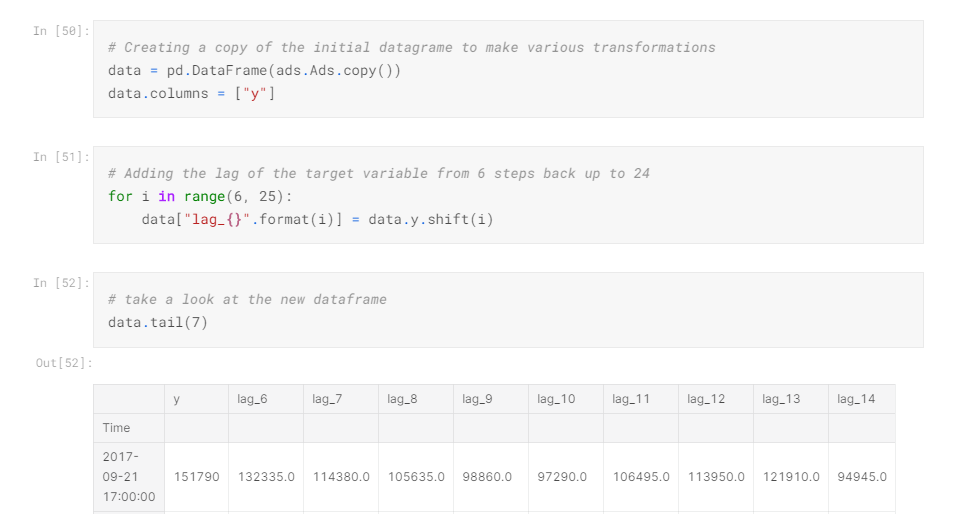
    
* Intro to Eco: Stock and Watson (PG 703)
    * VECM is alternative to eliminating stochastic trend in an I(1) variable by taking first difference; if Xt & Yt are cointegrated, another way to eliminate the trend is to compute Yt - theta(Xt) -- where theta == chosen to eliminate the common trend from the difference; thus this term becomes stationary
    * also explains how if Xt & Yt are cointegrated, the first differences of Xt and Yt can be modelled using a VAR, augmented by including: Yt-1 - theta(Xt-1) as an additional regressor 
  
* Financial Econometrics: W5 S43
    * bivariate VECM
        * Theta = LR multipler 
        * X1 and X2 are adjustment parameters: if  previous period == out of equilbrium, both Yt and Xt will adjust towards the equilbrium value
        * B11, B21, Y11, Y21 == model short run responses 
        
    * Slide 39: ADL(1, 1): ECM model interpretation
        * y=1-B1,
        * Theta(0) = B0 / (1 - B1)
        * Theta(1) = Delta(0) + Delta(1) / 1 - B1
        * Equilbrium is: Y = Theta(0) + Theta(1)(X)
        * If T-1; Y is > EQ value >> Yt-1 - T(0) - T(1)Xt-1 > 0   ... Then, change in Y by: -y(Yt-1 - T(0) - T(1)Xt-1) < 0  and thus Y will move towards EQ value and when Y is below EQ value, it will be adjusted upwards 

In [ ]:
#try doing the LR-effects - graphs to see which line corressponds to what 

In [ ]:
df_basis_coupons_month

<a id='cointegration_test'></a>


### Stationarity Testing
* First, test code against single GVKEY 


# moved to above

In [ ]:
#blanco_2005 -- why small basis == no cointegration (Pg 15/28)
#maybe BAS = so wide that the CDS price / credit spread seemingly move in unrelated ways 



## Apply the stationarity filtering to the main data DF
* from: df_basis_coupons_month -- merged on the df_stationary_filtered, by GVKEY

In [22]:
#merge those GVKEYS with unit roots onto the main DF with the data
df_nonstat_filtered = df_basis_coupons_month.merge(df_nonstat, on=['gvkey'])

In [23]:
df_nonstat_filtered['gvkey'].value_counts()

14477.0     2601
11259.0     2491
11636.0     2457
29755.0     2445
6669.0      2435
            ... 
125533.0     153
8551.0       142
28338.0      129
11017.0      120
137024.0     120
Name: gvkey, Length: 261, dtype: int64

In [28]:
#df_nonstat_filtered
#301632 rows

In [25]:
#pickle: df_nonstat_filtered
#results of the ADF test, merged on the main DF by GVKEY - keeping only the unit roots
#the bic length 

#df_nonstat_filtered.to_pickle("./df_nonstat_filtered.pkl")
#df_nonstat_filtered = pd.read_pickle("./df_nonstat_filtered.pkl")

### How does this compare to the VAR method!!? 

In [67]:
#see(vecm_res_1)

In [57]:
cds_2 = np.array(gvkey_14477_nonstat_df['market_cds_spread'])
pecds_2 = np.array(gvkey_14477_nonstat_df['pecds'])
#vecm_data_2 = np.column_stack((cds_2, pecds_2))
vecm_data_2 = pd.DataFrame(data=(cds_2, pecds_2)).T
vecm_data_2.columns = ['cds','pecds']

vecm_model_order_2 = vecm.select_order(data=vecm_data_2[['cds','pecds']], maxlags=10)

vecm_rank_2 = vecm.select_coint_rank(vecm_data_2, det_order =1, k_ar_diff = vecm_model_order_2.bic, 
                                   method ='trace', signif=0.05)

vecm_regmodel_2 = vecm.VECM(vecm_data, k_ar_diff=vecm_model_order_2.bic, coint_rank=vecm_rank_2.rank, deterministic='cili')

vecm_res_2 = vecm_regmodel_2.fit()
print(vecm_res_2.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1          0.1007      0.020      5.016      0.000       0.061       0.140
L1.y2         -0.0007      0.008     -0.088      0.930      -0.017       0.015
Det. terms outside the coint. relation & lagged endog. parameters for equation y2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.1836      0.049     -3.747      0.000      -0.280      -0.088
L1.y2         -0.0006      0.020     -0.030      0.976      -0.040       0.039
                 Loading coefficients (alpha) for equation y1                 
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

In [58]:
vecm_res_2.test_granger_causality(caused=0).summary()

Test statistic,Critical value,p-value,df
1.077,2.998,0.341,"(2, 4960)"


In [59]:
vecm_res_1.test_granger_causality(caused=1).summary()

Test statistic,Critical value,p-value,df
6.069,2.998,0.002,"(2, 4960)"


In [60]:
granger_res = vecm_res_2.test_granger_causality(caused=0)
print(granger_res.signif, '\n', "pvalue ==", granger_res.pvalue)

0.05 
 pvalue == 0.3407929740209228


In [ ]:
#might indicate that BONDS move before CDS? 

In [61]:
cds_inst_caus = vecm_res_2.test_inst_causality(causing=0)
pecds_inst_caus = vecm_res_2.test_inst_causality(causing=1)
print(cds_inst_caus.summary(), '\n', pecds_inst_caus.summary())
#two ojbects should == each other (True)

Instantaneous causality Wald-test. H_0: y1 does not instantaneously cause y2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         18.46          3.841   0.000  1
---------------------------------------- 
 Instantaneous causality Wald-test. H_0: y2 does not instantaneously cause y1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         18.46          3.841   0.000  1
----------------------------------------


In [62]:
#white test (residuals autocorrelations)
white_test = vecm_res_2.test_whiteness(nlags=10, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
45.74,46.19,0.055,32


# JOHANSEN COINTEGRATING TEST
* https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.select_coint_rank.html#statsmodels.tsa.vector_ar.vecm.select_coint_rank

In [12]:
joint_nonstat_df

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,AMGN.GN,2007-10-24,91.000000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602,4.590,4.410,4.460,4.550,4.640,27.500,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
1,AMGN.GN,2007-10-25,92.375000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.273209,1602,4.570,4.400,4.460,4.560,4.650,26.500,AMGN.S5,-43.290195,0.181762,2007,1063.083364,-1036.583364,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
2,AMGN.GN,2007-10-26,92.625200,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.270471,1602,4.570,4.420,4.490,4.590,4.690,26.000,AMGN.S5,-43.268863,0.181599,2007,1062.041066,-1036.041066,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
3,AMGN.GN,2007-10-29,92.436999,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.262257,1602,4.590,4.440,4.510,4.610,4.710,25.300,AMGN.S5,-43.253834,0.181526,2007,1061.575710,-1036.275710,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
4,AMGN.GN,2007-10-30,92.375000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.259519,1602,4.590,4.460,4.530,4.620,4.720,25.600,AMGN.S5,-43.242406,0.181498,2007,1061.395572,-1035.795572,2007-10-01,1,-2.51563,0.111717,fail reject H0,-1.77029,0.395311,fail reject H0,joint_fail_reject_H0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271525,PVH3941443,2017-06-26,103.663000,585593.0,True,4.500,2.0,F,20221215.0,0.0,1.0,5.470338,8551,1.421,1.546,1.651,1.738,1.815,338.202,PVH5$AX,-3.583364,0.086413,2017,40.113889,298.088111,2017-06-01,1,-2.58546,0.0960402,*,-1.81799,0.371567,fail reject H0,joint_fail_reject_H0
271526,PVH3941443,2017-06-27,103.250000,585593.0,True,4.500,2.0,F,20221215.0,0.0,1.0,5.467600,8551,1.436,1.573,1.688,1.783,1.868,338.202,PVH5$AX,-3.583552,0.086150,2017,39.986641,298.215359,2017-06-01,1,-2.58546,0.0960402,*,-1.81799,0.371567,fail reject H0,joint_fail_reject_H0
271527,PVH3941443,2017-06-28,103.250000,585593.0,True,4.500,2.0,F,20221215.0,0.0,1.0,5.464862,8551,1.434,1.571,1.690,1.790,1.877,338.202,PVH5$AX,-3.583821,0.086100,2017,39.962420,298.239580,2017-06-01,1,-2.58546,0.0960402,*,-1.81799,0.371567,fail reject H0,joint_fail_reject_H0
271528,PVH3941443,2017-06-29,103.000000,585593.0,True,4.500,2.0,F,20221215.0,0.0,1.0,5.462124,8551,1.448,1.598,1.724,1.832,1.925,338.202,PVH5$AX,-3.583892,0.085864,2017,39.848297,298.353703,2017-06-01,1,-2.58546,0.0960402,*,-1.81799,0.371567,fail reject H0,joint_fail_reject_H0


In [57]:
joint_nonstat_df['gvkey'].nunique()

239

# PRESENTABLE COINTEGRATION TABLE: UPDATE 25.08

In [227]:
joint_nonstat_df = pd.read_pickle("./joint_nonstat_df.pkl")


In [228]:
#new one, based off stationary filtered values 
joh_ct_cv = 3.8415

#initialise lists to have values appended to them
gvkey_list = []
optimal_lag_list = []
cointeg_rank_list = []                      #number of cointegrating relationships, expressed as (int)
cointeg_teststats_list_eq_1 = []            #the test statistic (if significant) for (1) cointegrating relationship
cointeg_teststats_list_eq_2 = []            #the test statistic (if significant) for (2) cointegrating relationship
cointeg_critvals_1 = []             #the equivalent critical values for (1) cointegrating relationship 
cointeg_critvals_list_eq_2 = []             #the equivalent critical values for (2) cointegrating relationship 
cointeg_pass_1 = []                         #boolean array of test outcome
#cointeg_pass_2 = []                         #boolean array of test outcome
cointeg_cv_00 = []
cointeg_cv_01 = []
index_errors_counter = 0                    #back-up 2nd method to check frequencies
five_pnt_cv = "**"
#test_stats = []
coint_signif = []
pass_boolean = []
clean_ts_list = []


#specify how to reference the values / index within the DF, grouped by "gvkey"
for i, val in enumerate(joint_nonstat_df.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    
    #load data for model -- column_stack is quicker here as the DF method is not needed
    cds = data.market_cds_spread
    pecds = data.pecds
    data = pd.DataFrame(data=(cds, pecds)).T
    gvkey_list.append(gvkey) 
    
    try:
        model = vecm.select_order(data, maxlags=5)
        optimal_lag_length = model.bic
        optimal_lag_list.append(optimal_lag_length)
        
        vecm_cointeg_rank = vecm.select_coint_rank(data, det_order =1, k_ar_diff = optimal_lag_length, 
                                                  method='trace', signif=0.05)
        
        cointeg_critvals_1.append(vecm_cointeg_rank.crit_vals)

        if vecm_cointeg_rank.rank >= 1:
            cointeg_rank_list.append(int(1))
        else: 
            cointeg_rank_list.append(int(0))

        #cointeg_teststats_list_eq_1.append(vecm_cointeg_rank.test_stats[0])
        
        try:
            test_stat_0 = np.round(vecm_cointeg_rank.test_stats[0], 4)
            cointeg_teststats_list_eq_1.append(test_stat_0)
            clean_ts_list.append(test_stat_0)
        except IndexError as ts_index_error:
            print("IndexError: Row: {}, Reason : {} ".format(i, ts_index_error), "GVKEY: {}".format(gvkey))

        try:
            test_stat_x0 = np.round(vecm_cointeg_rank.test_stats[0], 6)
            if test_stat_x0 >= vecm_cointeg_rank.crit_vals[0]:
                coint_signif.append("**")
                pass_boolean.append("Reject_H0")
            else:
                coint_signif.append(" ")
                pass_boolean.append("Fail_Reject_H0")
        except IndexError as ts_index_error_2:
            #print("IndexError: Row: {}, Reason : {} ".format(i, ts_index_error), "GVKEY: {}".format(gvkey))
            pass
            
        
        #cointeg_teststats_list_eq_2.append(vecm_cointeg_rank.test_stats[1])
        #cointeg_critvals_list_eq_1.append(vecm_cointeg_rank.crit_vals[0])
        #cointeg_critvals_list_eq_2.append(vecm_cointeg_rank.crit_vals[1])
        
        #if (vecm_cointeg_rank.test_stats[0] >= joh_ct_cv):   #vecm_cointeg_rank.crit_vals[1]: #tests if reject null of at most (1) CE rel
        #    cointeg_pass_1.append("Reject H0")
        #else:
        #    cointeg_pass_1.append("Fail Reject H0")
            
        #if vecm_cointeg_rank.test_stats[1]  >= vecm_cointeg_rank.crit_vals[1]:
        #    cointeg_pass_2.append("reject_null")
        #else:
        #    cointeg_pass_2.append("fail")
    
    except IndexError as ie:
        #print("IndexError: Row: {}, Reason : {} ".format(i, ie))
        index_errors_counter += 1
        continue
    
    #catch the ValueError of either: NaN or Infs   
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e))
        continue
        
    #catch the linear algrebra error: matrix is not positive definitie    
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a))
        continue
    
    #This issue I think occurs with the formation of the DF actually, but for additional robustness
    except TypeError as t:
        print("TypeError: Row: {}, Reason : {} ".format(i, t))
        continue

try:
    coint_sig = ["{}{}".format(cointeg_teststats_list_eq_1, coint_signif) for cointeg_teststats_list_eq_1, coint_signif in zip(cointeg_teststats_list_eq_1, coint_signif)]  
except Exception: 
    pass
    
    
#test_stats = ["{}{}".format(i, five_pnt_cv) for i in np.round(cointeg_teststats_list_eq_1,4) if i >= joh_ct_cv]
#test_stats = np.round(cointeg_teststats_list_eq_1,4)
        
try:    
    df_coint_rank = pd.DataFrame(data=(gvkey_list, cointeg_rank_list, 
                                       coint_sig, pass_boolean, clean_ts_list)).T
    
except TypeError as t2:
    print("TypeError: Reason : {} ".format(t2))

print(index_errors_counter)    
df_coint_rank.columns = ['gvkey','coint_rank', 'cointegration_test_stat','outcome', 'clean_ts_list']    


print(vecm_cointeg_rank.crit_vals)
#print(vecm_cointeg_rank.crit_vals[1])
#signif = 0.05

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Row: 67, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 113, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 131, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 138, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 158, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 190, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 208, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 218, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
ValueError: Row: 230, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
0
[18.3985  3.8415]


In [55]:
#print(df_coint_rank.to_string())

In [64]:
#df_coint_rank

In [229]:
df_coint_rank_clean = df_coint_rank.dropna()
df_coint_rank_clean

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list
0,1078,0,14.1904,Fail_Reject_H0,14.1904
1,1161,1,21.8439**,Reject_H0,21.8439
2,1209,0,17.5573,Fail_Reject_H0,17.5573
3,1300,1,23.5902**,Reject_H0,23.5902
4,1408,0,14.8162,Fail_Reject_H0,14.8162
...,...,...,...,...,...
225,113490,0,11.7022,Fail_Reject_H0,11.7022
226,120301,1,18.9949**,Reject_H0,18.9949
227,120877,0,14.8516,Fail_Reject_H0,14.8516
228,126296,1,26.2856**,Reject_H0,26.2856


In [65]:
len(df_coint_rank_clean.loc[df_coint_rank_clean.coint_rank>=1.0])

91

In [66]:
#print(df_coint_rank.to_string())

In [232]:
#pickle: df_coint_rank

#df_coint_rank.to_pickle("./df_coint_rank.pkl")
#df_coint_rank = pd.read_pickle("./df_coint_rank.pkl") #base_frame with all OBS for coint_test (johansen)

#df_coint_rank_clean.to_pickle("./df_coint_rank_table.pkl")
#df_coint_rank_clean = pd.read_pickle("./df_coint_rank_table.pkl") #presentable frame (ALL OBS) coint_test (missing bic)

In [ ]:
#merge with sector data


In [230]:
df_coint_rank_clean_sector = df_coint_rank_clean.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [231]:
df_coint_rank_clean_sector

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list,sector
0,1078,0,14.1904,Fail_Reject_H0,14.1904,Health Care
1,1161,1,21.8439**,Reject_H0,21.8439,Technology
2,1209,0,17.5573,Fail_Reject_H0,17.5573,Materials
3,1300,1,23.5902**,Reject_H0,23.5902,Capital Goods
4,1408,0,14.8162,Fail_Reject_H0,14.8162,Consumer Staples
...,...,...,...,...,...,...
225,113490,0,11.7022,Fail_Reject_H0,11.7022,Consumer Cyclical
226,120301,1,18.9949**,Reject_H0,18.9949,Consumer Staples
227,120877,0,14.8516,Fail_Reject_H0,14.8516,Consumer Staples
228,126296,1,26.2856**,Reject_H0,26.2856,Transporation


In [218]:
df_coint_rank_clean_sector.loc[df_coint_rank_clean_sector.outcome=='Fail_Reject_H0']

,gvkey,coint_rank,cointegration_test_stat,outcome,sector
0,1078,0,14.1904,Fail_Reject_H0,Health Care
2,1209,0,17.5573,Fail_Reject_H0,Materials
4,1408,0,14.8162,Fail_Reject_H0,Consumer Staples
5,1440,0,13.5904,Fail_Reject_H0,Utilities
6,1468,0,11.1301,Fail_Reject_H0,Consumer Cyclical
...,...,...,...,...,...
221,65399,0,15.1678,Fail_Reject_H0,Consumer Cyclical
223,110039,0,11.839,Fail_Reject_H0,Technology
224,112876,0,5.6374,Fail_Reject_H0,Energy
225,113490,0,11.7022,Fail_Reject_H0,Consumer Cyclical


In [72]:
#df_coint_rank_clean_sector.groupby('sector').agg({'coint_rank'==1:['size'],
#                                                 'coint_rank'==0:['size']})

In [233]:
df_crcs_cointegrated = df_coint_rank_clean_sector.loc[df_coint_rank_clean_sector.outcome=='Reject_H0']
df_crcs_nocoint = df_coint_rank_clean_sector.loc[df_coint_rank_clean_sector.outcome=='Fail_Reject_H0']

In [234]:
df_coint_test_totals = df_coint_rank_clean_sector.groupby('sector')['outcome'].size()

In [235]:
df_cointegrated_size = df_crcs_cointegrated.groupby('sector')['outcome'].size()
df_nocoint_size = df_crcs_nocoint.groupby('sector')['outcome'].size()

In [250]:
df_crcs_nocoint

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list,sector
0,1078,0,14.1904,Fail_Reject_H0,14.1904,Health Care
2,1209,0,17.5573,Fail_Reject_H0,17.5573,Materials
4,1408,0,14.8162,Fail_Reject_H0,14.8162,Consumer Staples
5,1440,0,13.5904,Fail_Reject_H0,13.5904,Utilities
6,1468,0,11.1301,Fail_Reject_H0,11.1301,Consumer Cyclical
...,...,...,...,...,...,...
221,65399,0,15.1678,Fail_Reject_H0,15.1678,Consumer Cyclical
223,110039,0,11.839,Fail_Reject_H0,11.839,Technology
224,112876,0,5.6374,Fail_Reject_H0,5.6374,Energy
225,113490,0,11.7022,Fail_Reject_H0,11.7022,Consumer Cyclical


In [238]:
df_coint_rank_clean_sector['clean_ts_list'] = df_coint_rank_clean_sector['clean_ts_list'].astype(float)

In [239]:
#add the stats based off full DF 
coint_describe_stats = df_coint_rank_clean_sector.groupby('sector').agg({'clean_ts_list':['mean','median']})
#nocoint_pval_avg = df_crcs_nocoint

In [255]:
df_crcs_nocoint['clean_ts_list'] = df_crcs_nocoint['clean_ts_list'].astype(float)
df_crcs_cointegrated['clean_ts_list'] = df_crcs_cointegrated['clean_ts_list'].astype(float)

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
#df_crcs_nocoint.groupby('sector').agg({'clean_ts_list':['mean','median']})

In [257]:
df_crcs_nocoint_stats = df_crcs_nocoint.groupby('sector').agg({'clean_ts_list':['mean','median']})
df_crcs_cointegrated_stats = df_crcs_cointegrated.groupby('sector').agg({'clean_ts_list':['mean','median']})
df_crcs_nocoint_stats = np.round(df_crcs_nocoint_stats, 2)
df_crcs_cointegrated_stats = np.round(df_crcs_cointegrated_stats, 2)
#coint_describe_stats

In [112]:
#coint_describe_stats.columns

In [111]:
#coint_describe_stats = coint_describe_stats.drop([('clean_ts_list', 'describe',   '25%'),
#                                                 ('clean_ts_list', 'describe',   '75%')], axis=1)

In [241]:
coint_describe_stats = np.round(coint_describe_stats, 2)

In [242]:
coint_describe_stats

clean_ts_list       
                                mean median
sector                                     
Capital Goods                  15.83  14.48
Communication Services         29.09  29.09
Consumer Cyclical              37.93  15.31
Consumer Staples               20.73  18.99
Energy                         16.89  15.14
Financials                     17.35  15.21
Health Care                    16.86  14.15
Materials                      18.03  14.70
Technology                     16.54  13.31
Transporation                  18.52  16.04
Utilities                      16.67  14.66

In [262]:
df_crcs_sizes_concat = pd.concat([df_cointegrated_size, df_crcs_cointegrated_stats, 
                                  df_nocoint_size, df_crcs_nocoint_stats], axis=1)

In [263]:
df_crcs_sizes_concat_df = pd.DataFrame(df_crcs_sizes_concat)


In [264]:
df_crcs_sizes_concat_df

,outcome,"(clean_ts_list, mean)","(clean_ts_list, median)",outcome,"(clean_ts_list, mean)","(clean_ts_list, median)"
sector,,,,,,
Capital Goods,7,23.22,19.76,13,11.84,12.77
Communication Services,1,48.92,48.92,1,9.25,9.25
Consumer Cyclical,19,78.54,25.97,29,11.32,11.71
Consumer Staples,18,26.21,22.99,11,11.77,11.93
Energy,10,25.01,23.47,15,11.48,11.20
Financials,9,25.53,22.09,15,12.45,12.68
Health Care,5,24.87,26.66,10,12.85,12.68
Materials,7,31.14,24.64,16,12.29,11.94
Technology,5,29.32,28.06,11,10.73,10.65


In [267]:
df_crcs_sizes_concat_df.take([0],axis=1).sum()

outcome    90
dtype: int64

In [268]:
df_crcs_sizes_concat_df.take([3],axis=1).sum()

outcome    139
dtype: int64

In [265]:
#df_crcs_sizes_concat_df.to_pickle("./df_crcs_sizes_concat_df.pkl")
#df_crcs_sizes_concat_df = pd.read_pickle("./df_crcs_sizes_concat_df.pkl") 

In [47]:

#print(df_crcs_sizes_concat_df.to_latex())
#90 COINT
#139 NO COINT
#229 STAT?

In [68]:
#df_coint_rels_one_failed = df_coint_rank.loc[(df_coint_rank.cointeg_test_1_res=='fail') & (df_coint_rank.cointeg_rels==1)]

# NO COINT_RELATIONSHIPS OR (==1) but failed TS 

In [108]:
#df_no_coint_rel = df_coint_rank_clean.loc[(df_coint_rank_clean['coint_rank'].isnull()) | ((df_coint_rank.cointeg_test_1_res=='Fail Reject H0') & (df_coint_rank.cointeg_rels==1))]

In [109]:
print(len(df_no_coint_rel))

148


In [151]:
#df_no_coint_rel_nonull = df_no_coint_rel.loc[:229]

In [204]:
#pickle: df_no_coint_rel

#df_no_coint_rel.to_pickle("./df_no_coint_rel.pkl")
#df_no_coint_rel = pd.read_pickle("./df_no_coint_rel.pkl") #148 GVKEYS with (NO) significant coint_rels

# MERGE ONTO DATA_DF FOR VAR/GCT

In [152]:
#merge onto the main DF (create the full data_df) for VAR/GCT model
df_no_coint_fulldata = df_basis_coupons_month.merge(df_no_coint_rel_nonull, on=['gvkey'])

In [154]:
#pickle: df_no_coint_fulldata

#df_no_coint_fulldata.to_pickle("./df_no_coint_fulldata.pkl")
#df_no_coint_fulldata = pd.read_pickle("./df_no_coint_fulldata.pkl") #139 GVKEYS with no coint_rels (full data less nan keys)

# SIGNIFICANT and COINTEGRATING DF

In [124]:
df_coint_rels = df_coint_rank.loc[(df_coint_rank.cointeg_rels==1) & (df_coint_rank.cointeg_test_1_res=='Reject H0')]

In [139]:
print(len(df_coint_rels))

91


In [124]:
#df_coint_rels

In [49]:
#pickle: df_coint_rels

#df_coint_rels.to_pickle("./df_coint_rels.pkl")
#df_coint_rels = pd.read_pickle("./df_coint_rels.pkl") #91 GVKEYS with significant coint_rels

# MERGE GVKEYS to CREATE DF FOR VECM

In [142]:
#merge onto the main DF (create the full data_df) for VECM model
df_coint_rels_fulldata = df_basis_coupons_month.merge(df_coint_rels, on=['gvkey'])

In [125]:
#df_coint_rels_fulldata

In [145]:
#pickle: df_coint_rels

#df_coint_rels_fulldata.to_pickle("./df_coint_rels_fulldata.pkl")
#df_coint_rels_fulldata = pd.read_pickle("./df_coint_rels_fulldata.pkl") #91 GVKEYS with significant coint_rels (full data)

In [ ]:
#VECM SELECT ORDER: #from 239 non-stat series (daily) 
#91 coint rels
#148

## Phillips Ouliaris
* on: joint_nonstat_df
* https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.cointegration.phillips_ouliaris.html
* results: https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.cointegration.PhillipsOuliarisTestResults.html#arch.unitroot.cointegration.PhillipsOuliarisTestResults

In [ ]:
https://bashtage.github.io/arch/doc/unitroot/unitroot_cointegration_examples.html
https://bashtage.github.io/arch/doc/unitroot/generated/arch.unitroot.cointegration.phillips_ouliaris.htmlarch.unitroot.cointegration.phillips_ouliaris

In [56]:
joint_nonstat_df = pd.read_pickle("./joint_nonstat_df.pkl")

In [126]:
#joint_nonstat_df.groupby('gvkey').size()

In [86]:
g8851_po = joint_nonstat_df.loc[joint_nonstat_df.gvkey==1300]

In [88]:
#g8851_po

In [89]:
g8851_po_res = phillips_ouliaris(g8851_po['market_cds_spread'], g8851_po['pecds'], trend='c', test_type='Pz',kernel='bartlett')

In [90]:
g8851_po_res.summary()

Test Statistic,63.330
P-value,0.021
Kernel,Bartlett
Bandwidth,5.852


In [ ]:
df_basis_coupons_month

In [108]:
#NOT IN USE 



#initialise lists 
gvkey_list = []
mcds_coint_vec = []
pecds_coint_vec = []
const_coint_vec = []
cointeg_rank_list = []                      #number of cointegrating relationships, expressed as (int)
cointeg_teststats = []            #the test statistic (if significant) for (1) cointegrating relationship
coint_pval = []
cointeg_pass_1 = []                         #boolean array of test outcome
index_errors_counter = 0                    #back-up 2nd method to check frequencies


#specify how to reference the values / index within the DF, grouped by "gvkey"
for i, val in enumerate(joint_nonstat_df.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    
    cds = data.market_cds_spread
    pecds = data.pecds
    data = pd.DataFrame(data=(cds, pecds)).T
    #data = np.column_stack((cds, pecds))
    
    try:
        gvkey_list.append(gvkey) 
        phillips_ouliaris_rank = phillips_ouliaris(data['market_cds_spread'], data['pecds'], trend='c', test_type='Pz',kernel='bartlett')
        
        if phillips_ouliaris_rank.distribution_order >= 1:
            cointeg_rank_list.append(int(1))
            
        cointeg_teststats.append(phillips_ouliaris_rank.stat)
        
        if phillips_ouliaris_rank.stat >= phillips_ouliaris_rank.critical_values[5]:
            cointeg_pass_1.append("Reject_H0: cointegrated")
        else:
            cointeg_pass_1.append("fail_reject_null: no_coint")
       
        po_pval = np.round(phillips_ouliaris_rank.pvalue,4)
        coint_pval.append(po_pval)
        
        mcds_cv_val = np.round(phillips_ouliaris_rank.cointegrating_vector[0],4)
        pecds_cv_val = np.round(phillips_ouliaris_rank.cointegrating_vector[1],4)
        const_cv_val = np.round(phillips_ouliaris_rank.cointegrating_vector[2],4)
        
        mcds_coint_vec.append(mcds_cv_val)
        pecds_coint_vec.append(pecds_cv_val)
        const_coint_vec.append(const_cv_val)
    
    except IndexError as ie:
        #print("IndexError: Row: {}, Reason : {} ".format(i, ie), "GVKEY:{}".format(gvkey))
        index_errors_counter += 1
        
    
    #catch the ValueError of either: NaN or Infs   
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e), "GVKEY:{}".format(gvkey))
        
        
    #catch the linear algrebra error: matrix is not positive definitie    
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a), "GVKEY:{}".format(gvkey))
        
    
    #This issue I think occurs with the formation of the DF actually, but for additional robustness
    except TypeError as t:
        print("TypeError: Row: {}, Reason : {} ".format(i, t), "GVKEY:{}".format(gvkey))
        
    except Exception as ex:
        print("Exception(Assertion_error?): Row: {}, Reason : {} ".format(i, ex), "GVKEY:{}".format(gvkey))    
        

    
df_coint_rank_po = pd.DataFrame(data=(gvkey_list, cointeg_rank_list, cointeg_teststats, coint_pval, cointeg_pass_1,
                                       mcds_coint_vec, pecds_coint_vec, const_coint_vec)).T

print(index_errors_counter)    
df_coint_rank_po.columns = ['gvkey_list', 'cointeg_rank_list', 'cointeg_teststats', 'coint_pval', 'cointeg_pass_1',
                                       'mcds_coint_vec', 'pecds_coint_vec', 'const_coint_vec']    


print(phillips_ouliaris_rank.critical_values)
print(phillips_ouliaris_rank.null_hypothesis)


#NOT IN USE!!



Exception(Assertion_error?): Row: 67, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:5671.0
Exception(Assertion_error?): Row: 131, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:10187.0
Exception(Assertion_error?): Row: 138, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:10443.0
Exception(Assertion_error?): Row: 158, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:12459.0
Exception(Assertion_error?): Row: 190, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:25495.0
Exception(Assertion_error?): Row: 208, Reason : Number of manager items must equal union of block items
# manager items: 1, # tot_items: 0  GVKEY:30219.0
Exception(Assertion_error?): Row: 218, Reason : Number of manager items must e

In [127]:
#df_coint_rank_po

In [111]:
df_cr_po_confirmed_rels = df_coint_rank_po.loc[df_coint_rank_po.cointeg_pass_1=='Reject_H0: cointegrated']
print(len(df_cr_po_confirmed_rels))
df_cr_po_confirmed_rels

63


,gvkey_list,cointeg_rank_list,cointeg_teststats,coint_pval,cointeg_pass_1,mcds_coint_vec,pecds_coint_vec,const_coint_vec
1,1161,1,59.6949,0.0299,Reject_H0: cointegrated,1,-9,-623
3,1300,1,63.3297,0.0208,Reject_H0: cointegrated,1,-0,-22
4,1408,1,56.1157,0.0425,Reject_H0: cointegrated,1,0,-159
21,2490,1,78.5715,0.0044,Reject_H0: cointegrated,1,-1,-13
25,2663,1,55.4898,0.0451,Reject_H0: cointegrated,1,-0,-42
...,...,...,...,...,...,...,...,...
210,30697,1,58.333,0.0342,Reject_H0: cointegrated,1,-3,-152
213,60800,1,56.4139,0.0413,Reject_H0: cointegrated,1,-2,-303
217,61811,1,68.2801,0.0125,Reject_H0: cointegrated,1,1,-149
223,110039,1,64.3763,0.0187,Reject_H0: cointegrated,1,-2,-199


<a id='VECM_PDM'></a>

# VECM CODE + PD MEASURES (FINAL): 26.08.2020

In [5]:
df_coint_rels_fulldata = pd.read_pickle("./df_coint_rels_fulldata.pkl") #91 GVKEYS with significant coint_rels (full data)

In [ ]:
#3

#try using alpha instead of the loading coefs once more

In [6]:
gg_list = []; gg_pd = []; has_pd = []; gg_count = []; has_count = []
has_lower = []; has_upper = []; has_mid = []
loading_co_1 = []; loading_co_2 = []
alpha_00 = []; alpha_01 = []; alpha_10 = []; alpha_11 = []
alpha_e1_pval = []; alpha_e2_pval = []
const_00 = []; const_01 = []
lin_trend_00 = []; lin_trend_01 = []
sigma_u_list = []
siglist_1 = []; siglist_12 = []; siglist_2 = []
nobs_list = []
gvkey_list = []
VECM_FINAL_RESULTS_DF = pd.DataFrame()
vecm_results = []; #vecm_result_table = []
it_tracker = 0 
problem_gvkeys = []
load_coef_list_1 = []; load_coef_list_2 = []
gct_name_1 = []; gct_name_2 = []
gct_result_1 = []; gct_result_2 = []
gct_res1_pval = [];  gct_res2_pval = []
gct_winner = []
gg_loadcoef = []
l_coef_1 = []; l_coef_2 = []
beta_list = []; beta_pvalues = []
eq1_alpha_pval_star = []; eq2_alpha_pval_star = []; eq2_beta_pval_star = []
eq1_a_star = []; eq2_a_star = []; eq2_b_star = []
speedadj_star_a1 = []; speedadj_star_a2 = []

for i, val in enumerate(df_coint_rels_fulldata.groupby('gvkey')):
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)                  

    #load the data to create the model for each GVKEY/LOOP
    cds = data.market_cds_spread
    #cds = cds.diff().dropna()
    pecds = data.pecds
    #pecds = pecds.diff().dropna()
    vecm_data = pd.DataFrame(data=(cds, pecds)).T
    #vecm_data = np.column_stack((cds, pecds))
    
    #model | #acquire the model order - to pass in according to BIC
    #try
    try:
        vecm_model_order = vecm.select_order(vecm_data, maxlags=5)
        #vecm_coint_rank = vecm.select_coint_rank(vecm_data, det_order = 1, 
        #                                         k_ar_diff = vecm_model_order.bic,method='trace', signif=0.05)

        vecm_regression_model = vecm.VECM(vecm_data, k_ar_diff=vecm_model_order.bic, 
                                          coint_rank=1, deterministic='cili')
        vecm_regresion_fit = vecm_regression_model.fit()
        #print(vecm_regresion_fit.summary())
        
    #catch the ValueError of either: NaN or Infs   
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e))
        pass
        
    #catch the linear algrebra error: matrix is not positive definitie    
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a))
        pass
    
    #This issue I think occurs with the formation of the DF actually, but for additional robustness
    except TypeError as t:
        print("TypeError: Row: {}, Reason : {} ".format(i, t))
        pass            

    #General_Overview_Items:        
    nobs = vecm_regresion_fit.nobs 
    nobs_list.append(nobs)
    #log_lh = vecm_regresion_fit.llf 
    #coint_rank = vecm_coint_rank.rank
    #vecm_cointrank_bic = vecm_model_order.bic
    
    sigma_u = vecm_regresion_fit.sigma_u
    sigma_u_list.append(vecm_regresion_fit.sigma_u)
    chol_decomp = np.linalg.cholesky(vecm_regresion_fit.sigma_u)
    siglist_1.append(chol_decomp[0, 0]); siglist_12.append(chol_decomp[1, 0]); siglist_2.append(chol_decomp[1, 1])
    
    try:
        alpha_00.append(np.round(vecm_regresion_fit.alpha[0,0],3))
        #alpha_01.append(np.round(vecm_regresion_fit.alpha[0,1],4)) 
        alpha_10.append(np.round(vecm_regresion_fit.alpha[1,0],3))
        #alpha_11.append(np.round(vecm_regresion_fit.alpha[1,1],4))

        alpha_e1_pval.append(np.round(vecm_regresion_fit.pvalues_alpha[0,0],4))
        alpha_e2_pval.append(np.round(vecm_regresion_fit.pvalues_alpha[1,0],4))
    except IndexError as ie_1:
        print("IndexError: Row: {}, Reason : {} ".format(i, ie_1), "GVKEY: {}".format(gvkey))
        alpha_00.append("IndexError")
       # alpha_01.append("IndexError")
        alpha_10.append("IndexError")
        #alpha_11.append("IndexError")
        alpha_e1_pval.append("IndexError")
        alpha_e2_pval.append("IndexError")       
        continue
        
    try:
        const_coint_00 = vecm_regresion_fit.const_coint[0,0]
        #const_coint_01 = vecm_regresion_fit.const_coint[0,1]
        const_00.append(np.round(const_coint_00,4)) #; const_01.append(const_coint_01)
        beta_list.append(np.round(vecm_regresion_fit.beta[1,0],4))
        beta_pvalues.append(np.round(vecm_regresion_fit.pvalues_beta[1, 0], 4))
        
        if vecm_regresion_fit.pvalues_alpha[0,0] <= 0.05:
            eq1_a_star.append("**")
            speedadj_star_a1.append("**")
        elif vecm_regresion_fit.pvalues_alpha[0,0] <= 0.10:
            speedadj_star_a1.append("*")
        else:
            eq1_a_star.append(" ")
            speedadj_star_a1.append(" ")
            
        if vecm_regresion_fit.pvalues_alpha[1,0] <= 0.05:
            eq2_a_star.append("**")
            speedadj_star_a2.append("**")
        elif vecm_regresion_fit.pvalues_alpha[1,0] <= 0.10:
            speedadj_star_a2.append("*")            
        else:
            eq2_a_star.append(" ")
            speedadj_star_a2.append("*") 
            
        if vecm_regresion_fit.pvalues_beta[1,0] <= 0.05:
            eq2_b_star.append("**")
        else:
            eq2_b_star.append(" ")            
        
        eq1_alpha_pval_star.append(np.round(vecm_regresion_fit.pvalues_alpha[0,0],4))
        eq2_alpha_pval_star.append(np.round(vecm_regresion_fit.pvalues_alpha[1,0],4))
        eq2_beta_pval_star.append(np.round(vecm_regresion_fit.pvalues_beta[1, 0], 4))

        
        gg_val = np.round(vecm_regresion_fit.beta[1,0] / (vecm_regresion_fit.beta[1,0] - vecm_regresion_fit.beta[0,0]), 2)
        
        if gg_val <= 0:
            gg_val = float(0)
        elif gg_val >=1:
            gg_val = float(1)
            
        if gg_val >= 0.52:
            gg_pd.append("CDS")
            gg_count.append(int(1))
        elif gg_val <= 0.47:
            gg_pd.append("BOND")
            gg_count.append(int(2))
        else:
            gg_pd.append("EQUAL")
            gg_count.append(int(3))
        
        gg_list.append(gg_val)
        #x_2 = vecm_regresion_fit.alpha[0,0]
        #x_1 = vecm_regresion_fit.alpha[1,0]
        sig_1 = chol_decomp[0, 0]
        sig_12 = chol_decomp[1, 0]
        sig_2 = chol_decomp[1, 1]
        
        loading_coef_1 = (vecm_regresion_fit.beta[0] - vecm_regresion_fit.const_coint[0,0] - vecm_regresion_fit.alpha[0,0] - vecm_regresion_fit.lin_trend_coint[0, 0])
        loading_coef_2 = (vecm_regresion_fit.beta[1] + vecm_regresion_fit.const_coint[0,0] + vecm_regresion_fit.alpha[1,0] + vecm_regresion_fit.lin_trend_coint[0, 0])
        l_coef_1.append(loading_coef_1)
        l_coef_2.append(loading_coef_2)
        x_1 = vecm_regresion_fit.beta[0,0]
        x_2 = vecm_regresion_fit.beta[1,0]
        gg_loadcoef.append(np.round(loading_coef_2 / (loading_coef_2 - loading_coef_1),4))
        #gg_list.append(loading_coef_2 / loading_coef_2 - loading_coef_1)   #changed GG !
        
        HAS_1 = ( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
        HAS_2 = ( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
        
        
        
        
        HAS_1 = np.round(HAS_1, 2)
        HAS_2 = np.round(HAS_2, 2)
        if HAS_2 > 1.25:
            HAS_2 = float(1)
        
        if HAS_1 <= 0:
            HAS_1 = float(0)
        
        HAS_mid = (HAS_2 + HAS_1) / 2
        
        if HAS_mid >= 0.52:
            has_pd.append("CDS")
            has_count.append(int(1))
        elif HAS_mid <= 0.47:
            has_pd.append("BOND")
            has_count.append(int(2)) 
        else:
            has_pd.append("EQUAL")
            has_count.append(int(3))
        
        HAS_mid = np.round(HAS_mid, 2)
        
        has_lower.append(HAS_1)
        has_upper.append(HAS_2)
        has_mid.append(HAS_mid)
        
        
        
        gct_name_1.append(vecm_regresion_fit.test_granger_causality(caused=0).caused)
        gct_name_2.append(vecm_regresion_fit.test_granger_causality(caused=1).caused)
        gct_result_1.append(np.round(vecm_regresion_fit.test_granger_causality(caused=0).test_statistic,4))
        gct_result_2.append(np.round(vecm_regresion_fit.test_granger_causality(caused=1).test_statistic,4))
        gct_res1_pval.append(np.round(vecm_regresion_fit.test_granger_causality(caused=0).pvalue,4))
        gct_res2_pval.append(np.round(vecm_regresion_fit.test_granger_causality(caused=1).pvalue,4))
        
        if vecm_regresion_fit.test_granger_causality(caused=0).test_statistic > vecm_regresion_fit.test_granger_causality(caused=1).test_statistic:
            gct_winner.append("BOND")
        else:
            gct_winner.append("CDS")
        
    except IndexError as ie_2:
        print("IndexError: Row: {}, Reason : {} ".format(i, ie_2))
        const_coint_00.append("IndexError")
        const_coint_01.append("IndexError")
        const_00.append("IndexError")
        const_01.append("IndexError")
        continue
     


    it_tracker += 1    
    

speed_adj_eq1 = ["{}{}".format(alpha_00, speedadj_star_a1) for alpha_00, speedadj_star_a1 in zip(alpha_00, speedadj_star_a1)]    
speed_adj_eq2 = ["{}{}".format(alpha_10, speedadj_star_a2) for alpha_10, speedadj_star_a2 in zip(alpha_10, speedadj_star_a2)] 

alpha1_sig = ["{}{}".format(eq1_alpha_pval_star, eq1_a_star) for eq1_alpha_pval_star, eq1_a_star in zip(eq1_alpha_pval_star, eq1_a_star)]    
alpha2_sig = ["{}{}".format(eq2_alpha_pval_star, eq2_a_star) for eq2_alpha_pval_star, eq2_a_star in zip(eq2_alpha_pval_star, eq2_a_star)]    
beta2_sig = ["{}{}".format(eq2_beta_pval_star, eq2_b_star) for eq2_beta_pval_star, eq2_b_star in zip(eq2_beta_pval_star, eq2_b_star)]    
    
vecm_result_table = pd.DataFrame(data=(gvkey_list, nobs_list, alpha_00, alpha_e1_pval, alpha_10, 
                         alpha_e2_pval, beta2_sig, gg_list,  
                                       has_lower, has_mid, has_upper,
                                      gct_name_1, gct_result_1, gct_res1_pval, 
                                       gct_name_2, gct_result_2, gct_res2_pval, gct_winner, alpha1_sig, 
                                       alpha2_sig, beta_pvalues, speed_adj_eq1, speed_adj_eq2,
                                      gg_pd, gg_count, has_pd, has_count)).T    
vecm_result_table.columns = ['gvkey', 'nobs', 'alpha_eq1', 'alpha_eq1_pval', 'alpha_eq2',
                             'alpha_eq2_pval', 'beta_eq2_pval',
                             'gg_list', 'has_lower', 'has_mid', 'has_upper',
                            'gct_name_1', 'gct_result_1', 'gct_res1_pval', 'gct_name_2', 
                             'gct_result_2', 'gct_res2_pval', 'gct_winner', 'alpha_eq1_sig', 'alpha_eq2_sig', 
                             'beta_pvalues', 'speed_adj_eq1', 'speed_adj_eq2',
                            'gg_pd', 'gg_count', 'has_pd', 'has_count'] 
print(it_tracker)

#vecm_result_table = vecm_result_table.reset_index()

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Row: 67, Reason : x contains a constant. Adding a constant with trend='c' is not allowed. 
91


In [23]:
vecm_regresion_fit.names

['market_cds_spread', 'pecds']

In [40]:
#vecm_regresion_fit.summary()

In [7]:
vecm_result_table

,gvkey,nobs,alpha_eq1,alpha_eq1_pval,alpha_eq2,alpha_eq2_pval,beta_eq2_pval,gg_list,has_lower,has_mid,has_upper,gct_name_1,gct_result_1,gct_res1_pval,gct_name_2,gct_result_2,gct_res2_pval,gct_winner,alpha_eq1_sig,alpha_eq2_sig,beta_pvalues,speed_adj_eq1,speed_adj_eq2,gg_pd,gg_count,has_pd,has_count
0,1078,619,0.003,0.3678,0.008,0.0073,0.0139**,0.66,0.82,0.83,0.84,[market_cds_spread],0.0088,0.9254,[pecds],1.6191,0.2035,CDS,0.3678,0.0073**,0.0139,0.003,0.008**,CDS,1,CDS,1
1,1161,1884,-0.002,0.2816,0,0.0191,0.0148**,0.98,1,1,1,[market_cds_spread],0.1266,0.722,[pecds],0.1055,0.7453,BOND,0.2816,0.0191**,0.0148,-0.002,0.0**,CDS,1,CDS,1
2,1209,1470,-0.003,0.2638,-0.093,0.0002,0.0094**,0,0,0,0,[market_cds_spread],0.1191,0.73,[pecds],1.565,0.211,CDS,0.2638,0.0002**,0.0094,-0.003,-0.093**,BOND,2,BOND,2
3,1300,2373,-0.006,0.0131,0.008,0.0004,0.0004**,0.46,0.47,0.45,0.43,[market_cds_spread],0.085,0.7707,[pecds],5.2002,0.0226,CDS,0.0131**,0.0004**,0.0004,-0.006**,0.008**,BOND,2,BOND,2
4,1408,1483,-0.013,0.0017,0,0.9905,0.035**,0,0.05,0.08,0.11,[market_cds_spread],2.9502,0.0525,[pecds],0.3076,0.7352,BOND,0.0017**,0.9905,0.035,-0.013**,0.0*,BOND,2,BOND,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7186,659,-0.015,0.0153,-0.019,0.0183,0.1042,0,0.11,0.08,0.05,[market_cds_spread],0.0438,0.8342,[pecds],0.0174,0.8951,BOND,None,None,0.1042,-0.015**,-0.019**,BOND,2,BOND,2
87,7228,1752,-0.009,0,-0.003,0.5747,0.0001**,0.28,0.02,0.02,0.02,[market_cds_spread],0.0652,0.7984,[pecds],0.1338,0.7145,CDS,None,None,0.0001,-0.009**,-0.003*,BOND,2,BOND,2
88,7241,2294,-0.007,0.0079,-0.004,0.1749,0.5294,0,0.03,0.03,0.03,[market_cds_spread],5.5633,0.0184,[pecds],0.0349,0.8517,BOND,None,None,0.5294,-0.007**,-0.004*,BOND,2,BOND,2
89,7343,868,-0.014,0.0011,0.004,0.7592,0.037**,0.17,0.01,0.02,0.02,[market_cds_spread],0.0176,0.8945,[pecds],0.0004,0.9837,BOND,None,None,0.037,-0.014**,0.004*,BOND,2,BOND,2


In [48]:
print(len(vecm_result_table.loc[(vecm_result_table.beta_pvalues<=0.05)]))

57


In [49]:
print(len(vecm_result_table.loc[(vecm_result_table.alpha_eq1_pval<=0.05) | (vecm_result_table.alpha_eq2_pval <= 0.05)]))

87


In [27]:
#print(vecm_result_table[['gg_list','gg_loadcoef']].to_string())

In [8]:
sectors_gvkey_df_grouped_short = pd.read_pickle("./sectors_gvkey_df_grouped_short.pkl") #has fixed sector names

In [10]:
#attach this to sector data!
vecm_result_table_sector = vecm_result_table.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')


In [11]:
vecm_result_table_sector

,gvkey,nobs,alpha_eq1,alpha_eq1_pval,alpha_eq2,alpha_eq2_pval,beta_eq2_pval,gg_list,has_lower,has_mid,has_upper,gct_name_1,gct_result_1,gct_res1_pval,gct_name_2,gct_result_2,gct_res2_pval,gct_winner,alpha_eq1_sig,alpha_eq2_sig,beta_pvalues,speed_adj_eq1,speed_adj_eq2,gg_pd,gg_count,has_pd,has_count,sector
0,1078,619,0.003,0.3678,0.008,0.0073,0.0139**,0.66,0.82,0.83,0.84,[market_cds_spread],0.0088,0.9254,[pecds],1.6191,0.2035,CDS,0.3678,0.0073**,0.0139,0.003,0.008**,CDS,1,CDS,1,Health Care
1,1161,1884,-0.002,0.2816,0,0.0191,0.0148**,0.98,1,1,1,[market_cds_spread],0.1266,0.722,[pecds],0.1055,0.7453,BOND,0.2816,0.0191**,0.0148,-0.002,0.0**,CDS,1,CDS,1,Technology
2,1209,1470,-0.003,0.2638,-0.093,0.0002,0.0094**,0,0,0,0,[market_cds_spread],0.1191,0.73,[pecds],1.565,0.211,CDS,0.2638,0.0002**,0.0094,-0.003,-0.093**,BOND,2,BOND,2,Materials
3,1300,2373,-0.006,0.0131,0.008,0.0004,0.0004**,0.46,0.47,0.45,0.43,[market_cds_spread],0.085,0.7707,[pecds],5.2002,0.0226,CDS,0.0131**,0.0004**,0.0004,-0.006**,0.008**,BOND,2,BOND,2,Capital Goods
4,1408,1483,-0.013,0.0017,0,0.9905,0.035**,0,0.05,0.08,0.11,[market_cds_spread],2.9502,0.0525,[pecds],0.3076,0.7352,BOND,0.0017**,0.9905,0.035,-0.013**,0.0*,BOND,2,BOND,2,Consumer Staples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7186,659,-0.015,0.0153,-0.019,0.0183,0.1042,0,0.11,0.08,0.05,[market_cds_spread],0.0438,0.8342,[pecds],0.0174,0.8951,BOND,None,None,0.1042,-0.015**,-0.019**,BOND,2,BOND,2,Consumer Cyclical
87,7228,1752,-0.009,0,-0.003,0.5747,0.0001**,0.28,0.02,0.02,0.02,[market_cds_spread],0.0652,0.7984,[pecds],0.1338,0.7145,CDS,None,None,0.0001,-0.009**,-0.003*,BOND,2,BOND,2,Health Care
88,7241,2294,-0.007,0.0079,-0.004,0.1749,0.5294,0,0.03,0.03,0.03,[market_cds_spread],5.5633,0.0184,[pecds],0.0349,0.8517,BOND,None,None,0.5294,-0.007**,-0.004*,BOND,2,BOND,2,Consumer Staples
89,7343,868,-0.014,0.0011,0.004,0.7592,0.037**,0.17,0.01,0.02,0.02,[market_cds_spread],0.0176,0.8945,[pecds],0.0004,0.9837,BOND,None,None,0.037,-0.014**,0.004*,BOND,2,BOND,2,Technology


In [108]:
vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']] = vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']].astype(float)

In [109]:
vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']] = np.round(vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']], 2)

In [5]:
#vecm_result_table_sector

#vecm_result_table_sector.to_pickle("./vecm_result_table_sector.pkl")

#updated with less decimal places in the adj coefs
vecm_result_table_sector = pd.read_pickle("./vecm_result_table_sector.pkl")  #VECM (91 rows) Results + Sector Info

In [ ]:
#https://www.calculatorsoup.com/calculators/math/scientific-notation-converter.php
#https://www.youtube.com/watch?v=syP7JiUkMng&feature=youtu.be

#https://stats.stackexchange.com/questions/134628/vecm-positive-loading-coefficients-of-ec-terms

In [6]:
single_series_vecm_results = vecm_result_table_sector[['gvkey','sector','speed_adj_eq1', 'speed_adj_eq2','has_lower',
                                                      'has_mid','has_upper', 'gg_list','gg_pd','has_pd']]

In [7]:
len(single_series_vecm_results)

91

In [9]:
single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']] = np.round(single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']], 3)

C:\Users\JasonSpano\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
single_series_vecm_results

,gvkey,sector,speed_adj_eq1,speed_adj_eq2,has_lower,has_mid,has_upper,gg_list,gg_pd,has_pd
0,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS
1,1161,Technology,-0.002,0.0**,1,1,1,0.98,CDS,CDS
2,1209,Materials,-0.003,-0.093**,0,0,0,0,BOND,BOND
3,1300,Capital Goods,-0.006**,0.008**,0.47,0.45,0.43,0.46,BOND,BOND
4,1408,Consumer Staples,-0.013**,0.0*,0.05,0.08,0.11,0,BOND,BOND
...,...,...,...,...,...,...,...,...,...,...
86,7186,Consumer Cyclical,-0.015**,-0.019**,0.11,0.08,0.05,0,BOND,BOND
87,7228,Health Care,-0.009**,-0.003*,0.02,0.02,0.02,0.28,BOND,BOND
88,7241,Consumer Staples,-0.007**,-0.004*,0.03,0.03,0.03,0,BOND,BOND
89,7343,Technology,-0.014**,0.004*,0.01,0.02,0.02,0.17,BOND,BOND


In [ ]:
#30/08/2020

In [ ]:
#df_basis_coupons_resamp_wk = df_basis_coupons_month.groupby('gvkey').resample('W-WED', on='trade_date').first()

In [ ]:
#vecm_result_table_sector = vecm_result_table.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [ ]:
df_basis_coupons_month

In [10]:
time_trend_single_vecm_res = single_series_vecm_results.merge(df_basis_coupons_month, how='left',on='gvkey')

In [21]:
vecm_res_daily_resamp = time_trend_single_vecm_res.groupby('gvkey').last()

In [27]:
vecm_res_daily_resamp_first = time_trend_single_vecm_res.groupby('gvkey').first()
vecm_res_daily_resamp_first = vecm_res_daily_resamp_first.reset_index()

In [25]:
vecm_res_daily_resamp = vecm_res_daily_resamp.reset_index()
vecm_res_daily_resamp

,gvkey,sector,speed_adj_eq1,speed_adj_eq2,has_lower,has_mid,has_upper,gg_list,gg_pd,has_pd,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month
0,1078.0,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2009-05-29,102.500,183475.0,True,4.350,2.0,F,20140315.0,NaN,1.0,4.794075,0.860,1.350,1.940,2.450,2.850,77.85000,ABT..S5,-14.461459,0.135232,2009,71.543812,6.306188,2009-05-01
1,1161.0,Technology,-0.002,0.0**,1.00,1.00,1.00,0.98,CDS,CDS,AMD.GG,2009-05-29,47.750,406158.0,True,6.000,2.0,F,20150501.0,0.0,1.0,5.922093,0.860,1.350,1.940,2.450,2.850,1919.87000,AMD5$AX,19.011105,0.052669,2009,19.317447,1900.552553,2009-05-01
2,1209.0,Materials,-0.003,-0.093**,0.00,0.00,0.00,0.00,BOND,BOND,APD.HC,2017-06-30,103.672,563457.0,True,3.000,2.0,F,20211103.0,0.0,1.0,4.345058,1.450,1.604,1.734,1.842,1.936,42.54999,APD5$AX,-7.664878,0.167102,2017,121.249659,-78.699669,2017-06-01
3,1300.0,Capital Goods,-0.006**,0.008**,0.47,0.45,0.43,0.46,BOND,BOND,HON.HF,2009-05-29,102.683,490747.0,True,3.875,2.0,F,20140215.0,0.0,1.0,4.717414,0.860,1.350,1.940,2.450,2.850,55.22000,HON5$AX,-12.267036,0.146364,2009,87.253765,-32.033765,2009-05-01
4,1408.0,Consumer Staples,-0.013**,0.0*,0.05,0.08,0.11,0.00,BOND,BOND,FO.GH,2009-05-29,93.250,175184.0,True,4.875,2.0,F,20131201.0,NaN,1.0,4.509333,0.860,1.350,1.940,2.450,2.850,143.93000,FO.5$AX,-17.648512,0.122988,2009,57.821330,86.108670,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7186.0,Consumer Cyclical,-0.015**,-0.019**,0.11,0.08,0.05,0.00,BOND,BOND,MHS.GA,2009-05-29,108.796,169815.0,True,7.250,2.0,F,20130815.0,NaN,1.0,4.213639,0.860,1.350,1.940,2.450,2.850,97.63000,MHS5$AX,19.649572,0.053471,2009,15.152171,82.477829,2009-05-01
87,7228.0,Health Care,-0.009**,-0.003*,0.02,0.02,0.02,0.28,BOND,BOND,MDT.GL,2009-05-29,104.114,492211.0,True,4.500,2.0,F,20140315.0,0.0,1.0,4.794075,0.860,1.350,1.940,2.450,2.850,76.59000,MDT..S5,20.714962,0.131727,2009,67.287226,9.302774,2009-05-01
88,7241.0,Consumer Staples,-0.007**,-0.004*,0.03,0.03,0.03,0.00,BOND,BOND,CVS.GM,2009-05-29,102.112,200358.0,True,4.875,2.0,F,20140915.0,0.0,1.0,5.297850,0.860,1.350,1.940,2.450,2.850,61.25000,CVS..S5,-7.775880,0.071075,2009,30.220158,31.029842,2009-05-01
89,7343.0,Technology,-0.014**,0.004*,0.01,0.02,0.02,0.17,BOND,BOND,MU.GC,2009-05-29,59.000,398428.0,True,1.875,2.0,F,20140601.0,0.0,1.0,5.007632,0.860,1.350,1.940,2.450,2.850,355.00000,MU.5$AX,-37.024428,0.148263,2009,170.472139,184.527861,2009-05-01


In [63]:
time_trends_gvkey_last = vecm_res_daily_resamp.groupby(['year_index']).agg({'gvkey':['size']})

In [64]:
time_trends_gvkey_first = vecm_res_daily_resamp_first.groupby(['year_index']).agg({'gvkey':['size']})

In [65]:
t_trend_year_gvkey = time_trend_single_vecm_res.groupby(['year_index'])['gvkey'].size()
#t_trend_year_gvkey

In [67]:
concat_time_trends = pd.concat([time_trends_gvkey_first, time_trends_gvkey_last, t_trend_year_gvkey], axis=1)

In [69]:
concat_time_trends_df = pd.DataFrame(concat_time_trends)

In [70]:
concat_time_trends_df

,"(gvkey, size)","(gvkey, size)",gvkey
year_index,,,
2006,NaN,NaN,248
2007,28.0,NaN,2430
2008,18.0,6.0,9415
2009,15.0,43.0,11030
2010,7.0,1.0,10918
2011,10.0,3.0,10845
2012,5.0,2.0,10779
2013,1.0,1.0,11208
2014,3.0,2.0,10142


In [50]:
#print(concat_time_trends_df.to_latex())

In [60]:
t_trend_year_gvkey_df = pd.DataFrame(t_trend_year_gvkey)
t_trend_year_gvkey_df['pcont'] = t_trend_year_gvkey.apply(lambda x: 100*x / x.sum())

AttributeError: 'int' object has no attribute 'sum'

In [33]:
time_trend_single_vecm_res

,gvkey,sector,speed_adj_eq1,speed_adj_eq2,has_lower,has_mid,has_upper,gg_list,gg_pd,has_pd,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month
0,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2008-03-17,101.8460,183475.0,True,4.35,2.0,F,20140315.0,NaN,1.0,5.993278,2.110000,2.21000,2.560000,2.890000,3.170000,55.50,ABT..S5,1.263989,0.090185,2008,46.150049,9.349951,2008-03-01
1,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2008-03-18,100.6500,183475.0,True,4.35,2.0,F,20140315.0,NaN,1.0,5.990541,2.160000,2.25000,2.550000,2.870000,3.150000,55.00,ABT..S5,1.267125,0.090302,2008,46.213822,8.786178,2008-03-01
2,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2008-03-19,101.1134,183475.0,True,4.35,2.0,F,20140315.0,NaN,1.0,5.987803,2.270000,2.33000,2.630000,2.950000,3.220000,49.50,ABT..S5,1.269397,0.090005,2008,46.052135,3.447865,2008-03-01
3,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2008-03-20,100.0300,183475.0,True,4.35,2.0,F,20140315.0,NaN,1.0,5.985065,2.330000,2.43000,2.720000,3.010000,3.260000,49.50,ABT..S5,1.277468,0.089894,2008,45.991413,3.508587,2008-03-01
4,1078,Health Care,0.003,0.008**,0.82,0.83,0.84,0.66,CDS,CDS,ABT.GJ,2008-03-21,100.0300,183475.0,True,4.35,2.0,F,20140315.0,NaN,1.0,5.982327,2.332251,2.43329,2.723117,3.012944,3.262771,49.40,ABT..S5,1.278420,0.089882,2008,45.984925,3.415075,2008-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105225,7366,Utilities,-0.006**,0.0*,0.92,0.93,0.94,0.66,CDS,CDS,ETR4263666,2017-06-23,106.2790,632943.0,True,4.00,2.0,F,20220715.0,0.0,1.0,5.059652,1.418000,1.54000,1.645000,1.734000,1.815000,49.45,ETR5$AX,14.222721,0.099085,2017,52.079989,-2.629989,2017-06-01
105226,7366,Utilities,-0.006**,0.0*,0.92,0.93,0.94,0.66,CDS,CDS,ETR4263666,2017-06-26,106.2790,632943.0,True,4.00,2.0,F,20220715.0,0.0,1.0,5.051438,1.421000,1.54600,1.651000,1.738000,1.815000,49.45,ETR5$AX,14.222414,0.099094,2017,52.084883,-2.634883,2017-06-01
105227,7366,Utilities,-0.006**,0.0*,0.92,0.93,0.94,0.66,CDS,CDS,ETR4263666,2017-06-27,106.2790,632943.0,True,4.00,2.0,F,20220715.0,0.0,1.0,5.048701,1.436000,1.57300,1.688000,1.783000,1.868000,49.45,ETR5$AX,14.207608,0.098836,2017,51.942709,-2.492709,2017-06-01
105228,7366,Utilities,-0.006**,0.0*,0.92,0.93,0.94,0.66,CDS,CDS,ETR4263666,2017-06-28,106.1370,632943.0,True,4.00,2.0,F,20220715.0,0.0,1.0,5.045963,1.434000,1.57100,1.690000,1.790000,1.877000,49.45,ETR5$AX,14.205284,0.098787,2017,51.915631,-2.465631,2017-06-01


In [54]:
time_trends_coint_df = time_trend_single_vecm_res.groupby('year_index')['gvkey'].apply(pd.Series.mode)

In [55]:
time_trends_coint_df = pd.DataFrame(time_trends_coint_df)

In [57]:
time_trends_coint_df.groupby('year_index')['gvkey'].size()

year_index
2006     1
2007     3
2008    23
2009    26
2010    25
2011    24
2012    23
2013    23
2014    26
2015    28
2016    31
2017    27
Name: gvkey, dtype: int64

In [16]:
len(single_series_vecm_results.loc[single_series_vecm_results.gg_pd=='BOND'])

41

In [17]:
len(single_series_vecm_results.loc[single_series_vecm_results.gg_pd=='CDS'])

49

In [18]:
len(single_series_vecm_results.loc[single_series_vecm_results.has_pd=='CDS'])

52

In [20]:
len(single_series_vecm_results.loc[single_series_vecm_results.has_pd=='BOND'])

33

In [21]:
len(single_series_vecm_results.loc[single_series_vecm_results.has_pd=='EQUAL'])

6

In [23]:
len(single_series_vecm_results.loc[single_series_vecm_results.gg_pd=='EQUAL'])

1

In [49]:
#print(single_series_vecm_results.to_latex(index=False))

In [ ]:
#SECTOR AGGREGATIONS

In [115]:
vecm_result_table_sector.head(3)

,gvkey,nobs,alpha_eq1,alpha_eq1_pval,alpha_eq2,alpha_eq2_pval,beta_eq2_pval,gg_list,has_lower,has_mid,has_upper,gct_name_1,gct_result_1,gct_res1_pval,gct_name_2,gct_result_2,gct_res2_pval,gct_winner,alpha_eq1_sig,alpha_eq2_sig,beta_pvalues,speed_adj_eq1,speed_adj_eq2,gg_pd,gg_count,has_pd,has_count,sector
0,1078,619,0.0029,0.3678,0.0075,0.0073,0.0139**,0.66,0.82,0.83,0.84,[market_cds_spread],0.0088,0.9254,[pecds],1.6191,0.2035,CDS,0.3678,0.0073**,0.0139,0.0029,0.0075**,CDS,1,CDS,1,Health Care
1,1161,1884,-0.0024,0.2816,0.0001,0.0191,0.0148**,0.98,1.00,1.00,1.00,[market_cds_spread],0.1266,0.722,[pecds],0.1055,0.7453,BOND,0.2816,0.0191**,0.0148,-0.0024,0.0001**,CDS,1,CDS,1,Technology
2,1209,1470,-0.0032,0.2638,-0.0927,0.0002,0.0094**,0.00,0.00,0.00,0.00,[market_cds_spread],0.1191,0.73,[pecds],1.565,0.211,CDS,0.2638,0.0002**,0.0094,-0.0032,-0.0927**,BOND,2,BOND,2,Materials


In [114]:
#[vecm_result_table_sector['cds_regime']==1 if  i in vecm_result_table_sector.iterrows():
    

In [25]:
vecm_result_table_sector[['gg_count','has_count']] = vecm_result_table_sector[['gg_count','has_count']].astype(str)

In [26]:
cds_pd_sums = vecm_result_table_sector.gg_count.eq('1').groupby(vecm_result_table_sector.sector).sum()
bond_pd_sums = vecm_result_table_sector.gg_count.eq('2').groupby(vecm_result_table_sector.sector).sum()
equal_sums = vecm_result_table_sector.gg_count.eq('3').groupby(vecm_result_table_sector.sector).sum()
cds_sums_has = vecm_result_table_sector.has_count.eq('1').groupby(vecm_result_table_sector.sector).sum()
bond_sums_has = vecm_result_table_sector.has_count.eq('2').groupby(vecm_result_table_sector.sector).sum()
equal_sums_has = vecm_result_table_sector.has_count.eq('3').groupby(vecm_result_table_sector.sector).sum()

In [27]:
pd_frames = [cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has]

In [28]:
pd_frames_cat = pd.concat([cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has], axis=1)

In [29]:
pd_results_concat_df = pd.DataFrame(pd_frames_cat)

In [30]:
pd_results_concat_df

,gg_count,gg_count,gg_count,has_count,has_count,has_count
sector,,,,,,
Capital Goods,4.0,9.0,False,4.0,8.0,1.0
Communication Services,0.0,1.0,False,0.0,1.0,0.0
Consumer Cyclical,16.0,3.0,False,16.0,2.0,1.0
Consumer Staples,5.0,8.0,False,5.0,8.0,0.0
Energy,6.0,3.0,False,6.0,2.0,1.0
Financials,3.0,3.0,False,3.0,3.0,0.0
Health Care,3.0,3.0,False,3.0,3.0,0.0
Materials,1.0,3.0,False,1.0,1.0,2.0
Technology,5.0,5.0,False,5.0,4.0,1.0


In [162]:
#pd_results_concat_df.take([0], axis=1) + pd_results_concat_df.take([1], axis=1) + pd_results_concat_df.take([2], axis=1)

In [31]:
pd_results_concat_df['Total_Obs'] = pd_results_concat_df.take([0], axis=1) + pd_results_concat_df.take([1], axis=1) + pd_results_concat_df.take([2], axis=1)

In [32]:
pd_results_concat_df.columns = [('CDS','GG'), ('BOND','GG'), ('EQUAL','GG'), ('CDS','HAS'), ('BOND','HAS'), ('EQUAL','HAS'),
                               ('Total_Obs')]

In [33]:
sector_agg_pd_results = pd_results_concat_df[[('CDS','GG'), ('CDS','HAS'), ('BOND','GG'), ('BOND','HAS'), ('EQUAL','GG'), ('EQUAL','HAS'),('Total_Obs')]]

In [212]:
#vecm_results_sector_pd_results = vecm_result_table_sector.groupby('sector').gg_count.agg(lambda g: g.eq('1').sum())
#vecm_results_sector_pd_results

In [34]:
#AGGREGATE COL TOTALS!
pd_results_concat_df.take([0, 1, 2, 3, 4, 5, 6], axis=1).sum()

(CDS, GG)       49.0
(BOND, GG)      41.0
(EQUAL, GG)      1.0
(CDS, HAS)      52.0
(BOND, HAS)     33.0
(EQUAL, HAS)     6.0
Total_Obs       91.0
dtype: float64

In [35]:
sector_agg_pd_results

,"(CDS, GG)","(CDS, HAS)","(BOND, GG)","(BOND, HAS)","(EQUAL, GG)","(EQUAL, HAS)",Total_Obs
sector,,,,,,,
Capital Goods,4.0,4.0,9.0,8.0,False,1.0,13.0
Communication Services,0.0,0.0,1.0,1.0,False,0.0,1.0
Consumer Cyclical,16.0,16.0,3.0,2.0,False,1.0,19.0
Consumer Staples,5.0,5.0,8.0,8.0,False,0.0,13.0
Energy,6.0,6.0,3.0,2.0,False,1.0,9.0
Financials,3.0,3.0,3.0,3.0,False,0.0,6.0
Health Care,3.0,3.0,3.0,3.0,False,0.0,6.0
Materials,1.0,1.0,3.0,1.0,False,2.0,4.0
Technology,5.0,5.0,5.0,4.0,False,1.0,10.0


In [48]:
#print(sector_agg_pd_results.to_latex())

In [ ]:
#PART 2

In [ ]:
vecm_results_sector_outcomes_gg = vecm_result_table_sector.groupby('sector').agg({'gvkey':['size'],
                                                                               'gg_list':['mean','median','std'],
                                                                            })
#vecm_results_sector_outcomes_gg

In [ ]:
vecm_results_sector_outcomes_has = vecm_result_table_sector.groupby('sector').agg({
                                                                               'has_mid':['mean','median','std'],
                                                                            })
#vecm_results_sector_outcomes_has

In [39]:
vecm_res_sector_gghas_concat = pd.concat([vecm_results_sector_outcomes_gg, vecm_results_sector_outcomes_has], axis=1)

NameError: name 'vecm_results_sector_outcomes_gg' is not defined

In [210]:
vecm_res_sector_gghas_concat

gvkey   gg_list                    has_mid         \
                        size      mean median       std      mean median   
sector                                                                     
Capital Goods             13  0.360000  0.030  0.461610  0.446154  0.450   
Communication Services     1  0.000000  0.000       NaN  0.130000  0.130   
Consumer Cyclical         19  0.785263  0.920  0.321928  0.853684  1.000   
Consumer Staples          13  0.463077  0.430  0.416501  0.459231  0.360   
Energy                     9  0.607778  0.710  0.410389  0.706667  0.990   
Financials                 6  0.501667  0.525  0.495839  0.601667  0.685   
Health Care                6  0.490000  0.470  0.463336  0.463333  0.425   
Materials                  4  0.250000  0.000  0.500000  0.500000  0.500   
Technology                10  0.481000  0.465  0.478434  0.546000  0.640   
Transporation              3  0.650000  0.500  0.304138  0.776667  0.740   
Utilities                  7  0.611429  0.660  0.447788  0.744286  0.880   

                                  
                             std  
sector                            
Capital Goods           0.426508  
Communication Services       NaN  
Consumer Cyclical       0.304142  
Consumer Staples        0.454450  
Energy                  0.434195  
Financials              0.450263  
Health Care             0.499546  
Materials               0.408248  
Technology              0.455466  
Transporation           0.158219  
Utilities               0.347316

In [49]:
#print(vecm_res_sector_gghas_concat.to_latex())

In [200]:
#sector_agg_pd_results_2 = sector_agg_pd_results.drop(['Total_Obs'], axis=1)

In [205]:
#final_pricediscovery_concat_df = pd.concat([vecm_res_sector_gghas_concat, sector_agg_pd_results_2], axis=0)

In [208]:
#final_pricediscovery_concat_df = final_pricediscovery_concat_df.stack(level=1)
#final_pricediscovery_concat_df

In [273]:
agg_gct_results_df_sector

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,type_tracker,sector
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,cointegrated,Health Care
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,cointegrated,Technology
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,cointegrated,Materials
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,cointegrated,Capital Goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,cointegrated,Consumer Staples
...,...,...,...,...,...,...,...,...,...
240,28322,0.22,0.639,fail to reject,3.3458,0.0674,fail to reject,GCT_levels,Financials
241,30990,0.6673,0.7163,fail to reject,0.1816,0.9132,fail to reject,GCT_levels,Financials
242,64166,7.6413**,0.0219,reject,0.3245,0.8502,fail to reject,GCT_levels,Health Care
243,64891,0.0032,0.9549,fail to reject,4.9084**,0.0267,reject,GCT_levels,Consumer Cyclical


In [209]:
granger_coint_check_df = pd.read_pickle("./granger_coint_check_df.pkl")  #90 rows (coint_confirmed) GCT + sector

In [276]:
granger_coint_check_df

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
0,1078,0.0113,0.9152,fail to reject,1.6518,0.1987,fail to reject,health_care
1,1161,0.1158,0.7336,fail to reject,0.12,0.729,fail to reject,technology
2,1209,0.066,0.7972,fail to reject,1.7145,0.1904,fail to reject,materials
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,capital_goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,consumer_staples
...,...,...,...,...,...,...,...,...
85,7171,0.013,0.9093,fail to reject,0.0011,0.9732,fail to reject,consumer_staples
86,7186,0.049,0.8249,fail to reject,0.1533,0.6954,fail to reject,consumer_cyclical
87,7228,5.4767**,0.0193,reject,0.0421,0.8374,fail to reject,health_care
88,7241,0.0026,0.9593,fail to reject,0.0001,0.994,fail to reject,consumer_staples


In [278]:
granger_coint_check_df.loc[(granger_coint_check_df.cds_conclusion=='reject') | (granger_coint_check_df.bond_conclusion=='reject')]

,gvkey,cds_testval,cds_pval,cds_conclusion,bond_testval,bond_pval,bond_conclusion,sector
3,1300,0.0192,0.8897,fail to reject,4.676**,0.0306,reject,capital_goods
4,1408,7.0115**,0.0081,reject,0.5841,0.4447,fail to reject,consumer_staples
25,2663,0.0068,0.9344,fail to reject,16.299**,0.0001,reject,consumer_staples
31,3024,6.6048**,0.0368,reject,0.6423,0.7253,fail to reject,financials
34,3226,0.8189,0.3655,fail to reject,15.2051**,0.0001,reject,consumer_staples
47,3980,8.9369**,0.0028,reject,0.3295,0.566,fail to reject,consumer_staples
50,4242,4.7734**,0.0289,reject,0.5969,0.4398,fail to reject,utilities
59,4990,0.6817,0.409,fail to reject,3.9125**,0.0479,reject,consumer_cyclical
64,5439,4.1428**,0.0418,reject,0.1793,0.672,fail to reject,energy
68,5878,5.3141**,0.0212,reject,0.076,0.7828,fail to reject,capital_goods


In [ ]:
cds_only_stat_df = df_stat_cdsbond_results.loc[((df_stat_cdsbond_results.stationarity_test_res_cds=='*') | (df_stat_cdsbond_results.stationarity_test_res_cds=='fail reject H0')) & (df_stat_cdsbond_results.stat_test_joint=='one_series_is_stat')]


# VECM / PD MEASURES TESTS (SINGLE KEY)

In [6]:
df_1602 = df_coint_rels_fulldata.loc[df_coint_rels_fulldata.gvkey==1161]

In [ ]:
#k_ar_diff = number of lagged differences in the model 

In [ ]:
#test gvkey: df_1602

cds_tester = df_1602['market_cds_spread']
#cds = cds.diff().dropna()
pecds_tester = df_1602['pecds']
#pecds = pecds.diff().dropna()
#vecm_data = np.column_stack((cds, pecds))
vecm_data_tester = pd.DataFrame(data=(cds_tester, pecds_tester)).T

#acquire the model order - to pass in according to BIC

#model = smt.VAR(vecm_data_tester)
#sic_length = model.fit(maxlags=model.select_order(maxlags=20).aic)
#print("SIC LENGTH:", model.select_order(maxlags=20).aic)

vecm_model_order = vecm.select_order(vecm_data_tester, maxlags=5)
print("vecm_model_order is: ", vecm_model_order, '\n')

#find the number of cointegrating relationships
vecm_coint_rank = vecm.select_coint_rank(vecm_data_tester, det_order = 1, k_ar_diff = vecm_model_order.bic,
                              method='trace', signif=0.05)
print("vecm_coint_rank is: ", vecm_coint_rank.rank, '\n')

#run the model, passing in the two above parameters 
vecm_regression_model = vecm.VECM(vecm_data_tester, k_ar_diff=vecm_model_order.bic, 
                                  coint_rank=1, deterministic='cili')
#fit the model
vecm_regresion_fit = vecm_regression_model.fit()
vecm_regresion_fit.summary()

In [9]:
alpha_1 = vecm_regresion_fit.alpha[0, 0] 
print("alpha_1:", alpha_1)
alpha_2 = vecm_regresion_fit.alpha[1, 0] 
print("alpha_2:", alpha_2)
GG_measure = (alpha_2 / (alpha_2 - alpha_1))
#GG_measure_2nd = alpha_2 / alpha_2 - alpha_1
print("GG_measure:", GG_measure)
#print("GG_measure_2nd_method", GG_measure_2nd)
#2nd is superior? 

alpha_1: -0.002371811491286457
alpha_2: 0.00011190868988809435
GG_measure: 0.045056883112804084


In [151]:
print("K_ar:", vecm_regresion_fit.k_ar)
loading_coef_1 = vecm_regresion_fit.beta[0] - vecm_regresion_fit.const_coint[0,0]
print("loading coef 1:", loading_coef_1)
loading_coef_2 = vecm_regresion_fit.beta[1] + vecm_regresion_fit.const_coint[0,0]
print("loading coef 2:", loading_coef_2)

loading_coef_gg = (loading_coef_2 / (loading_coef_2 - loading_coef_1))
print("trial GG measure on loading coefs:", loading_coef_gg)

loading_coef_gg2 = (loading_coef_2 / loading_coef_2 - loading_coef_1)
print("trial GG measure_2 on loading coefs:", loading_coef_gg2)

K_ar: 1
loading coef 1: [40.98899207]
loading coef 2: [-97.00650586]
trial GG measure on loading coefs: [0.70296863]
trial GG measure_2 on loading coefs: [-39.98899207]


In [11]:
omega = np.cov(vecm_regresion_fit.resid, rowvar=False)
omega

array([[2.83483529e+03, 1.23073355e+01],
       [1.23073355e+01, 1.33176150e+00]])

In [16]:
np.linalg.cholesky(omega)

array([[53.24317129,  0.        ],
       [ 0.23115331,  1.13063241]])

In [13]:
corrcoefs = np.corrcoef(vecm_regresion_fit.resid, rowvar=False)
corrcoefs

array([[1.        , 0.20030274],
       [0.20030274, 1.        ]])

In [ ]:
#HAS

In [152]:
sigma_u = vecm_regresion_fit.sigma_u
sigma_u

array([[2.83490979e+03, 1.22488934e+01],
       [1.22488934e+01, 1.33045462e+00]])

In [153]:
print(np.linalg.eigvalsh(vecm_regresion_fit.sigma_u))

[1.27750654e+00 2.83496274e+03]


In [17]:
chol_decomp = np.linalg.cholesky(vecm_regresion_fit.sigma_u)
chol_decomp

array([[53.22936703,  0.        ],
       [ 0.23109912,  1.13033349]])

In [20]:
def _orth(vector):
    v = np.array(vector).flatten()
    return np.matrix([-1 * v[1], v[0]]).T

In [21]:
orth_a = _orth(vecm_regresion_fit.alpha)
orth_a

matrix([[-0.00011191],
        [-0.00237181]])

In [22]:
orth_b = _orth(vecm_regresion_fit.beta)
orth_b

matrix([[49.92994162],
        [ 1.        ]])

In [23]:
pi = orth_a.T.dot(np.eye(len(vecm_regresion_fit.alpha))).dot(orth_b) ** (-1)
pi

matrix([[-125.63751862]])

In [24]:
psi = orth_b.dot(pi).dot(orth_a.T)
psi

matrix([[7.02011490e-01, 1.48785489e+01],
        [1.40599301e-02, 2.97988510e-01]])

In [25]:
def ishares(psi, omega):
    total_variance = psi.dot(omega).dot(psi.T)

    f = np.linalg.cholesky(omega)
    proportion = np.power(psi.dot(f), 2) / total_variance

    return proportion

In [26]:
ishares(psi, omega)

matrix([[0.85480301, 7.24967705],
        [0.01712005, 0.14519699]])

In [36]:
#see(vecm_regresion_fit)

In [183]:
alpha_1 = vecm_regresion_fit.alpha[1,0] + -vecm_regresion_fit.alpha[0,0] 
alpha_2 = vecm_regresion_fit.alpha[1,1] + vecm_regresion_fit.alpha[0,1] 

In [42]:
#gg_bond = a2 / -a1 + a2
#gg_bond = vecm_regresion_fit.alpha[1,1] / -vecm_regresion_fit.alpha[0,0] + vecm_regresion_fit.alpha[1,1]
#gg_bond = y2_a2 / -y2_a1 + y2_a2
gg_bond = vecm_regresion_fit.alpha[1,1] / ( -vecm_regresion_fit.alpha[1,0] + vecm_regresion_fit.alpha[1,1])
gg_bond

-0.029340919208398163

In [49]:
#gg_cds = -a1 / -a1 + a2
#gg_cds = -vecm_regresion_fit.alpha[0,0] / -vecm_regresion_fit.alpha[0,0] + vecm_regresion_fit.alpha[1,1]
#gg_cds = -y1_a1 / -y1_a1 + y1_a2
gg_cds = -vecm_regresion_fit.alpha[0,0]  / ( -vecm_regresion_fit.alpha[0,0]  + vecm_regresion_fit.alpha[0,1] )
gg_cds

0.9796106804785748

In [50]:
gg_bond + gg_cds

0.9502697612701766

In [33]:
#vecm_regresion_fit.alpha[0,1]  / vecm_regresion_fit.alpha[0,1]  - vecm_regresion_fit.alpha[0,0] 
#sig_1 = vecm_regresion_fit.sigma_u[0, 0]   #sigma_u[0,0]
#sig_12 = vecm_regresion_fit.sigma_u[0, 1]  #sigma_u[1,0]
#sig_2 = vecm_regresion_fit.sigma_u[1, 1] #sigma_u[1,1] 

#sig_1 = sigma_u_cov[0, 0]   #vecm_regresion_fit.sigma_u[0, 0]   #sigma_u[0,0]
#sig_12 = sigma_u_cov[0, 1]  #vecm_regresion_fit.sigma_u[0, 1]  #sigma_u[1,0]
#sig_2 = sigma_u_cov[1, 1]   #vecm_regresion_fit.sigma_u[1, 1] #sigma_u[1,1] 

x_1 = alpha_1
x_2 = alpha_2

#x_1 = loading_coef_1
#x_2 = loading_coef_2

sig_1 = chol_decomp[0,0]
sig_12 = chol_decomp[1,0]
sig_2 = chol_decomp[1,1] 
#from chol_decomp

In [34]:
#HAS_1 = Lower Bound
HAS_1 = ( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
print(HAS_1)

#upper bound equivalent
HAS_2 = ( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
print(HAS_2)

0.0029712376505447594
0.0031211762019784273


In [35]:
#a little ugly to follow but for simplicity 
HAS_1 = x_2**2 * (sig_1**2 - (sig_12**2 / sig_2**2)) / ( (x_2**2 * sig_1**2) - 2*x_1*x_2*sig_12 + (x_1**2 * sig_2**2) )
print(HAS_1)

#upper bound equivalent
HAS_2 = ((x_2 * sig_1) - x_1 * (sig_12 / sig_1))**2  / (x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2)
print(HAS_2)

0.0029712376505447594
0.0031211762019784273


In [ ]:
#gg
vecm_res_1.alpha[1,1] / vecm_res_1.alpha[1,1] - vecm_res_1.alpha[0,0]

#has
covmat_1 = np.stack((vecm_res_1.gamma[0], vecm_res_1.gamma[1]), axis=0)
print(np.linalg.eigvalsh(covmat_2))
sig_1 = covmat_1[0, 0] 
sig_12 = covmat_1[0,1]
sig_2 = covmat_1[1,0]
x_2 = load_coeff_1 #vecm_res_1.alpha[1,1]
x_1 = load_coeff_2 #vecm_res_1.alpha[0,0]

#a little ugly to follow but for simplicity 
HAS_1 = x_2**2 * (sig_1**2 - (sig_12**2 / sig_2**2)) / ( (x_2**2 * sig_1**2) - 2*x_1*x_2*sig_12 + (x_1**2 * sig_2**2) )
HAS_1

#upper bound equivalent
HAS_2 = ((x_2 * sig_1) - x_1 * (sig_12 / sig_1))**2  / (x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2)
HAS_2

chol_decomposition = np.linalg.cholesky(covmat_cholesky_2)
chol_decomposition
#linalg error

In [ ]:
#vecm_regresion_fit.det_coef_coint        
#vecm_regresion_fit.stderr_det_coef_coint

In [279]:
#import nonlinshrink as nls
#cov_reshape = np.reshape(vecm_regresion_fit.resid, (-1, 2))
#cov_mat_reshaped = nls.shrink_cov(cov_reshape, k=2)
#cov_mat_reshaped

#pretty much equals the sigma_u 

array([[1.37252628e+01, 1.31746589e+00],
       [1.31746589e+00, 5.01953493e+03]])

In [83]:
#End of notebook

* Lin_Trend: If a linear deterministic term outside the cointegration is specified within the deterministic parameter, then lin_trend contains the corresponding estimated coefficients. As such it represents the corresponding column of det_coef_coint. If there is no linear deterministic term outside the cointegration relation, then lin_trend is an ndarray of size zero.

* const: ndarray (neqs x 1) or (neqs x 0) If a constant deterministic term outside the cointegration is specified within the deterministic parameter, then const is the first column of det_coef_coint. Otherwise it’s an ndarray of size zero.

* det_coefndarray (neqs x #(deterministic terms outside the coint. rel.)) Estimated coefficients for the all deterministic terms outside the cointegration relation.

## Extracting additional information on bonds
* E.G. Sector / Firm Names etc.

In [12]:
#read in the .txt file of the bond information
master_file_bonds = pd.read_table('master_file.txt')  #Read original DF (no filter on 4-6Y bond maturities)

#basically to find the ticker information
m_file_bonds = master_file_bonds.groupby('bond_sym_id').first()

#create a copy of the DF with all the solved lambda / solved data
df_basis_rcopy = final_df_basis_reduced
merged_df_basis_rcopy = df_basis_rcopy.merge(m_file_bonds, how='left',on=['bond_sym_id'])
merged_df_basis_rcopy

,bond_sym_id,trade_date,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,gvkey,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,cusip_id,bsym_id,sub_prdct_type,debt_type_cd,issuer_nm,scrty_ds,cpn_rt,cpn_type_cd,trd_rpt_efctv_dt,mtrty_dt,grade,ind_144a,dissem,cnvrb_fl,company_symbol
0,AA.HN,20071024,101.270,147091.0,True,5.375,2.0,F,20130115.0,NaN,1.0,5.229402,1356.0,4.59,4.41,4.46,4.55,4.64,42.50,AA...S5,7.395818,0.051279,2007,19.578140,22.921860,013817AH4,BBG0000702L5,CORP,SRNT,ALCOA INC,Sr Note,5.375,FXPV,20020813,20130115,I,N,Y,NaN,AA
1,AMGN.GN,20071024,91.000,371381.0,True,0.375,2.0,F,20130201.0,NaN,1.0,5.275947,1602.0,4.59,4.41,4.46,4.55,4.64,27.50,AMGN.S5,-43.292407,0.181809,2007,1063.388984,-1035.888984,031162AQ3,BBG0000FC458,CORP,SRNT,AMGEN INC,Senior Note,0.375,FXPV,20060217,20130201,I,N,Y,NaN,AMGN
2,AVY.IB,20071024,95.766,156163.0,True,4.875,2.0,F,20130115.0,NaN,1.0,5.229402,1913.0,4.59,4.41,4.46,4.55,4.64,30.07,AVDECS5,26.229867,0.064136,2007,27.174517,2.895483,053611AC3,BBG00005BMT5,CORP,SRNT,AVERY DENNISON CORP,Senior Note,4.875,FXPV,20030117,20130115,I,N,Y,NaN,AVY
3,AZN.GF,20071024,101.792,414217.0,True,5.400,2.0,F,20120915.0,NaN,1.0,4.895378,28272.0,4.59,4.41,4.46,4.55,4.64,18.30,AZN..S5,-11.694969,0.104539,2007,43.987945,-25.687945,046353AC2,BBG0000KB4F7,CORP,SRNT,AstraZeneca,Senior Note,5.400,FXPV,20070912,20120915,I,N,Y,NaN,AZN
4,BA.ZJ,20071024,101.100,157839.0,True,5.125,2.0,F,20130215.0,NaN,1.0,5.314278,2285.0,4.59,4.41,4.46,4.55,4.64,22.00,BOENGS5,13.259531,0.057702,2007,23.180224,-1.180224,097023AT2,BBG00006CSM6,CORP,SRNT,BOEING CO,Senior Note,5.125,FXPV,20030211,20130215,I,N,Y,NaN,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486304,WU.GI,20090529,106.816,490968.0,True,6.500,2.0,F,20140226.0,NaN,1.0,4.747531,175263.0,0.86,1.35,1.94,2.45,2.85,62.40,WUFS.S5,7.786632,0.085496,2009,29.780661,32.619339,959802AJ8,BBG0000MFV14,CORP,SRNT,WESTERN UN CO,Senior Note,6.500,FXPV,20090226,20140226,H,N,Y,NaN,WU
486305,WYN.GE,20090529,96.250,496064.0,True,9.875,2.0,F,20140501.0,NaN,1.0,4.922757,174729.0,0.86,1.35,1.94,2.45,2.85,774.52,WYNI.S5,22.626140,0.009678,2009,2.168303,772.351697,98310WAD0,BBG0000Y4H02,CORP,SRNT,WYNDHAM WORLDWIDE CORP,Senior Note,9.875,FXPV,20090518,20140501,I,N,Y,NaN,WYN
486306,X.GD,20090529,87.716,398350.0,True,5.650,2.0,F,20130601.0,NaN,1.0,4.008296,23978.0,0.86,1.35,1.94,2.45,2.85,576.63,X....S5,-29.931449,0.094287,2009,34.999985,541.630015,912909AB4,BBG00000H0R0,CORP,SRNT,UNITED STS STL CORP NEW,Senior Note,5.650,FXPV,20070521,20130601,H,N,Y,NaN,X
486307,XRX.HJ,20090529,100.375,166728.0,True,7.625,2.0,F,20130615.0,NaN,1.0,4.046627,11636.0,0.86,1.35,1.94,2.45,2.85,274.56,XRX5$AX,14.013822,0.043916,2009,11.775700,262.784300,984121BM4,BBG00000B9C3,CORP,SRNT,XEROX CORP,Sr Note,7.625,FXPV,20030625,20130615,I,N,Y,NaN,XRX


In [7]:
#pickle full DF with all data variables

#merged_df_basis_rcopy.to_pickle("./merged_df_basis_rcopy.pkl")
#merged_df_basis_rcopy = pd.read_pickle("./merged_df_basis_rcopy.pkl")

### Affix the additional sector information to the main file
* map the S&P sector codes to the relevant (string) sector names 

In [ ]:
#Industries / Sectors
#isalrt = status code 
#dvpspm = dividends per share - paydate monthly | dvrate = dividend rate monthly 
#cshtrm == trading vol monthly
#navm = net asset value monthly
#prccm = price close monthly | price high monthly | price low monthly
#tr1lm = monthly total return 
#exchange code 
#19 == other-OTC (united states) 
#14 = NASDAQ
#11 = NYSE
#13 = OTC bulletin board

#secstat = security stats (active / inactive)
#ggroup = GIC groups
#gind = industries
#gsector = sector 
#gsubind = sub industries
#sic code 
#spcseccd == S&P Economic Sector Code 

In [6]:
sectors_gvkey_df = pd.read_csv('sector_monthly_2.csv')

In [7]:
sectors_gvkey_df_grouped = sectors_gvkey_df.groupby('gvkey').first()

In [10]:
sectors = sectors_gvkey_df_grouped['spcseccd'].map({970: 'materials',
                                                     925: 'capital_goods',
                                                     974:'communication_services',
                                                     976: 'consumer_cyclical',
                                                     978: 'consumer_staples',
                                                     935: 'energy',
                                                     800: 'financials',
                                                     905: 'health_care',
                                                     940: 'technology',
                                                     600: 'transporation',
                                                     700: 'utilities'})

In [11]:
sectors_gvkey_df_grouped['sector'] = sectors
sectors_gvkey_df_grouped = sectors_gvkey_df_grouped.reset_index()

In [25]:
#manually fix those GVKEYS with missing sector information from Wharton

sectors_gvkey_df_grouped.loc[366, 'sector'] = 'energy'
sectors_gvkey_df_grouped.loc[378, 'sector'] = 'financials'
sectors_gvkey_df_grouped.loc[379, 'sector'] = 'financials'
sectors_gvkey_df_grouped.loc[380, 'sector'] = 'health'
sectors_gvkey_df_grouped.loc[381, 'sector'] = 'technology'
sectors_gvkey_df_grouped.loc[382, 'sector'] = 'materials'
sectors_gvkey_df_grouped.loc[383, 'sector'] = 'energy'
sectors_gvkey_df_grouped.loc[384, 'sector'] = 'financials'
sectors_gvkey_df_grouped.loc[385, 'sector'] = 'technology'
sectors_gvkey_df_grouped.loc[386, 'sector'] = 'communication_services'
sectors_gvkey_df_grouped.loc[387, 'sector'] = 'communication_services'
sectors_gvkey_df_grouped.loc[388, 'sector'] = 'consumer_cyclical'
sectors_gvkey_df_grouped.loc[389, 'sector'] = 'consumer_cyclical'
sectors_gvkey_df_grouped.loc[390, 'sector'] = 'communication_services'
sectors_gvkey_df_grouped.loc[391, 'sector'] = 'materials'
sectors_gvkey_df_grouped.loc[392, 'sector'] = 'capital_goods'
sectors_gvkey_df_grouped.loc[393, 'sector'] = 'consumer_staples'
sectors_gvkey_df_grouped.loc[394, 'sector'] = 'consumer_cyclical'

In [28]:
#pickle DF of imported Whartdon data with all sector industries fixed

#sectors_gvkey_df_grouped.to_pickle("./sectors_gvkey_df_grouped.pkl")
#sectors_gvkey_df_grouped = pd.read_pickle("./sectors_gvkey_df_grouped.pkl")

### Sector Breakdown / Descriptions 

* needs revising for the now complete sector DF! (13.08: 4pm)

In [5]:
#create series containing unique GVKEYS in the full DF
merged_dfbc_grade = merged_df_basis_rcopy.groupby('grade').size()
#note size should be == count() when there are no NaN(s)

#create average solved_lambda per GVKEY
merged_dfbc_avglam_grade = merged_df_basis_rcopy.groupby('grade')['solved_lambda'].mean()

In [6]:
print("Total number of unique GVKEYS: ", len(merged_dfbc_grade), '\n')

print(tabulate(zip(merged_dfbc_grade.index, merged_dfbc_grade, merged_dfbc_avglam_grade),
              headers=['GRADE(H | I)', 'NUMBER_OBS_PER_GROUP', 'AVERAGE_GRADE_SOLVED_LAMBDA'], tablefmt='orgtbl'))


Total number of unique GVKEYS:  2 

| GRADE(H | I)   |   NUMBER_OBS_PER_GROUP |   AVERAGE_GRADE_SOLVED_LAMBDA |
|----------------+------------------------+-------------------------------|
| H              |                 196566 |                     0.0748539 |
| I              |                 289743 |                     0.109793  |


In [11]:
merged_df_basis_rcopy_company_names = merged_df_basis_rcopy.groupby('issuer_nm').size()
print(merged_df_basis_rcopy_company_names)

issuer_nm
3M CO                         1230
ABBOTT LABS                    620
ADVANCED MICRO DEVICES INC    1793
AES CORP                      2272
AGCO CORP DEL                  412
                              ... 
Yum Brands                      10
ZIMMER BIOMET HLDGS INC        488
ZIMMER HLDGS INC               447
iStar Financial               1176
iStar Financial Inc.           358
Length: 522, dtype: int64


In [12]:
merged_dfbc_gvkey = merged_df_basis_rcopy.groupby('gvkey').size()
print(merged_dfbc_gvkey)

gvkey
1045.0       546
1078.0       620
1161.0      1885
1209.0      1471
1300.0      2460
            ... 
176404.0    2092
176760.0    1760
179657.0     523
179700.0    1498
183366.0     757
Length: 397, dtype: int64


# WEEKLY - COINT + ADD VIX/EQ? 

In [15]:
df_basis_coupons_resamp_wk = pd.read_pickle("./df_basis_coupons_resamp_wk.pkl")  #weekly-resample of above (wed-wed)(ful D)

In [19]:
gvkey_list = []
optimal_lag_list = []
stationarity_ts_cds = []
stationarity_ts_bond = []
stationarity_pvalue_cds = []
stationarity_pvalue_bond = []
stationarity_test_res_cds = []
stationarity_test_res_bond = []
stat_test_joint = []
#stat_boolean = []

one_percent_cv = -3.443086684769254   #sum(list(values_adf)[0:1])
five_percent_cv = -2.867157550015396
ten_percent_cv = -2.5697619453458325

#create loop to test for stationarity in each GVKEY's basis 
for i, val in enumerate(df_basis_coupons_resamp_wk.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    gvkey_list.append(gvkey)
    
    #model
    cds = data.market_cds_spread
    pecds = data.pecds
    #basis = data.cds_bond_basis
    cds = cds.diff().dropna()
    pecds = pecds.diff().dropna()
    data = np.column_stack((cds, pecds))
    model = smt.VAR(data)  

    try:
        bic_selected_lag = model.select_order(maxlags=5).bic      #changed max_lags = 5
        optimal_lag_list.append(bic_selected_lag)
        
        #ADF test - plugging in the bic selected lag length 
        test_ADF_cds = ADF(cds, lags=bic_selected_lag)   
        test_ADF_bond = ADF(pecds, lags=bic_selected_lag)   
        
        #append result + pvalue 
        stationarity_ts_cds.append(test_ADF_cds.stat)    
        stationarity_ts_bond.append(test_ADF_bond.stat)            
        stationarity_pvalue_cds.append(test_ADF_cds.pvalue)      
        stationarity_pvalue_bond.append(test_ADF_bond.pvalue)
        
        if test_ADF_cds.stat < one_percent_cv:
            stationarity_test_res_cds.append("***")
        elif test_ADF_cds.stat < five_percent_cv:
            stationarity_test_res_cds.append("**")
        elif test_ADF_cds.stat < ten_percent_cv:
            stationarity_test_res_cds.append("*")
        else: 
            stationarity_test_res_cds.append("fail reject H0")

        if test_ADF_bond.stat < one_percent_cv:
            stationarity_test_res_bond.append("***")
        elif test_ADF_bond.stat < five_percent_cv:
            stationarity_test_res_bond.append("**")
        elif test_ADF_bond.stat < ten_percent_cv:
            stationarity_test_res_bond.append("*")
        else: 
            stationarity_test_res_bond.append("fail reject H0")
        
        if (test_ADF_bond.stat < five_percent_cv and test_ADF_cds.stat < five_percent_cv):  #95% CL
            stat_test_joint.append("reject_H0_is_stat")
        else: 
            stat_test_joint.append("one_series_is_nonstat")
        
        
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a), "gvkey: {}".format(gvkey))
        
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e), "gvkey: {}".format(gvkey))
          
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
        
        
df_stat_cdsbond_results_weekly = pd.DataFrame(data=(gvkey_list, optimal_lag_list, stationarity_ts_cds, stationarity_pvalue_cds,
                                             stationarity_test_res_cds, stationarity_ts_bond, stationarity_pvalue_bond,
                                             stationarity_test_res_bond, stat_test_joint)).T

df_stat_cdsbond_results_weekly.columns = ['gvkey','bic_length','ADF_cds_stat',
                                   'ADF_cds_pval','stationarity_test_res_cds', 
                                   'ADF_bond_stat','ADF_bond_pval',
                                   'stationarity_test_res_bond','stat_test_joint']

print(five_percent_cv)

LinAlgError: Row: 105, Reason : 1-th leading minor of the array is not positive definite  gvkey: 5671.0
LinAlgError: Row: 109, Reason : 1-th leading minor of the array is not positive definite  gvkey: 5862.0
LinAlgError: Row: 123, Reason : 1-th leading minor of the array is not positive definite  gvkey: 6653.0
LinAlgError: Row: 158, Reason : 1-th leading minor of the array is not positive definite  gvkey: 7991.0
LinAlgError: Row: 179, Reason : 1-th leading minor of the array is not positive definite  gvkey: 8551.0
LinAlgError: Row: 205, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10187.0
LinAlgError: Row: 207, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10247.0
LinAlgError: Row: 212, Reason : 1-th leading minor of the array is not positive definite  gvkey: 10443.0
LinAlgError: Row: 244, Reason : 1-th leading minor of the array is not positive definite  gvkey: 12459.0
LinAlgError: Row: 291, Reason : 1-th leading minor of the ar

In [21]:
df_stat_cdsbond_results_weekly

,gvkey,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,1045,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
1,1078,0,-9.83025,5.05981e-17,***,-11.0945,4.00472e-20,***,reject_H0_is_stat
2,1161,0,-18.2486,2.34578e-30,***,-19.2507,0,***,reject_H0_is_stat
3,1209,4,-7.74315,1.04884e-11,***,-7.58842,2.56959e-11,***,reject_H0_is_stat
4,1300,0,-23.9394,0,***,-21.8049,0,***,reject_H0_is_stat
...,...,...,...,...,...,...,...,...,...
386,175263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,176404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,176760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,179657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
len(df_weekly_data_with_adf_results.loc[df_weekly_data_with_adf_results.stat_test_joint=='reject_H0_is_stat'])

117277

In [28]:
df_weekly_data_with_adf_results = df_basis_coupons_resamp_wk.merge(df_stat_cdsbond_results_weekly, how='left',on='gvkey')

In [31]:
df_weekly_data_with_adf_results

,gvkey,trade_date,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,bic_length,ADF_cds_stat,ADF_cds_pval,stationarity_test_res_cds,ADF_bond_stat,ADF_bond_pval,stationarity_test_res_bond,stat_test_joint
0,1045,2009-09-30,AMR.UY,103.110000,504701.0,1.0,6.25,2.0,F,20141015.0,NaN,1.0,5.056914,0.580,1.240,1.860,2.350,2.710,1468.95,AMR5$AX,12.129838,0.036953,2009.0,12.046157,1456.903843,2009-09-01,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
1,1045,2009-10-07,AMR.UY,99.676000,504701.0,1.0,6.25,2.0,F,20141015.0,NaN,1.0,5.037749,0.590,1.240,1.820,2.260,2.580,1684.96,AMR5$AX,12.142204,0.037712,2009.0,12.298407,1672.661593,2009-10-01,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
2,1045,2009-10-14,AMR.UY,103.177777,504701.0,1.0,6.25,2.0,F,20141015.0,NaN,1.0,5.018584,0.600,1.220,1.780,2.220,2.540,1788.67,AMR5$AX,12.149938,0.037910,2009.0,12.364068,1776.305932,2009-10-01,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
3,1045,2009-10-21,AMR.UY,105.750000,504701.0,1.0,6.25,2.0,F,20141015.0,NaN,1.0,4.999418,0.630,1.310,1.910,2.370,2.720,1775.25,AMR5$AX,-5.966458,0.092013,2009.0,33.412808,1741.837192,2009-10-01,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
4,1045,2009-10-28,AMR.UY,93.354000,504701.0,1.0,6.25,2.0,F,20141015.0,NaN,1.0,4.980253,0.620,1.310,1.910,2.370,2.720,1799.25,AMR5$AX,-5.966458,0.092013,2009.0,33.412808,1765.837192,2009-10-01,0,-8.16612,8.8738e-13,***,-10.4524,1.42673e-18,***,reject_H0_is_stat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122437,179700,2017-06-07,DPS.AI,102.968000,564989.0,1.0,3.20,2.0,F,20211115.0,0.0,1.0,4.457313,1.373,1.522,1.649,1.753,1.840,230.31,DPS5$AX,-5.926391,0.162430,2017.0,110.228849,120.081151,2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122438,179700,2017-06-14,DPS.AI,102.808000,564989.0,1.0,3.20,2.0,F,20211115.0,0.0,1.0,4.438147,1.382,1.536,1.661,1.764,1.850,230.31,DPS5$AX,-5.925237,0.162394,2017.0,110.202531,120.107469,2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122439,179700,2017-06-21,DPS.AI,103.420000,564989.0,1.0,3.20,2.0,F,20211115.0,0.0,1.0,4.418982,1.400,1.544,1.663,1.758,1.840,230.31,DPS5$AX,-5.925053,0.162457,2017.0,110.248350,120.061650,2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122440,179700,2017-06-28,DPS.AI,103.115000,564989.0,1.0,3.20,2.0,F,20211115.0,0.0,1.0,4.399817,1.419,1.544,1.649,1.739,1.819,230.31,DPS5$AX,-5.926123,0.162559,2017.0,110.323424,119.986576,2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
weekly_unitroot = df_weekly_data_with_adf_results.loc[df_weekly_data_with_adf_results.stat_test_joint=='reject_H0_is_stat']

In [34]:
weekly_unitroot.groupby('gvkey').size()

gvkey
1045.0      245
1078.0      134
1161.0      482
1209.0      310
1300.0      481
           ... 
142460.0    312
143073.0     77
143356.0    106
144559.0    188
144648.0     99
Length: 371, dtype: int64

In [ ]:
df_coint_rank_clean_sector = df_coint_rank_clean.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

df_crcs_cointegrated = df_coint_rank_clean_sector.loc[df_coint_rank_clean_sector.outcome=='Reject_H0']
df_crcs_nocoint = df_coint_rank_clean_sector.loc[df_coint_rank_clean_sector.outcome=='Fail_Reject_H0']

df_coint_test_totals = df_coint_rank_clean_sector.groupby('sector')['outcome'].size()

df_cointegrated_size = df_crcs_cointegrated.groupby('sector')['outcome'].size()
df_nocoint_size = df_crcs_nocoint.groupby('sector')['outcome'].size()


df_crcs_nocoint['clean_ts_list'] = df_crcs_nocoint['clean_ts_list'].astype(float)
df_crcs_cointegrated['clean_ts_list'] = df_crcs_cointegrated['clean_ts_list'].astype(float)

df_crcs_nocoint_stats = df_crcs_nocoint.groupby('sector').agg({'clean_ts_list':['mean','median']})
df_crcs_cointegrated_stats = df_crcs_cointegrated.groupby('sector').agg({'clean_ts_list':['mean','median']})
df_crcs_nocoint_stats = np.round(df_crcs_nocoint_stats, 2)
df_crcs_cointegrated_stats = np.round(df_crcs_cointegrated_stats, 2)

### Coint Test (Weekly)

In [ ]:
#new one, based off stationary filtered values 
joh_ct_cv = 3.8415

#initialise lists to have values appended to them
gvkey_list = []
optimal_lag_list = []
cointeg_rank_list = []                      #number of cointegrating relationships, expressed as (int)
cointeg_teststats_list_eq_1 = []            #the test statistic (if significant) for (1) cointegrating relationship
cointeg_teststats_list_eq_2 = []            #the test statistic (if significant) for (2) cointegrating relationship
cointeg_critvals_1 = []             #the equivalent critical values for (1) cointegrating relationship 
cointeg_critvals_list_eq_2 = []             #the equivalent critical values for (2) cointegrating relationship 
cointeg_pass_1 = []                         #boolean array of test outcome
#cointeg_pass_2 = []                         #boolean array of test outcome
cointeg_cv_00 = []
cointeg_cv_01 = []
index_errors_counter = 0                    #back-up 2nd method to check frequencies
five_pnt_cv = "**"
#test_stats = []
coint_signif = []
pass_boolean = []
clean_ts_list = []


#specify how to reference the values / index within the DF, grouped by "gvkey"
for i, val in enumerate(weekly_unitroot.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]
    
    #load data for model -- column_stack is quicker here as the DF method is not needed
    cds = data.market_cds_spread
    pecds = data.pecds
    data = pd.DataFrame(data=(cds, pecds)).T
    gvkey_list.append(gvkey) 
    
    try:
        model = vecm.select_order(data, maxlags=5)
        optimal_lag_length = model.bic
        optimal_lag_list.append(optimal_lag_length)
        
        vecm_cointeg_rank = vecm.select_coint_rank(data, det_order =1, k_ar_diff = optimal_lag_length, 
                                                  method='trace', signif=0.05)
        
        cointeg_critvals_1.append(vecm_cointeg_rank.crit_vals)

        if vecm_cointeg_rank.rank >= 1:
            cointeg_rank_list.append(int(1))
        else: 
            cointeg_rank_list.append(int(0))

        #cointeg_teststats_list_eq_1.append(vecm_cointeg_rank.test_stats[0])
        
        try:
            test_stat_0 = np.round(vecm_cointeg_rank.test_stats[0], 4)
            cointeg_teststats_list_eq_1.append(test_stat_0)
            clean_ts_list.append(test_stat_0)
        except IndexError as ts_index_error:
            print("IndexError: Row: {}, Reason : {} ".format(i, ts_index_error), "GVKEY: {}".format(gvkey))

        try:
            test_stat_x0 = np.round(vecm_cointeg_rank.test_stats[0], 6)
            if test_stat_x0 >= vecm_cointeg_rank.crit_vals[0]:
                coint_signif.append("**")
                pass_boolean.append("Reject_H0")
            else:
                coint_signif.append(" ")
                pass_boolean.append("Fail_Reject_H0")
        except IndexError as ts_index_error_2:
            #print("IndexError: Row: {}, Reason : {} ".format(i, ts_index_error), "GVKEY: {}".format(gvkey))
            pass
            

    
    except IndexError as ie:
        #print("IndexError: Row: {}, Reason : {} ".format(i, ie))
        index_errors_counter += 1
        continue
    
    #catch the ValueError of either: NaN or Infs   
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e))
        continue
        
    #catch the linear algrebra error: matrix is not positive definitie    
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a))
        continue
    
    #This issue I think occurs with the formation of the DF actually, but for additional robustness
    except TypeError as t:
        print("TypeError: Row: {}, Reason : {} ".format(i, t))
        continue

try:
    coint_sig = ["{}{}".format(cointeg_teststats_list_eq_1, coint_signif) for cointeg_teststats_list_eq_1, coint_signif in zip(cointeg_teststats_list_eq_1, coint_signif)]  
except Exception: 
    pass
    
    
#test_stats = ["{}{}".format(i, five_pnt_cv) for i in np.round(cointeg_teststats_list_eq_1,4) if i >= joh_ct_cv]
#test_stats = np.round(cointeg_teststats_list_eq_1,4)
        
try:    
    df_coint_rank_weekly = pd.DataFrame(data=(gvkey_list, cointeg_rank_list, 
                                       coint_sig, pass_boolean, clean_ts_list)).T
    
except TypeError as t2:
    print("TypeError: Reason : {} ".format(t2))

print(index_errors_counter)    
df_coint_rank_weekly.columns = ['gvkey','coint_rank', 'cointegration_test_stat','outcome', 'clean_ts_list']    


print(vecm_cointeg_rank.crit_vals)
#print(vecm_cointeg_rank.crit_vals[1])
#signif = 0.05

In [38]:
#df_coint_rank_weekly

In [39]:
df_coint_rank_weekly

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list
0,1045,0,11.0967,Fail_Reject_H0,11.0967
1,1078,0,13.7921,Fail_Reject_H0,13.7921
2,1161,0,15.2176,Fail_Reject_H0,15.2176
3,1209,0,14.9664,Fail_Reject_H0,14.9664
4,1300,0,7.572,Fail_Reject_H0,7.572
...,...,...,...,...,...
366,142460,NaN,NaN,NaN,NaN
367,143073,NaN,NaN,NaN,NaN
368,143356,NaN,NaN,NaN,NaN
369,144559,NaN,NaN,NaN,NaN


In [40]:
successful_cointeq_wk = df_coint_rank_weekly.loc[df_coint_rank_weekly.outcome=='Reject_H0']

In [ ]:
successful_cointeq_wk

In [46]:
successful_cointeq_wk

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list
12,1661,1,20.9389**,Reject_H0,20.9389
17,1919,1,26.5133**,Reject_H0,26.5133
20,1988,1,28.3822**,Reject_H0,28.3822
25,2136,1,19.5381**,Reject_H0,19.5381
29,2184,1,21.7313**,Reject_H0,21.7313
36,2504,1,21.4766**,Reject_H0,21.4766
37,2558,1,19.8833**,Reject_H0,19.8833
39,2593,1,68.6906**,Reject_H0,68.6906
41,2710,1,22.7271**,Reject_H0,22.7271
46,2845,1,23.171**,Reject_H0,23.171


In [44]:
df_weekly_cointeg_eqs = successful_cointeq_wk.merge(df_basis_coupons_resamp_wk, how='left',on='gvkey')

In [47]:
df_weekly_cointeg_eqs

,gvkey,coint_rank,cointegration_test_stat,outcome,clean_ts_list,trade_date,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month
0,1661,1,20.9389**,Reject_H0,20.9389,2012-02-22,NBR.GR,113.627,483866.0,1.0,6.15,2.0,F,20180215.0,0.0,1.0,5.998754,0.530,0.590,0.700,0.880,1.110,155.990,NBR5$AX,21.019071,0.058465,2012.0,21.037458,134.952542,2012-02-01
1,1661,1,20.9389**,Reject_H0,20.9389,2012-02-29,NBR.GR,114.278,483866.0,1.0,6.15,2.0,F,20180215.0,0.0,1.0,5.979589,0.530,0.600,0.730,0.940,1.180,149.360,NBR5$AX,21.000823,0.058070,2012.0,20.889110,128.470890,2012-02-01
2,1661,1,20.9389**,Reject_H0,20.9389,2012-03-07,NBR.GR,116.156,483866.0,1.0,6.15,2.0,F,20180215.0,0.0,1.0,5.960424,0.480,0.560,0.690,0.910,1.160,139.450,NBR5$AX,40.471729,0.058137,2012.0,20.914351,118.535649,2012-03-01
3,1661,1,20.9389**,Reject_H0,20.9389,2012-03-14,NBR.GR,114.511,483866.0,1.0,6.15,2.0,F,20180215.0,0.0,1.0,5.941258,0.480,0.560,0.690,0.890,1.120,137.730,NBR5$AX,40.482169,0.058390,2012.0,21.009059,116.720941,2012-03-01
4,1661,1,20.9389**,Reject_H0,20.9389,2012-03-21,NBR.GR,114.390,483866.0,1.0,6.15,2.0,F,20180215.0,0.0,1.0,5.922093,0.510,0.630,0.800,1.060,1.330,135.050,NBR5$AX,40.377935,0.057221,2012.0,20.571140,114.478860,2012-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,4605,1,24.1804**,Reject_H0,24.1804,2017-05-31,FRT3878041,102.319,578697.0,1.0,3.00,2.0,F,20220801.0,0.0,1.0,5.185596,1.367,1.532,1.669,1.782,1.877,105.313,FRT5$AX,-22.961992,0.124250,2017.0,88.198957,17.114043,2017-05-01
6286,4605,1,24.1804**,Reject_H0,24.1804,2017-06-07,FRT3878041,102.185,578697.0,1.0,3.00,2.0,F,20220801.0,0.0,1.0,5.166431,1.373,1.522,1.649,1.753,1.840,105.313,FRT5$AX,-22.971159,0.124430,2017.0,88.335334,16.977666,2017-06-01
6287,4605,1,24.1804**,Reject_H0,24.1804,2017-06-14,FRT3878041,101.418,578697.0,1.0,3.00,2.0,F,20220801.0,0.0,1.0,5.147265,1.382,1.536,1.661,1.764,1.850,105.313,FRT5$AX,-22.966405,0.124391,2017.0,88.306011,17.006989,2017-06-01
6288,4605,1,24.1804**,Reject_H0,24.1804,2017-06-21,FRT3878041,100.801,578697.0,1.0,3.00,2.0,F,20220801.0,0.0,1.0,5.128100,1.400,1.544,1.663,1.758,1.840,105.313,FRT5$AX,-22.966787,0.124449,2017.0,88.349868,16.963132,2017-06-01


In [45]:
df_weekly_cointeg_eqs.groupby('gvkey').size()

gvkey
1661.0    281
1919.0    486
1988.0    357
2136.0    491
2184.0    425
2504.0    297
2558.0    447
2593.0    353
2710.0    447
2845.0     90
3121.0    488
3735.0    189
3813.0    499
4060.0    499
4598.0    443
4605.0    498
dtype: int64

In [50]:
#print(df_weekly_cointeg_eqs.loc[df_weekly_cointeg_eqs.gvkey==2504]['market_cds_spread'].to_string())

In [51]:
print(len(df_weekly_cointeg_eqs))
df_weekly_cointeg_eqs_nonan = df_weekly_cointeg_eqs.dropna()
print(len(df_weekly_cointeg_eqs_nonan))

6290
3067


gvkey
1661.0    281
1919.0    296
1988.0     69
2136.0    195
2184.0    160
2504.0     53
2558.0    183
2593.0    223
2710.0    203
3121.0    230
3735.0    189
3813.0    339
4060.0    290
4598.0    155
4605.0    201
dtype: int64

In [58]:
gg_list = []; gg_pd = []; has_pd = []; gg_count = []; has_count = []
has_lower = []; has_upper = []; has_mid = []
loading_co_1 = []; loading_co_2 = []
alpha_00 = []; alpha_01 = []; alpha_10 = []; alpha_11 = []
alpha_e1_pval = []; alpha_e2_pval = []
const_00 = []; const_01 = []
lin_trend_00 = []; lin_trend_01 = []
sigma_u_list = []
siglist_1 = []; siglist_12 = []; siglist_2 = []
nobs_list = []
gvkey_list = []
VECM_FINAL_RESULTS_DF = pd.DataFrame()
vecm_results = []; #vecm_result_table = []
it_tracker = 0 
problem_gvkeys = []
load_coef_list_1 = []; load_coef_list_2 = []
gct_name_1 = []; gct_name_2 = []
gct_result_1 = []; gct_result_2 = []
gct_res1_pval = [];  gct_res2_pval = []
gct_winner = []
gg_loadcoef = []
l_coef_1 = []; l_coef_2 = []
beta_list = []; beta_pvalues = []
eq1_alpha_pval_star = []; eq2_alpha_pval_star = []; eq2_beta_pval_star = []
eq1_a_star = []; eq2_a_star = []; eq2_b_star = []
speedadj_star_a1 = []; speedadj_star_a2 = []

for i, val in enumerate(df_weekly_cointeg_eqs_nonan.groupby('gvkey')):
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)                  

    #load the data to create the model for each GVKEY/LOOP
    cds = data.market_cds_spread
    #cds = cds.diff().dropna()
    pecds = data.pecds
    #pecds = pecds.diff().dropna()
    vecm_data = pd.DataFrame(data=(cds, pecds)).T
    #vecm_data = np.column_stack((cds, pecds))
    
    #model | #acquire the model order - to pass in according to BIC
    #try
    try:
        vecm_model_order = vecm.select_order(vecm_data, maxlags=5)
        #vecm_coint_rank = vecm.select_coint_rank(vecm_data, det_order = 1, 
        #                                         k_ar_diff = vecm_model_order.bic,method='trace', signif=0.05)

        vecm_regression_model = vecm.VECM(vecm_data, k_ar_diff=vecm_model_order.bic, 
                                          coint_rank=1, deterministic='cili')
        vecm_regresion_fit = vecm_regression_model.fit()
        #print(vecm_regresion_fit.summary())
        
    #catch the ValueError of either: NaN or Infs   
    except (ValueError) as e:
        print("ValueError: Row: {}, Reason : {} ".format(i, e))
        pass
        
    #catch the linear algrebra error: matrix is not positive definitie    
    except np.linalg.LinAlgError as a:
        print("LinAlgError: Row: {}, Reason : {} ".format(i, a))
        pass
    
    #This issue I think occurs with the formation of the DF actually, but for additional robustness
    except TypeError as t:
        print("TypeError: Row: {}, Reason : {} ".format(i, t))
        pass            

    #General_Overview_Items:        
    nobs = vecm_regresion_fit.nobs 
    nobs_list.append(nobs)
    #log_lh = vecm_regresion_fit.llf 
    #coint_rank = vecm_coint_rank.rank
    #vecm_cointrank_bic = vecm_model_order.bic
    
    sigma_u = vecm_regresion_fit.sigma_u
    sigma_u_list.append(vecm_regresion_fit.sigma_u)
    chol_decomp = np.linalg.cholesky(vecm_regresion_fit.sigma_u)
    siglist_1.append(chol_decomp[0, 0]); siglist_12.append(chol_decomp[1, 0]); siglist_2.append(chol_decomp[1, 1])
    
    try:
        alpha_00.append(np.round(vecm_regresion_fit.alpha[0,0],3))
        #alpha_01.append(np.round(vecm_regresion_fit.alpha[0,1],4)) 
        alpha_10.append(np.round(vecm_regresion_fit.alpha[1,0],3))
        #alpha_11.append(np.round(vecm_regresion_fit.alpha[1,1],4))

        alpha_e1_pval.append(np.round(vecm_regresion_fit.pvalues_alpha[0,0],4))
        alpha_e2_pval.append(np.round(vecm_regresion_fit.pvalues_alpha[1,0],4))
    except IndexError as ie_1:
        print("IndexError: Row: {}, Reason : {} ".format(i, ie_1), "GVKEY: {}".format(gvkey))
        alpha_00.append("IndexError")
       # alpha_01.append("IndexError")
        alpha_10.append("IndexError")
        #alpha_11.append("IndexError")
        alpha_e1_pval.append("IndexError")
        alpha_e2_pval.append("IndexError")       
        continue
        
    try:
        const_coint_00 = vecm_regresion_fit.const_coint[0,0]
        #const_coint_01 = vecm_regresion_fit.const_coint[0,1]
        const_00.append(np.round(const_coint_00,4)) #; const_01.append(const_coint_01)
        beta_list.append(np.round(vecm_regresion_fit.beta[1,0],4))
        beta_pvalues.append(np.round(vecm_regresion_fit.pvalues_beta[1, 0], 4))
        
        if vecm_regresion_fit.pvalues_alpha[0,0] <= 0.05:
            eq1_a_star.append("**")
            speedadj_star_a1.append("**")
        elif vecm_regresion_fit.pvalues_alpha[0,0] <= 0.10:
            speedadj_star_a1.append("*")
        else:
            eq1_a_star.append(" ")
            speedadj_star_a1.append(" ")
            
        if vecm_regresion_fit.pvalues_alpha[1,0] <= 0.05:
            eq2_a_star.append("**")
            speedadj_star_a2.append("**")
        elif vecm_regresion_fit.pvalues_alpha[1,0] <= 0.10:
            speedadj_star_a2.append("*")            
        else:
            eq2_a_star.append(" ")
            speedadj_star_a2.append("*") 
            
        if vecm_regresion_fit.pvalues_beta[1,0] <= 0.05:
            eq2_b_star.append("**")
        else:
            eq2_b_star.append(" ")            
        
        eq1_alpha_pval_star.append(np.round(vecm_regresion_fit.pvalues_alpha[0,0],4))
        eq2_alpha_pval_star.append(np.round(vecm_regresion_fit.pvalues_alpha[1,0],4))
        eq2_beta_pval_star.append(np.round(vecm_regresion_fit.pvalues_beta[1, 0], 4))

        
        gg_val = np.round(vecm_regresion_fit.beta[1,0] / (vecm_regresion_fit.beta[1,0] - vecm_regresion_fit.beta[0,0]), 2)
        
        if gg_val <= 0:
            gg_val = float(0)
        elif gg_val >=1:
            gg_val = float(1)
            
        if gg_val >= 0.52:
            gg_pd.append("CDS")
            gg_count.append(int(1))
        elif gg_val <= 0.47:
            gg_pd.append("BOND")
            gg_count.append(int(2))
        else:
            gg_pd.append("EQUAL")
            gg_count.append(int(3))
        
        gg_list.append(gg_val)
        #x_2 = vecm_regresion_fit.alpha[0,0]
        #x_1 = vecm_regresion_fit.alpha[1,0]
        sig_1 = chol_decomp[0, 0]
        sig_12 = chol_decomp[1, 0]
        sig_2 = chol_decomp[1, 1]
        
        loading_coef_1 = (vecm_regresion_fit.beta[0] - vecm_regresion_fit.const_coint[0,0] - vecm_regresion_fit.alpha[0,0] - vecm_regresion_fit.lin_trend_coint[0, 0])
        loading_coef_2 = (vecm_regresion_fit.beta[1] + vecm_regresion_fit.const_coint[0,0] + vecm_regresion_fit.alpha[1,0] + vecm_regresion_fit.lin_trend_coint[0, 0])
        l_coef_1.append(loading_coef_1)
        l_coef_2.append(loading_coef_2)
        x_1 = vecm_regresion_fit.beta[0,0]
        x_2 = vecm_regresion_fit.beta[1,0]
        gg_loadcoef.append(np.round(loading_coef_2 / (loading_coef_2 - loading_coef_1),4))
        #gg_list.append(loading_coef_2 / loading_coef_2 - loading_coef_1)   #changed GG !
        
        HAS_1 = ( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
        HAS_2 = ( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
        
        
        
        
        HAS_1 = np.round(HAS_1, 2)
        HAS_2 = np.round(HAS_2, 2)
        if HAS_2 > 1.25:
            HAS_2 = float(1)
        
        if HAS_1 <= 0:
            HAS_1 = float(0)
        
        HAS_mid = (HAS_2 + HAS_1) / 2
        
        if HAS_mid >= 0.52:
            has_pd.append("CDS")
            has_count.append(int(1))
        elif HAS_mid <= 0.47:
            has_pd.append("BOND")
            has_count.append(int(2)) 
        else:
            has_pd.append("EQUAL")
            has_count.append(int(3))
        
        HAS_mid = np.round(HAS_mid, 2)
        
        has_lower.append(HAS_1)
        has_upper.append(HAS_2)
        has_mid.append(HAS_mid)
        
        
        
        gct_name_1.append(vecm_regresion_fit.test_granger_causality(caused=0).caused)
        gct_name_2.append(vecm_regresion_fit.test_granger_causality(caused=1).caused)
        gct_result_1.append(np.round(vecm_regresion_fit.test_granger_causality(caused=0).test_statistic,4))
        gct_result_2.append(np.round(vecm_regresion_fit.test_granger_causality(caused=1).test_statistic,4))
        gct_res1_pval.append(np.round(vecm_regresion_fit.test_granger_causality(caused=0).pvalue,4))
        gct_res2_pval.append(np.round(vecm_regresion_fit.test_granger_causality(caused=1).pvalue,4))
        
        if vecm_regresion_fit.test_granger_causality(caused=0).test_statistic > vecm_regresion_fit.test_granger_causality(caused=1).test_statistic:
            gct_winner.append("BOND")
        else:
            gct_winner.append("CDS")
        
    except IndexError as ie_2:
        print("IndexError: Row: {}, Reason : {} ".format(i, ie_2))
        const_coint_00.append("IndexError")
        const_coint_01.append("IndexError")
        const_00.append("IndexError")
        const_01.append("IndexError")
        continue
     


    it_tracker += 1    
    

speed_adj_eq1 = ["{}{}".format(alpha_00, speedadj_star_a1) for alpha_00, speedadj_star_a1 in zip(alpha_00, speedadj_star_a1)]    
speed_adj_eq2 = ["{}{}".format(alpha_10, speedadj_star_a2) for alpha_10, speedadj_star_a2 in zip(alpha_10, speedadj_star_a2)] 

alpha1_sig = ["{}{}".format(eq1_alpha_pval_star, eq1_a_star) for eq1_alpha_pval_star, eq1_a_star in zip(eq1_alpha_pval_star, eq1_a_star)]    
alpha2_sig = ["{}{}".format(eq2_alpha_pval_star, eq2_a_star) for eq2_alpha_pval_star, eq2_a_star in zip(eq2_alpha_pval_star, eq2_a_star)]    
beta2_sig = ["{}{}".format(eq2_beta_pval_star, eq2_b_star) for eq2_beta_pval_star, eq2_b_star in zip(eq2_beta_pval_star, eq2_b_star)]    
    
vecm_result_table_wk = pd.DataFrame(data=(gvkey_list, nobs_list, alpha_00, alpha_e1_pval, alpha_10, 
                         alpha_e2_pval, beta2_sig, gg_list,  
                                       has_lower, has_mid, has_upper,
                                      gct_name_1, gct_result_1, gct_res1_pval, 
                                       gct_name_2, gct_result_2, gct_res2_pval, gct_winner, alpha1_sig, 
                                       alpha2_sig, beta_pvalues, speed_adj_eq1, speed_adj_eq2,
                                      gg_pd, gg_count, has_pd, has_count)).T    
vecm_result_table_wk.columns = ['gvkey', 'nobs', 'alpha_eq1', 'alpha_eq1_pval', 'alpha_eq2',
                             'alpha_eq2_pval', 'beta_eq2_pval',
                             'gg_list', 'has_lower', 'has_mid', 'has_upper',
                            'gct_name_1', 'gct_result_1', 'gct_res1_pval', 'gct_name_2', 
                             'gct_result_2', 'gct_res2_pval', 'gct_winner', 'alpha_eq1_sig', 'alpha_eq2_sig', 
                             'beta_pvalues', 'speed_adj_eq1', 'speed_adj_eq2',
                            'gg_pd', 'gg_count', 'has_pd', 'has_count'] 
print(it_tracker)

#vecm_result_table = vecm_result_table.reset_index()

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


15


In [59]:
vecm_result_table_wk

,gvkey,nobs,alpha_eq1,alpha_eq1_pval,alpha_eq2,alpha_eq2_pval,beta_eq2_pval,gg_list,has_lower,has_mid,has_upper,gct_name_1,gct_result_1,gct_res1_pval,gct_name_2,gct_result_2,gct_res2_pval,gct_winner,alpha_eq1_sig,alpha_eq2_sig,beta_pvalues,speed_adj_eq1,speed_adj_eq2,gg_pd,gg_count,has_pd,has_count
0,1661,280,0.006,0.1209,0.001,0.0053,0.0027**,0.97,1,1,1,[market_cds_spread],0.91,0.3405,[pecds],2.8494,0.092,CDS,0.1209,0.0053**,0.0027,0.006,0.001**,CDS,1,CDS,1
1,1919,295,0,0.9675,0.006,0,0.0001**,0.93,1,1,1,[market_cds_spread],1.1703,0.2798,[pecds],4.9452,0.0266,CDS,0.9675,0.0**,0.0001,0.0,0.006**,CDS,1,CDS,1
2,1988,68,-0.045,0.0006,0,0.996,0.0095**,1,0.64,0.64,0.65,[market_cds_spread],3.0742,0.0821,[pecds],0.2433,0.6227,BOND,0.0006**,0.996,0.0095,-0.045**,0.0*,CDS,1,CDS,1
3,2136,194,-0.102,0.0008,0.053,0.1743,0.2237,0.19,0.03,0.03,0.03,[market_cds_spread],0.1058,0.7451,[pecds],0.1511,0.6977,CDS,0.0008**,0.1743,0.2237,-0.102**,0.053*,BOND,2,BOND,2
4,2184,159,-0.06,0.0084,-0.019,0.0012,0.4948,0,0.93,0.92,0.92,[market_cds_spread],0.0415,0.8387,[pecds],0.0805,0.7768,CDS,0.0084**,0.0012**,0.4948,-0.06**,-0.019**,BOND,2,CDS,1
5,2504,52,-0.006,0.8241,0.004,0.0051,0.0193**,0.98,1,1,1,[market_cds_spread],0.2766,0.6002,[pecds],0.0128,0.9102,BOND,0.8241,0.0051**,0.0193,-0.006,0.004**,CDS,1,CDS,1
6,2558,182,-0.397,0,-0.096,0,0.6712,0,0.01,0,0,[market_cds_spread],0.0727,0.7877,[pecds],12.9686,0.0004,CDS,0.0**,0.0**,0.6712,-0.397**,-0.096**,BOND,2,BOND,2
7,2593,222,-0.057,0.0006,0.036,0.859,0.9717,0,0,0,0,[market_cds_spread],0.0009,0.9764,[pecds],0.0041,0.9493,CDS,0.0006**,0.859,0.9717,-0.057**,0.036*,BOND,2,BOND,2
8,2710,201,-0.042,0.0328,0.027,0,0.0003**,0.85,1,1,1,[market_cds_spread],0.6053,0.5464,[pecds],0.4972,0.6086,BOND,0.0328**,0.0**,0.0003,-0.042**,0.027**,CDS,1,CDS,1
9,3121,226,-0.037,0.006,0.044,0.0289,0.0**,0.48,0.27,0.3,0.32,[market_cds_spread],1.6697,0.156,[pecds],12.879,0,CDS,0.006**,0.0289**,0,-0.037**,0.044**,EQUAL,3,BOND,2


In [60]:
vecm_result_table_sector_wkly = vecm_result_table_wk.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

In [ ]:
vecm_results_sector_outcomes_gg_wkly = vecm_result_table_sector_wkly.groupby('sector').agg({'gvkey':['size'],
                                                                               'gg_list':['mean','median','std'],
                                                                            })

vecm_results_sector_outcomes_has_wkly = vecm_result_table_sector_wkly.groupby('sector').agg({
                                                                               'has_mid':['mean','median','std'],
                                                                            })

vecm_res_sector_gghas_concat_wkly = pd.concat([vecm_results_sector_outcomes_gg_wkly, vecm_results_sector_outcomes_has_wkly], axis=1)

In [64]:
vecm_result_table_wk = vecm_result_table_wk.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')
vecm_result_table_wk

,gvkey,nobs,alpha_eq1,alpha_eq1_pval,alpha_eq2,alpha_eq2_pval,beta_eq2_pval,gg_list,has_lower,has_mid,has_upper,gct_name_1,gct_result_1,gct_res1_pval,gct_name_2,gct_result_2,gct_res2_pval,gct_winner,alpha_eq1_sig,alpha_eq2_sig,beta_pvalues,speed_adj_eq1,speed_adj_eq2,gg_pd,gg_count,has_pd,has_count,sector
0,1661,280,0.006,0.1209,0.001,0.0053,0.0027**,0.97,1,1,1,[market_cds_spread],0.91,0.3405,[pecds],2.8494,0.092,CDS,0.1209,0.0053**,0.0027,0.006,0.001**,CDS,1,CDS,1,Energy
1,1919,295,0,0.9675,0.006,0,0.0001**,0.93,1,1,1,[market_cds_spread],1.1703,0.2798,[pecds],4.9452,0.0266,CDS,0.9675,0.0**,0.0001,0.0,0.006**,CDS,1,CDS,1,Technology
2,1988,68,-0.045,0.0006,0,0.996,0.0095**,1,0.64,0.64,0.65,[market_cds_spread],3.0742,0.0821,[pecds],0.2433,0.6227,BOND,0.0006**,0.996,0.0095,-0.045**,0.0*,CDS,1,CDS,1,Capital Goods
3,2136,194,-0.102,0.0008,0.053,0.1743,0.2237,0.19,0.03,0.03,0.03,[market_cds_spread],0.1058,0.7451,[pecds],0.1511,0.6977,CDS,0.0008**,0.1743,0.2237,-0.102**,0.053*,BOND,2,BOND,2,Communication Services
4,2184,159,-0.06,0.0084,-0.019,0.0012,0.4948,0,0.93,0.92,0.92,[market_cds_spread],0.0415,0.8387,[pecds],0.0805,0.7768,CDS,0.0084**,0.0012**,0.4948,-0.06**,-0.019**,BOND,2,CDS,1,Consumer Cyclical
5,2504,52,-0.006,0.8241,0.004,0.0051,0.0193**,0.98,1,1,1,[market_cds_spread],0.2766,0.6002,[pecds],0.0128,0.9102,BOND,0.8241,0.0051**,0.0193,-0.006,0.004**,CDS,1,CDS,1,Technology
6,2558,182,-0.397,0,-0.096,0,0.6712,0,0.01,0,0,[market_cds_spread],0.0727,0.7877,[pecds],12.9686,0.0004,CDS,0.0**,0.0**,0.6712,-0.397**,-0.096**,BOND,2,BOND,2,Financials
7,2593,222,-0.057,0.0006,0.036,0.859,0.9717,0,0,0,0,[market_cds_spread],0.0009,0.9764,[pecds],0.0041,0.9493,CDS,0.0006**,0.859,0.9717,-0.057**,0.036*,BOND,2,BOND,2,Materials
8,2710,201,-0.042,0.0328,0.027,0,0.0003**,0.85,1,1,1,[market_cds_spread],0.6053,0.5464,[pecds],0.4972,0.6086,BOND,0.0328**,0.0**,0.0003,-0.042**,0.027**,CDS,1,CDS,1,Consumer Staples
9,3121,226,-0.037,0.006,0.044,0.0289,0.0**,0.48,0.27,0.3,0.32,[market_cds_spread],1.6697,0.156,[pecds],12.879,0,CDS,0.006**,0.0289**,0,-0.037**,0.044**,EQUAL,3,BOND,2,Consumer Staples


In [65]:
cds_pd_sums = vecm_result_table_wk.gg_count.eq('1').groupby(vecm_result_table_wk.sector).sum()
bond_pd_sums = vecm_result_table_wk.gg_count.eq('2').groupby(vecm_result_table_wk.sector).sum()
equal_sums = vecm_result_table_wk.gg_count.eq('3').groupby(vecm_result_table_wk.sector).sum()
cds_sums_has = vecm_result_table_wk.has_count.eq('1').groupby(vecm_result_table_wk.sector).sum()
bond_sums_has = vecm_result_table_wk.has_count.eq('2').groupby(vecm_result_table_wk.sector).sum()
equal_sums_has = vecm_result_table_wk.has_count.eq('3').groupby(vecm_result_table_wk.sector).sum()
pd_frames = [cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has]
pd_frames_cat = pd.concat([cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has], axis=1)
pd_results_concat_df = pd.DataFrame(pd_frames_cat)

In [66]:
pd_results_concat_df

,gg_count,gg_count,gg_count,has_count,has_count,has_count
sector,,,,,,
Capital Goods,False,False,False,False,False,False
Communication Services,False,False,False,False,False,False
Consumer Cyclical,False,False,False,False,False,False
Consumer Staples,False,False,False,False,False,False
Energy,False,False,False,False,False,False
Financials,False,False,False,False,False,False
Materials,False,False,False,False,False,False
Technology,False,False,False,False,False,False
Transporation,False,False,False,False,False,False


In [ ]:
print(len(vecm_result_table.loc[(vecm_result_table.beta_pvalues<=0.05)]))
print(len(vecm_result_table.loc[(vecm_result_table.alpha_eq1_pval<=0.05) | (vecm_result_table.alpha_eq2_pval <= 0.05)]))
vecm_result_table_sector = vecm_result_table.merge(sectors_gvkey_df_grouped_short, how='left',on='gvkey')

single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']] = np.round(single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']], 3)


len(single_series_vecm_results.loc[single_series_vecm_results.has_pd=='BOND'])
len(single_series_vecm_results.loc[single_series_vecm_results.gg_pd=='BOND'])
len(single_series_vecm_results.loc[single_series_vecm_results.gg_pd=='EQUAL'])